<h1 align="center"> ANALYSIS </h1>

### Import Libraries

In [1]:
# Third-Party Library Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc_context
import seaborn as sns
import os

import dataio

from tabulate import tabulate

from IPython.display import display, HTML

import matplotlib.ticker as ticker

from itertools import product 

from scipy.stats import f_oneway



### Parameters

In [2]:
attempt_threshold_student = 100
attempt_threshold_question= 100
attempt_threshold_specialty = 1000

## Properties for Plots

In [69]:


# Set the seaborn style for better-looking plots
sns.set(style="ticks", palette="colorblind")

# Define a dictionary of predefined colors for each condition
# You can update these colors as per your preference

# Set other plot settings in a dictionary
plot_settings = {
    'font_size': 12,
    'fig_width': 10,
    'fig_height': 6,
    'linewidth': 2.5,
    'marker_size': 8,
    'axis_label_spacing': 8,
    'font_family': 'sans-serif'
}

# Update the matplotlib rcParams using the plot_settings dictionary
plt.rcParams.update({
    'font.size': plot_settings['font_size'],
    'axes.labelsize': plot_settings['font_size'],
    'xtick.labelsize': plot_settings['font_size'],
    'ytick.labelsize': plot_settings['font_size'],
    'legend.fontsize': plot_settings['font_size'],
    'figure.titlesize': plot_settings['font_size'] + 2,
    'figure.figsize': (plot_settings['fig_width'], plot_settings['fig_height']),
    'lines.linewidth': plot_settings['linewidth'],
    'lines.markersize': plot_settings['marker_size'],
    'axes.labelpad': plot_settings['axis_label_spacing'],
    'font.family': plot_settings['font_family']
})

# Use color-blind-friendly colors for the bars
color_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
# another color-blind-friendly palette with 31 colors
color_palette_31 = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c',
                 '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5',
                 '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f',
                 '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#9edae5',
                 '#393b79', '#5254a3', '#6b6ecf', '#9c9ede', '#637939',
                 '#8ca252', '#b5cf6b', '#cedb9c', '#8c6d31', '#bd9e39',
                 '#e7ba52', '#e7cb94', '#843c39', '#ad494a', '#d6616b',
                 '#e7969c', '#7b4173', '#a55194', '#ce6dbd', '#de9ed6']



In [4]:
main_path = 'c:/Users/Ghislaine/Desktop/knowledge_traing_EloRating'

folder = '/data/sides/'

education_year= '2020-2021'

logreg_education_year= '2019-2020'
figure_folder= main_path + folder + education_year+ '/figures/'

In [5]:
figure_folder

'c:/Users/Ghislaine/Desktop/knowledge_traing_EloRating/data/sides/2020-2021/figures/'

## Raw Data Description 2020-2021

#### Descriptive Table

In [6]:
path= main_path + '/' + folder + '/'+ education_year

# read test_data.csv, train_data.csv and ecnp_data.csv and question_specialty.csv
test_data = pd.read_csv(path + '/test_data.csv')
train_data = pd.read_csv(path + '/train_data.csv')
question_specialty = pd.read_csv(path + '/questions_specialty.csv')

# concat test_data and train_data
data_2020_2021_6th_grade = pd.concat([test_data, train_data], ignore_index=True)

# unique number of students in 2020-2021 6th grade
n_student_data_2020_2021_6th_grade = len(data_2020_2021_6th_grade['student'].unique())
n_question_data_2020_2021_6th_grade = len(data_2020_2021_6th_grade['question'].unique())
n_specialty_data_2020_2021_6th_grade = len(question_specialty['specialty'].unique())
n_entries= round(len(data_2020_2021_6th_grade))

# count the names combined by +  in the specilaty_name column for each unique question and write to a new column named n_specialty
# 1- have unique question_id and their specialty_name column
data_question_specialty= data_2020_2021_6th_grade[['question','specialty']].drop_duplicates()
# 2- count the names combined by +  in the specilaty_name column for each unique question and write to a new column named n_specialty
data_question_specialty['n_specialty'] = data_question_specialty['specialty'].apply(lambda x: len(x.split('+')))
# 3- get the mean of n_specialty for all questions
specialty_per_question_data_2020_2021_6th_grade = data_question_specialty['n_specialty'].mean()

# attempt per question is the 
attempt_per_user_df = data_2020_2021_6th_grade.groupby(['student', 'question']).size().reset_index(name='attempt_per_user')
# remove duplicates from attempt_per_user_df
attempt_per_user_df = attempt_per_user_df.drop_duplicates(subset=['student', 'question'], keep='first')
# get the mean of attempt_per_user_df
attempt_per_user_to_question = attempt_per_user_df['attempt_per_user'].mean()

# sparsity of the student-question matrix
# have only student and question columns
student_question = data_2020_2021_6th_grade[['student', 'question']]
# Calculate the total number of unique student-question combinations
total_combinations = student_question.drop_duplicates().shape[0]
# Calculate the total number of students
total_students = student_question['student'].nunique()
# Calculate the total number of unique questions
total_questions = student_question['question'].nunique()
# Calculate the number of non-null unique student-question combinations
non_null_combinations = student_question.drop_duplicates().shape[0]
# Calculate the sparsity as the ratio of missing values (unique student-question combinations) to total possible values (total_students * total_questions)
sparsity = 1.0 - (non_null_combinations / (total_students * total_questions))
# Convert the sparsity to percentage
sparsity_percentage = sparsity * 100


# create dictionary for the results
# Create a dictionary to store the data
# Create the data dictionary and round the values
data = [{
    'Users': round(n_student_data_2020_2021_6th_grade, 2),
    'Items': round(n_question_data_2020_2021_6th_grade, 2),
    'Skills': round(n_specialty_data_2020_2021_6th_grade, 2),
    'Skills per item': round(specialty_per_question_data_2020_2021_6th_grade, 2),
    'Entries':"{:,.0f}".format(n_entries),
    'Sparsity (user, item)': round(sparsity, 2),
    'Attempts per user': round(attempt_per_user_to_question, 2)
}]



# Convert the dictionary to a pandas DataFrame
SIDES_df = pd.DataFrame(data)

# Create the table using tabulate and set the table headers
table_html = tabulate(
    SIDES_df,
    headers="keys",
    tablefmt="html",
    numalign="center",
    stralign="center",
    showindex=False,
)

# Add the table title
table_html = "<h2>SIDES 2020-2021</h2>" + table_html

# Display the table in HTML format
display(HTML(table_html))


# Save the table as an HTML file
# Add the border attribute to the table HTML
table_html_with_border = f'<table border="1">{table_html}</table>'

file_path= figure_folder + '/SIDES_2020_2021.html'
with open(file_path, "w") as f:
    f.write(table_html_with_border)

#### Descriptive Plots

C:\Users\Ghislaine\AppData\Local\Temp\ipykernel_19476\498615988.py:76: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(specialty_names, rotation=90, ha='right', fontsize=10)


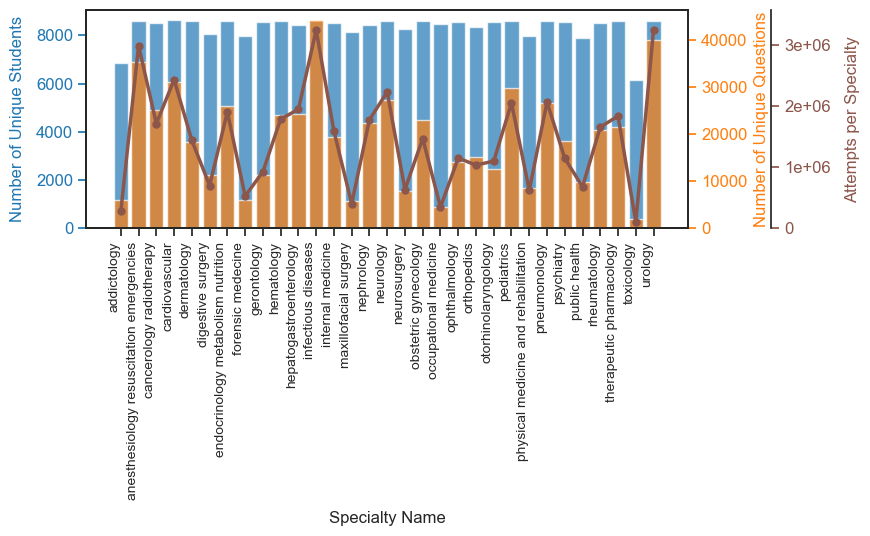

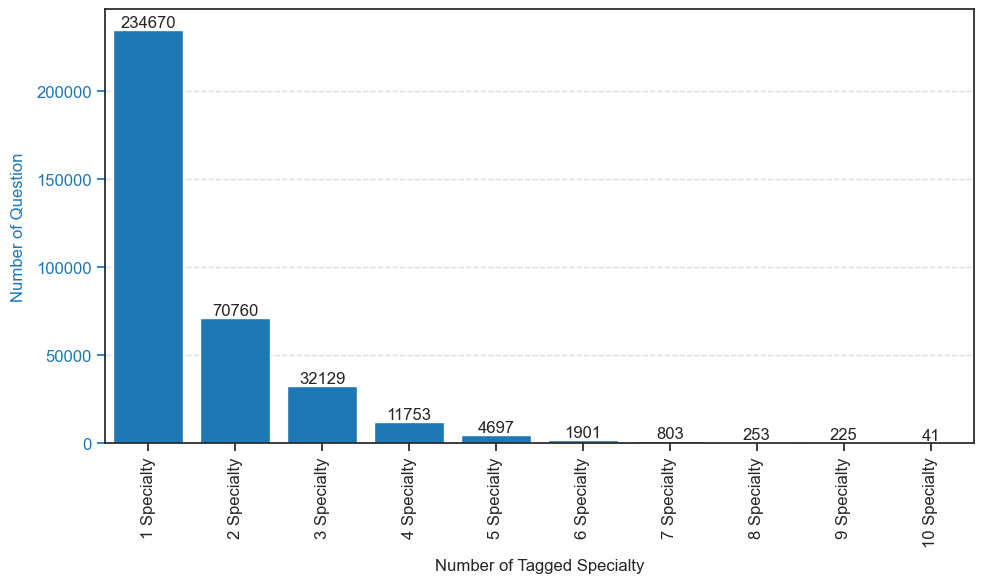

20200916
20210314


In [7]:
# get the unique specialty names from question_specialty
all_specialty_names = list(set(question_specialty['specialty']))


specialty_unique_student_count = []
specialty_unique_question_count= []
specialty_attempt_count= []
for specialty_name in all_specialty_names:
    # specialty_name column contains the specialty name 
    # get the number of unique students that include that specialty in the specialty_name column that containts the specialty name seperated by +
    specialty_unique_student_count.append([specialty_name, len(data_2020_2021_6th_grade[data_2020_2021_6th_grade['specialty'].str.contains(specialty_name, regex=False)]['student'].unique())])
    # get the number of unique questions that include that specialty in the specialty_name column that containts the specialty name seperated by +
    specialty_unique_question_count.append([specialty_name, len(data_2020_2021_6th_grade[data_2020_2021_6th_grade['specialty'].str.contains(specialty_name, regex=False)]['question'].unique())])

    specialty_attempt_count.append([specialty_name, len(data_2020_2021_6th_grade[data_2020_2021_6th_grade['specialty'].str.contains(specialty_name, regex=False)])])


# create a dataframe with the specialty names and the number of students
specialty_student_count_df = pd.DataFrame(specialty_unique_student_count, columns = ['specialty_name', 'student_count'])
# create a dataframe with the specialty names and the number of questions
specialty_question_count_df = pd.DataFrame(specialty_unique_question_count, columns = ['specialty_name', 'question_count'])
# create a dataframe with the specialty names and the number of attempts
specialty_attempt_count_df = pd.DataFrame(specialty_attempt_count, columns = ['specialty_name', 'attempt_count'])

# merge the two dataframes by specialty_name
specialty_student_question_count_df = pd.merge(specialty_student_count_df, specialty_question_count_df, on='specialty_name')
# merge the two dataframes by specialty_name
specialty_student_attempt_count_df = pd.merge(specialty_student_count_df, specialty_attempt_count_df, on='specialty_name')

# number of tagged specialty
data_question_specialty= data_2020_2021_6th_grade[['question','specialty']].drop_duplicates()
# find number of value combined by + in the specialty column
data_question_specialty['n_specialty']=data_question_specialty['specialty'].apply(lambda x: len(x.split('+')))
# group by n_specialty and count the number of unique question
n_question_by_tagged_spec= data_question_specialty.groupby('n_specialty').count().reset_index()

# Sort the DataFrames by specialty_name in alphabetical order
specialty_student_count_df = specialty_student_count_df.sort_values('specialty_name')
specialty_question_count_df = specialty_question_count_df.sort_values('specialty_name')
specialty_attempt_count_df = specialty_attempt_count_df.sort_values('specialty_name')

# plot both the number of students and the number of questions per specialty in the same horizontal bar plot
fig, ax1 = plt.subplots()
ax1.bar(specialty_student_count_df['specialty_name'], specialty_student_count_df['student_count'], color=color_palette[0], alpha=0.7, label='Number of Unique Students')
ax1.set_xlabel('Specialty Name')
ax1.set_ylabel('Number of Unique Students', color=color_palette[0])
ax1.tick_params('y', colors=color_palette[0])

ax2 = ax1.twinx()
ax2.bar(specialty_question_count_df['specialty_name'], specialty_question_count_df['question_count'], color=color_palette[1], alpha=0.7, label='Number of Unique Questions')
ax2.set_ylabel('Number of Unique Questions', color=color_palette[1])
ax2.tick_params('y', colors=color_palette[1])

# Plot the attempts on the top as a line plot
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Adjust the position of the third axis
ax3.plot(specialty_attempt_count_df['specialty_name'], specialty_attempt_count_df['attempt_count'], color=color_palette[5], marker='o', markersize=5, label='Attempts per Specialty')
ax3.set_ylabel('Attempts per Specialty', color=color_palette[5], labelpad=10)
ax3.tick_params('y', colors=color_palette[5])

# Increase the distance between ax2's y-label and ax3's y-tick line
ax2.yaxis.set_label_coords(1.11, 0.5)

# Align y-axis ticks on the right y-axes
ax2.yaxis.tick_right()
ax3.yaxis.tick_right()

# Set y-axis limits for attempts to avoid overlapping
#ax3.set_ylim(0, specialty_attempt_count_df['attempt_count'].max() * 1 +1000)

# Format the y-axis tick labels with actual attempt numbers
ax3.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:g}'))

# Modify the x-axis labels to remove underscores and rotate them by 90 degrees
specialty_names = [name.replace('_', ' ') for name in specialty_student_count_df['specialty_name']]
ax1.set_xticklabels(specialty_names, rotation=90, ha='right', fontsize=10)

# Set y-axis limits for attempts to avoid overlapping and increase the maximum y limit by 1000
max_attempt_count = specialty_attempt_count_df['attempt_count'].max() 
ax3.set_ylim(0, max_attempt_count * 1.1 )

plt.tight_layout(rect=[0, 0.03, 0.9, 0.95])
# Save the figure to a file for journal publication
#figure_folder = 'path_to_folder'
#plt.savefig(os.path.join(figure_folder, 'unique_question_student_per_spec.png'), dpi=300)
plt.savefig(os.path.join(figure_folder, 'unique_question_student_per_spec.png'), dpi=300, bbox_inches='tight')
plt.show()



# 2- plot the number of questions per n_specialty in the data_question_specialty
import matplotlib.pyplot as plt

# Set font size for tick labels
font_size = 20

# Set figure size
fig, ax1 = plt.subplots(figsize=(10, 8))

ax1.barh(n_question_by_tagged_spec['n_specialty'], n_question_by_tagged_spec['question'], color=color_palette[0])

# Set tick label font size
ax1.set_xlabel('Number of Question', fontsize=font_size)
ax1.set_ylabel('Number of Tagged Specialty', fontsize=font_size)
ax1.tick_params(axis='both', labelsize=font_size)

# Modify the y-axis ticks to go from 1 to 10 and label each tick accordingly
ax1.set_yticks(range(1, 11))
specialty_labels = [f'{num} Specialty' for num in range(1, 11)]
ax1.set_yticklabels(specialty_labels, fontsize=font_size)
plt.tight_layout()

# Set the y-axis limit to 1 to 10
ax1.set_ylim(0.5, 10.5)

# Set the x-axis limit to the maximum number of questions plus 100
max_questions = n_question_by_tagged_spec['question'].max()
ax1.set_xlim(0, max_questions + 100)

# Add grid lines
ax1.grid(axis='x', linestyle='--', alpha=0.7)

# Add data labels on the bars for data points up to 10
for x, y in zip(n_question_by_tagged_spec['question'][:10], n_question_by_tagged_spec['n_specialty'][:10]):
    ax1.text(x, y, str(x), ha='left', va='center', fontsize=font_size)

#plt.title('Number of Questions Per Number of Tagged Specialty')
plt.tight_layout()

# Set figure font size for saving
plt.rcParams['font.size'] = font_size

plt.savefig(os.path.join(figure_folder, 'n_question_per_n_tagged_spec_horizontal.png'), dpi=300)
plt.show()

# print the minimum and maximum date in the data_2020_2021_6th_grade
print(data_2020_2021_6th_grade['date'].min())
print(data_2020_2021_6th_grade['date'].max())


## ECNP and Preprocessed Training Period

In [14]:
del data_2020_2021_6th_grade
del test_data
del train_data

number_of_unique_students training:  8590
number_of_unique_questions training:  74703
n total action training:  22291963
unique_specialty training:  ['pediatrics' 'nephrology' 'physical_medicine_and_rehabilitation'
 'otorhinolaryngology' 'infectious_diseases' 'dermatology' 'rheumatology'
 'internal_medicine' 'obstetric_gynecology' 'orthopedics' 'hematology'
 'cancerology_radiotherapy' 'maxillofacial_surgery'
 'therapeutic_pharmacology' 'pneumonology' 'neurology' 'toxicology'
 'addictology' 'anesthesiology_resuscitation_emergencies' 'psychiatry'
 'ophthalmology' 'hepatogastroenterology' 'neurosurgery'
 'forensic_medecine' 'cardiovascular' 'endocrinology_metabolism_nutrition'
 'gerontology' 'urology' 'public_health' 'digestive_surgery'
 'occupational_medicine']
n unique_specialty training:  31
number_of_unique_students ecnp:  8636
number_of_unique_questions ecnp:  372
n total action ecnp:  3178527
unique_specialty ecnp:  ['dermatology' 'rheumatology' 'physical_medicine_and_rehabilitation

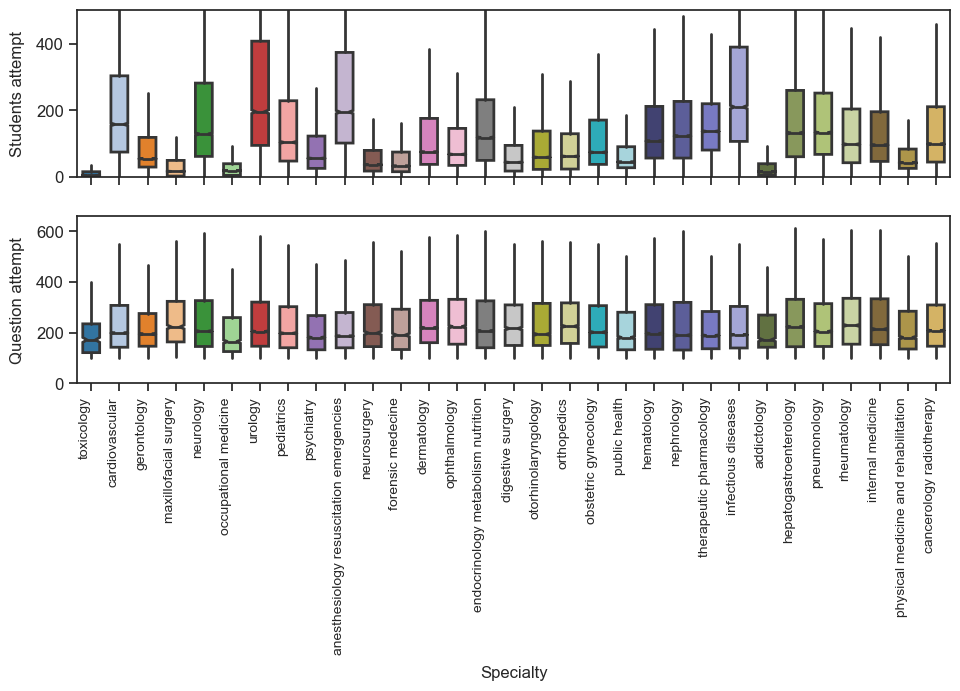

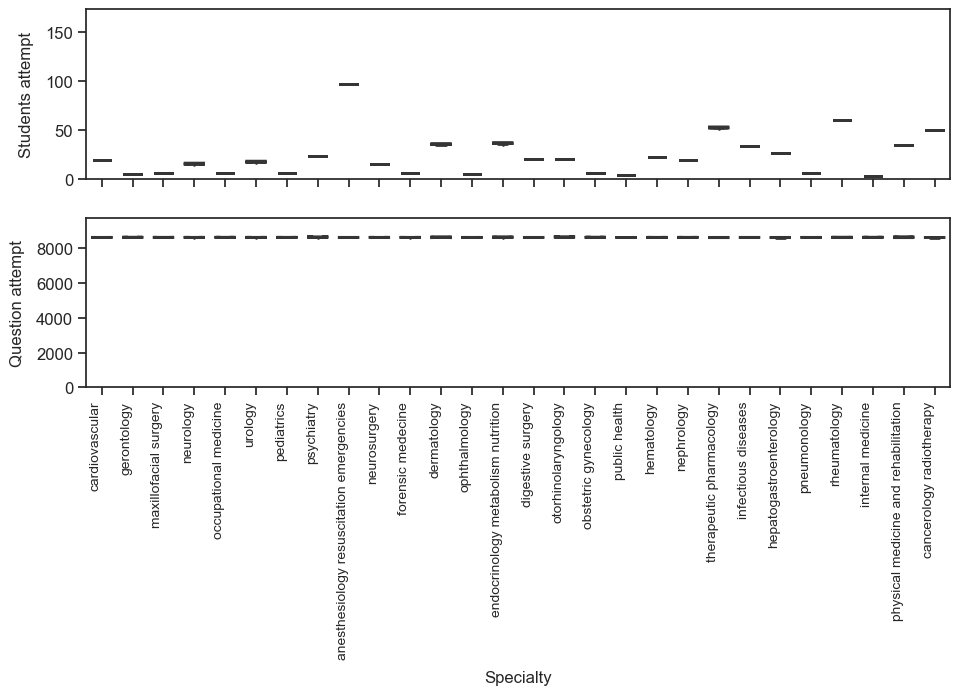

number of overlaped questions:  0
number of overlaped students:  0


In [15]:
# concat test_data and train_data
#del data_2020_2021_6th_grade

path= main_path + '/' + folder + '/'+ education_year + '/processed'
preprocessed_data = pd.read_csv(path + '/preprocessed_data.csv')

# rename user_id to student
preprocessed_data.rename(columns={'user_id':'student'}, inplace=True)

# rename item_id to question
preprocessed_data.rename(columns={'item_id':'question'}, inplace=True)

# rename kc_id to specialty
preprocessed_data.rename(columns={'kc_id':'specialty'}, inplace=True)


path= main_path + '/' + folder + '/'+ education_year

# read test_data.csv, train_data.csv and ecnp_data.csv and question_specialty.csv
#test_data = pd.read_csv(path + '/test_data.csv')
#train_data = pd.read_csv(path + '/train_data.csv')
question_specialty = pd.read_csv(path + '/questions_specialty.csv')

# get the unique specialty names from question_specialty
all_specialty_names = list(set(question_specialty['specialty']))


#data_2020_2021_6th_grade_training = pd.concat([test_data, train_data], ignore_index=True)
ecnp_data = pd.read_csv(path + '/ecnp_data.csv')
# create empty dataframe
training_student_attempt_in_all_spec = pd.DataFrame()
training_question_attempt_in_all_spec = pd.DataFrame()

test_student_attempt_in_all_spec = pd.DataFrame()
test_question_attempt_in_all_spec = pd.DataFrame()
for specialty_name in all_specialty_names:
    
    # TRAINING SET
    training_this_specialty_data= preprocessed_data[preprocessed_data['specialty'].str.contains(specialty_name, regex=False)]
    
    # get the number of rows per column and name the new column as attempt
    training_student_attempt_count = training_this_specialty_data.groupby('student').size()
    # name this new column as attempt
    training_student_attempt_count = training_student_attempt_count.reset_index(name='attempt')
    # add this_spec column to the training_student_attempt_in_all_spec that is the specialty_name
    training_student_attempt_count['this_spec'] = specialty_name
    # append to the previous dataframe
    training_student_attempt_in_all_spec = pd.concat([training_student_attempt_in_all_spec, training_student_attempt_count], ignore_index=True)

    
    # get the number of rows per question_id that include that specialty in the specialty_name column that containts the specialty name seperated by +
    training_question_attempt_count = training_this_specialty_data.groupby('question').size()
    # name this new column as attempt
    training_question_attempt_count = training_question_attempt_count.reset_index(name='attempt')
    # add this_spec column to the training_student_attempt_in_all_spec that is the specialty_name
    training_question_attempt_count['this_spec'] = specialty_name
    # append to the previous dataframe
    training_question_attempt_in_all_spec = pd.concat([training_question_attempt_in_all_spec, training_question_attempt_count], ignore_index=True)
    
    
    
    # ECNP SET
    ecnp_this_specialty_data= ecnp_data[ecnp_data['specialty'].str.contains(specialty_name, regex=False)]
    
    # get the number of rows per column and name the new column as attempt
    ecnp_student_attempt_count = ecnp_this_specialty_data.groupby('student').size()
    # name this new column as attempt
    ecnp_student_attempt_count = ecnp_student_attempt_count.reset_index(name='attempt')
    # add this_spec column to the training_student_attempt_in_all_spec that is the specialty_name
    ecnp_student_attempt_count['this_spec'] = specialty_name
    # append to the previous dataframe
    test_student_attempt_in_all_spec = pd.concat([test_student_attempt_in_all_spec, ecnp_student_attempt_count], ignore_index=True)
    
    # get the number of rows per question_id that include that specialty in the specialty_name column that containts the specialty name seperated by +
    ecnp_question_attempt_count = ecnp_this_specialty_data.groupby('question').size()
    # name this new column as attempt
    ecnp_question_attempt_count = ecnp_question_attempt_count.reset_index(name='attempt')
    # add this_spec column to the training_student_attempt_in_all_spec that is the specialty_name
    ecnp_question_attempt_count['this_spec'] = specialty_name
    # append to the previous dataframe
    test_question_attempt_in_all_spec = pd.concat([test_question_attempt_in_all_spec, ecnp_question_attempt_count], ignore_index=True)
    
    

# TRAINING SET
# number of unique students in the data_2020_2021_6th_grade_training
training_number_of_unique_students = preprocessed_data['student'].nunique()
print('number_of_unique_students training: ', training_number_of_unique_students)

# number of unique questions in the data_2020_2021_6th_grade_training
training_number_of_unique_questions = preprocessed_data['question'].nunique()
print('number_of_unique_questions training: ', training_number_of_unique_questions)

# number of rows in the data_2020_2021_6th_grade_training
training_number_of_rows = preprocessed_data.shape[0]
print('n total action training: ', training_number_of_rows)

# number of unique specialty in the data_2020_2021_6th_grade_training
# finc the unique specialties in the specialty column that containts the specialty name seperated by +
training_unique_specialty = preprocessed_data['specialty'].str.split('+').explode().unique()
training_n_unique_specialty= len(training_unique_specialty)
print('unique_specialty training: ', training_unique_specialty)
print('n unique_specialty training: ', training_n_unique_specialty)



# ECNP SET
# number of unique students in the ecnp_data
ecnp_number_of_unique_students = ecnp_data['student'].nunique()
print('number_of_unique_students ecnp: ', ecnp_number_of_unique_students)

# number of unique questions in the ecnp_data
ecnp_number_of_unique_questions = ecnp_data['question'].nunique()
print('number_of_unique_questions ecnp: ', ecnp_number_of_unique_questions)

# number of rows in the ecnp_data
ecnp_number_of_rows = ecnp_data.shape[0]
print('n total action ecnp: ', ecnp_number_of_rows)

# number of unique specialty in the ecnp_data
# finc the unique specialties in the specialty column that containts the specialty name seperated by +
ecnp_unique_specialty = ecnp_data['specialty'].str.split('+').explode().unique()
ecnp_n_unique_specialty = len(ecnp_unique_specialty)
print('unique_specialty ecnp: ', ecnp_unique_specialty)
print('unique_specialty ecnp: ', ecnp_n_unique_specialty)

# specialties that are in the training set but not in the ecnp set
training_unique_specialty_not_in_ecnp = np.setdiff1d(training_unique_specialty, ecnp_unique_specialty)
print('training_unique_specialty_not_in_ecnp: ', training_unique_specialty_not_in_ecnp)

# Function to get y-axis limits without outliers

def get_ylim_without_outliers(data, whisker_factor=1.5):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_whisker = (q1 - whisker_factor * iqr ) - 1
    upper_whisker = (q3 + whisker_factor * iqr) + 100
    return lower_whisker, upper_whisker

# plots

# TRAINING SET
# Get y-axis limits for both boxplots
lower_limit_students, upper_limit_students = get_ylim_without_outliers(training_student_attempt_in_all_spec['attempt'])
lower_limit_questions, upper_limit_questions = get_ylim_without_outliers(training_question_attempt_in_all_spec['attempt'])

# Create a 2x1 subplot grid with larger figure size
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 8))
#fig.suptitle('', fontsize=plot_settings['font_size'] + 2)

# Boxplot of the number of students per specialty
sns.boxplot(ax=ax1, x='this_spec', y='attempt', data=training_student_attempt_in_all_spec, palette=color_palette_31,
            width=0.6, linewidth=2, fliersize=0, showcaps=False, notch=True, saturation=0.75,color="white")
ax1.set_ylabel('Students attempt')
ax1.set_xlabel('')
ax1.set_ylim(0, upper_limit_students)  # Start y-axis from 0
ax1.set_xticklabels([])  # Remove x-axis tick labels
ax1.set_title('')

# Boxplot of the number of questions per specialty
sns.boxplot(ax=ax2, x='this_spec', y='attempt', data=training_question_attempt_in_all_spec, palette=color_palette_31,
            width=0.6, linewidth=2, fliersize=0, showcaps=False, notch=True, saturation=0.75, color="white")

ax2.set_xlabel('Specialty')
ax2.set_ylabel('Question attempt')
ax2.set_ylim(0, upper_limit_questions)  # Start y-axis from 0
ax2.set_xticklabels([label.get_text().replace('_', ' ') for label in ax2.get_xticklabels()], rotation=90, ha='right', fontsize=10)
ax2.set_title('')

# Adjust layout to prevent overlapping x-axis labels
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig(os.path.join(figure_folder, 'preprocessed_training_period_student_question_attempt_boxplot.png'), dpi=300)
plt.show()


# ECNP SET
# Get y-axis limits for both boxplots
lower_limit_students, upper_limit_students = get_ylim_without_outliers(test_student_attempt_in_all_spec['attempt'])
lower_limit_questions, upper_limit_questions = get_ylim_without_outliers(test_question_attempt_in_all_spec['attempt'])

# Create a 2x1 subplot grid with larger figure size
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 8))
#fig.suptitle('', fontsize=plot_settings['font_size'] + 2)

# Boxplot of the number of students per specialty
sns.boxplot(ax=ax1, x='this_spec', y='attempt', data=test_student_attempt_in_all_spec, palette=color_palette_31,
            width=0.6, linewidth=2, fliersize=0, showcaps=False, notch=True, saturation=0.75,color="white")
ax1.set_ylabel('Students attempt')
ax1.set_xlabel('')
ax1.set_ylim(0, upper_limit_students)  # Start y-axis from 0
ax1.set_xticklabels([])  # Remove x-axis tick labels
ax1.set_title('')
# Boxplot of the number of questions per specialty
sns.boxplot(ax=ax2, x='this_spec', y='attempt', data=test_question_attempt_in_all_spec, palette=color_palette_31,
            width=0.6, linewidth=2, fliersize=0, showcaps=False, notch=True, saturation=0.75,color="white")

ax2.set_xlabel('Specialty')
ax2.set_ylabel('Question attempt')
ax2.set_ylim(0, upper_limit_questions+1000)  # Start y-axis from 0
ax2.set_xticklabels([label.get_text().replace('_', ' ') for label in ax2.get_xticklabels()], rotation=90, ha='right', fontsize=10)
ax2.set_title('')
# Adjust layout to prevent overlapping x-axis labels
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig(os.path.join(figure_folder, 'ecnp_period_student_question_attempt_boxplot.png'), dpi=300)
plt.show()



# overlap of questions and students in the two datasets
# 1. questions in both datasets
n_overlaped_questions = len(set(preprocessed_data['question'].unique()).intersection(set(ecnp_data['question'].unique())))
print('number of overlaped questions: ', n_overlaped_questions)

# 2. students in both datasets
n_overlaped_students = len(set(preprocessed_data['student'].unique()).intersection(set(ecnp_data['student'].unique())))
print('number of overlaped students: ', n_overlaped_students)


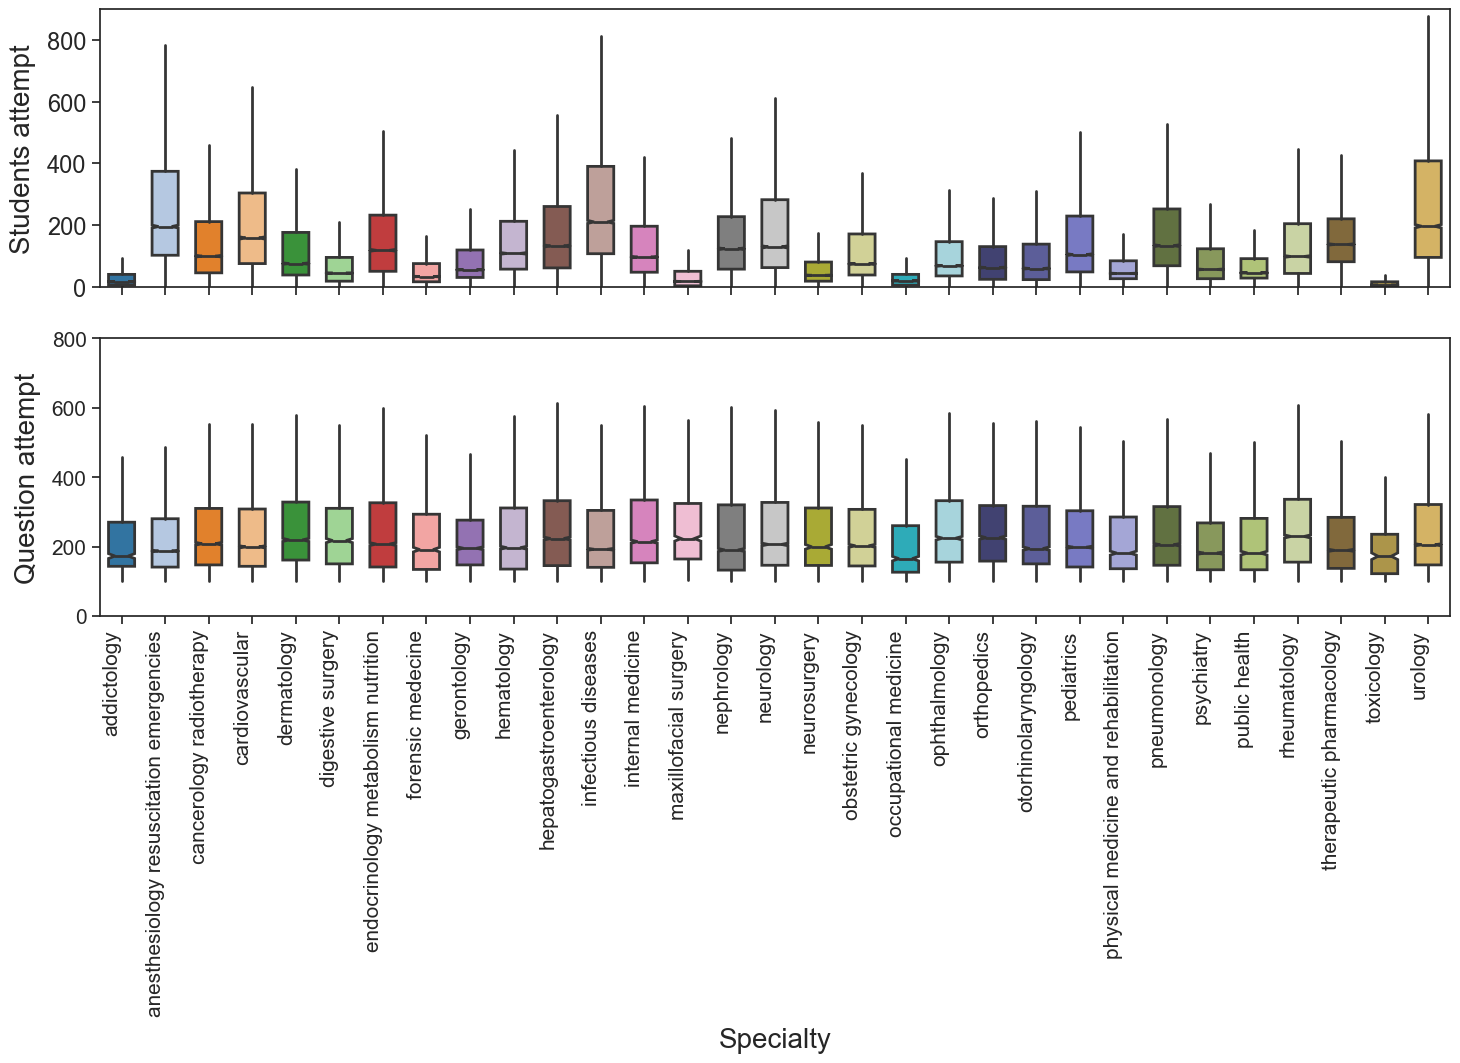

In [26]:
# Sort the data frames by specialty names alphabetically
training_student_attempt_in_all_spec = training_student_attempt_in_all_spec.sort_values(by='this_spec')
training_question_attempt_in_all_spec = training_question_attempt_in_all_spec.sort_values(by='this_spec')

# Create a 2x1 subplot grid with larger figure size
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15, 12))

# Boxplot of the number of students per specialty
sns.boxplot(ax=ax1, x='this_spec', y='attempt', data=training_student_attempt_in_all_spec, palette=color_palette_31,
            width=0.6, linewidth=2, fliersize=0, showcaps=False, notch=True, saturation=0.75,color="white")
ax1.set_ylabel('Students attempt', fontsize=20)
ax1.set_xlabel('')
ax1.set_ylim(0, upper_limit_students)  # Start y-axis from 0
ax1.set_xticklabels([])  # Remove x-axis tick labels
ax1.set_title('')
ax1.set_ylim(0, 900)
ax1.tick_params(axis='both', which='major', labelsize=17)

# Boxplot of the number of questions per specialty
sns.boxplot(ax=ax2, x='this_spec', y='attempt', data=training_question_attempt_in_all_spec, palette=color_palette_31,
            width=0.6, linewidth=2, fliersize=0, showcaps=False, notch=True, saturation=0.75, color="white")

ax2.set_xlabel('Specialty', fontsize=20)
ax2.set_ylabel('Question attempt', fontsize=20)
ax2.set_ylim(0, upper_limit_questions)  # Start y-axis from 0
ax2.set_xticklabels([label.get_text().replace('_', ' ') for label in ax2.get_xticklabels()], rotation=90, ha='right', fontsize=15)
ax2.set_title('')
ax2.set_ylim(0, 800)
ax2.tick_params(axis='both', which='major', labelsize=15)

# Adjust layout to prevent overlapping x-axis labels
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig(os.path.join(figure_folder, 'preprocessed_training_period_student_question_attempt_boxplot.png'), dpi=300)
plt.show()



### Training and Validation Set

In [7]:
path= main_path + '/' + folder + '/'+ education_year + '/processed'

# from the path read train_set.csv, test_set.csv and preprocessed_data.csv
train_set = pd.read_csv(path + '/train_set.csv')
validation_set = pd.read_csv(path + '/test_set.csv')

# user_id and item_id overlap between train_set and test_set

# user_id overlap
n_overlaped_users = len(set(train_set['user_id']).intersection(set(validation_set['user_id'])))
print('Number of overlaped users: ', n_overlaped_users)

# item_id overlap
n_overlaped_items = len(set(train_set['item_id']).intersection(set(validation_set['item_id'])))
print('Number of overlaped items: ', n_overlaped_items)

# n unique users and items in train_set
n_unique_users_train = len(set(train_set['user_id']))
n_unique_items_train = len(set(train_set['item_id']))
n_entries_train = len(train_set)

print('Number of unique users in train_set: ', n_unique_users_train)
print('Number of unique items in train_set: ', n_unique_items_train)
print('Number of entries in train_set: ', n_entries_train)


# n unique users and items in test_set
n_unique_users_test = len(set(validation_set['user_id']))
n_unique_items_test = len(set(validation_set['item_id']))
n_entries_test = len(validation_set)

print('Number of unique users in test_set: ', n_unique_users_test)
print('Number of unique items in test_set: ', n_unique_items_test)
print('Number of entries in test_set: ', n_entries_test)

Number of overlaped users:  7429
Number of overlaped items:  60673
Number of unique users in train_set:  8582
Number of unique items in train_set:  72427
Number of entries in train_set:  17904661
Number of unique users in test_set:  7437
Number of unique items in test_set:  62949
Number of entries in test_set:  4387302


# Logistic Regression

In [60]:
# set the path to the main_path+
os.chdir(main_path + folder + education_year)

In [88]:
reverse_quest_spec_logreg=True

# Question Difficulty
# firs we need to find the specialt of each question
# read the train_set.csv file form main_path + folder + education_year+ 'preprocessed_data' and give the name train_set
train_set = pd.read_csv(main_path + '/' + folder + '/'+ education_year + '/processed/train_set.csv') 
users_in_train = train_set['user_id'].unique()
# filter only the unique question and specialty pairs and have only item_id, kc_id columns
train_set = train_set.drop_duplicates(subset=['item_id', 'kc_id'])[['item_id', 'kc_id']]
# read the attempt_counter_question.csv file form main_path + folder + education_year+ 'preprocessed_data' and give the name attempt_counter_question
attempt_counter_question = pd.read_csv(main_path + '/' + folder + '/'+ education_year + '/processed/attempt_counter_question.csv')
# return the attempt_counter_question from short to long by item_id

# merge the train_set_unique and attempt_counter_question on item_id
train_set = pd.merge(train_set, attempt_counter_question, on='item_id', how='left')
# rename train_set as question_specialty
question_difficulty_logreg = train_set

# Student Ability
attempt_counter_student = pd.read_csv(main_path + '/' + folder + '/'+ education_year + '/processed/attempt_counter_student_spec.csv')
# have onyl the rows where user_id is in users_in_train
attempt_counter_student = attempt_counter_student[attempt_counter_student['user_id'].isin(users_in_train)]
# to long format
student_ability_logreg=pd.melt(attempt_counter_student,id_vars=['user_id'],var_name='kc_id', value_name='attempt_student')

# Specialty Difficulty
# read attempt_counter_spec.csv file form main_path + folder + education_year+ 'processed' and give the name attempt_counter_spec
specialty_difficulty_logreg = pd.read_csv(main_path + '/' + folder + '/'+ education_year + '/processed/attempt_counter_spec.csv')

# read the question_difficulty.csv files from all the folders that start with 'result_logreg' in the path and give the names as quest_dif_x where x is the resting name of the folder after resulty_logreg
path= main_path + '/' + folder + '/'+ education_year
# Get a list of all directories in the path that start with 'results_logreg'
dirs = [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d)) and d.startswith('result_logreg')]

# # Dictionary to store DataFrames with custom names
# logreg_question_dif_dict = {}
# logreg_competency_dict= {}
# logreg_specialty_dif_dict= {}

# Process each directory and read the 'question_difficulty.csv' file into a DataFrame with a custom name
for folder_name in dirs:
    #custom_name = f'quest_dif_{folder_name[len(prefix):]}'  # Create a custom name for the DataFrame

    custom_name = folder_name[len("result_logreg") + 1:]  # Get the part of the folder_name after 'result_logreg' by adding 1 to skip the underscore

    # Split the custom_name by the dash '-' and get the part after 'result_logreg'
    # custom_name_parts = custom_name.split('-')
    # if len(custom_name_parts) > 1:
    #     custom_name = '-'.join(custom_name_parts[1:]) 
    # else:
    #     custom_name = custom_name_parts[0]
        
    # Construct the full path to the csv file
    difficulty_file_path = os.path.join(path, folder_name, 'question_difficulty.csv')
    competency_file_path = os.path.join(path, folder_name, 'learner_competency.csv')
    specialty_difficulty_file_path= os.path.join(path, folder_name, 'specialty_difficulty.csv')
    # Check if 'specialty_difficulty.csv' exists in the directory before attempting to read it
    if os.path.exists(specialty_difficulty_file_path):
        # read the csv file into a DataFrame and name the columns as item_id and difficulty
        this_specialty_difficulty = pd.read_csv(specialty_difficulty_file_path)
        # remove the unnamed column
        this_specialty_difficulty = this_specialty_difficulty.drop(columns=['Unnamed: 0'])
        if reverse_quest_spec_logreg:
            this_specialty_difficulty['specialty_difficulty']=this_specialty_difficulty['specialty_difficulty']* -1
        # rename the difficulty column as difficulty_x where x is the resting name of the folder after resulty_logreg
        this_specialty_difficulty = this_specialty_difficulty.rename(columns={'specialty_difficulty': f'spec_dif_{custom_name}'})
        # merge the specialty_difficulty with the this_specialty_difficulty on item_id
        specialty_difficulty_logreg = pd.merge(specialty_difficulty_logreg, this_specialty_difficulty, on='specialty')
        
    else:
        # If the file does not exist, you can handle it accordingly (e.g., print a message or skip it)
        print(f"'specialty_difficulty.csv' not found in directory: {folder_name}")

    # read the csv file into a DataFrame and name the columns as item_id and difficulty
    this_question_difficulty = pd.read_csv(difficulty_file_path)
    if reverse_quest_spec_logreg:
        this_question_difficulty['difficulty_irt']=this_question_difficulty['difficulty_irt']* -1
    # rename the difficulty column as difficulty_x where x is the resting name of the folder after resulty_logreg
    this_question_difficulty = this_question_difficulty.rename(columns={'difficulty_irt': f'quest_dif_{custom_name}'})
    # merge the question_difficulty with the this_question_difficulty on item_id.  if the item_id is not in question_difficulty then not include it in the merged DataFrame
    question_difficulty_logreg = pd.merge(question_difficulty_logreg, this_question_difficulty, on='item_id', how='left')
    
    # read the csv file into a DataFrame and name the columns as user_id and competency
    this_competency = pd.read_csv(competency_file_path)
    this_competency=pd.melt(this_competency,id_vars=['user_id'],var_name='kc_id', value_name=f'ability_{custom_name}')
    # merge the student_ability with the this_competency on user_id and kc_id
    student_ability_logreg = pd.merge(student_ability_logreg, this_competency, on=['user_id', 'kc_id'], how='left')
    
# Split rows with '+' in the kc_id column using explode
question_difficulty_logreg['kc_id'] = question_difficulty_logreg['kc_id'].str.split('+')
spec_seperated_question_difficulty_logreg = question_difficulty_logreg.explode('kc_id')




'specialty_difficulty.csv' not found in directory: result_logreg_user_skill_together-items
'specialty_difficulty.csv' not found in directory: result_logreg_user_skill_together-items-weighted_encoding


## Plots

## VIOLIN PLOTS

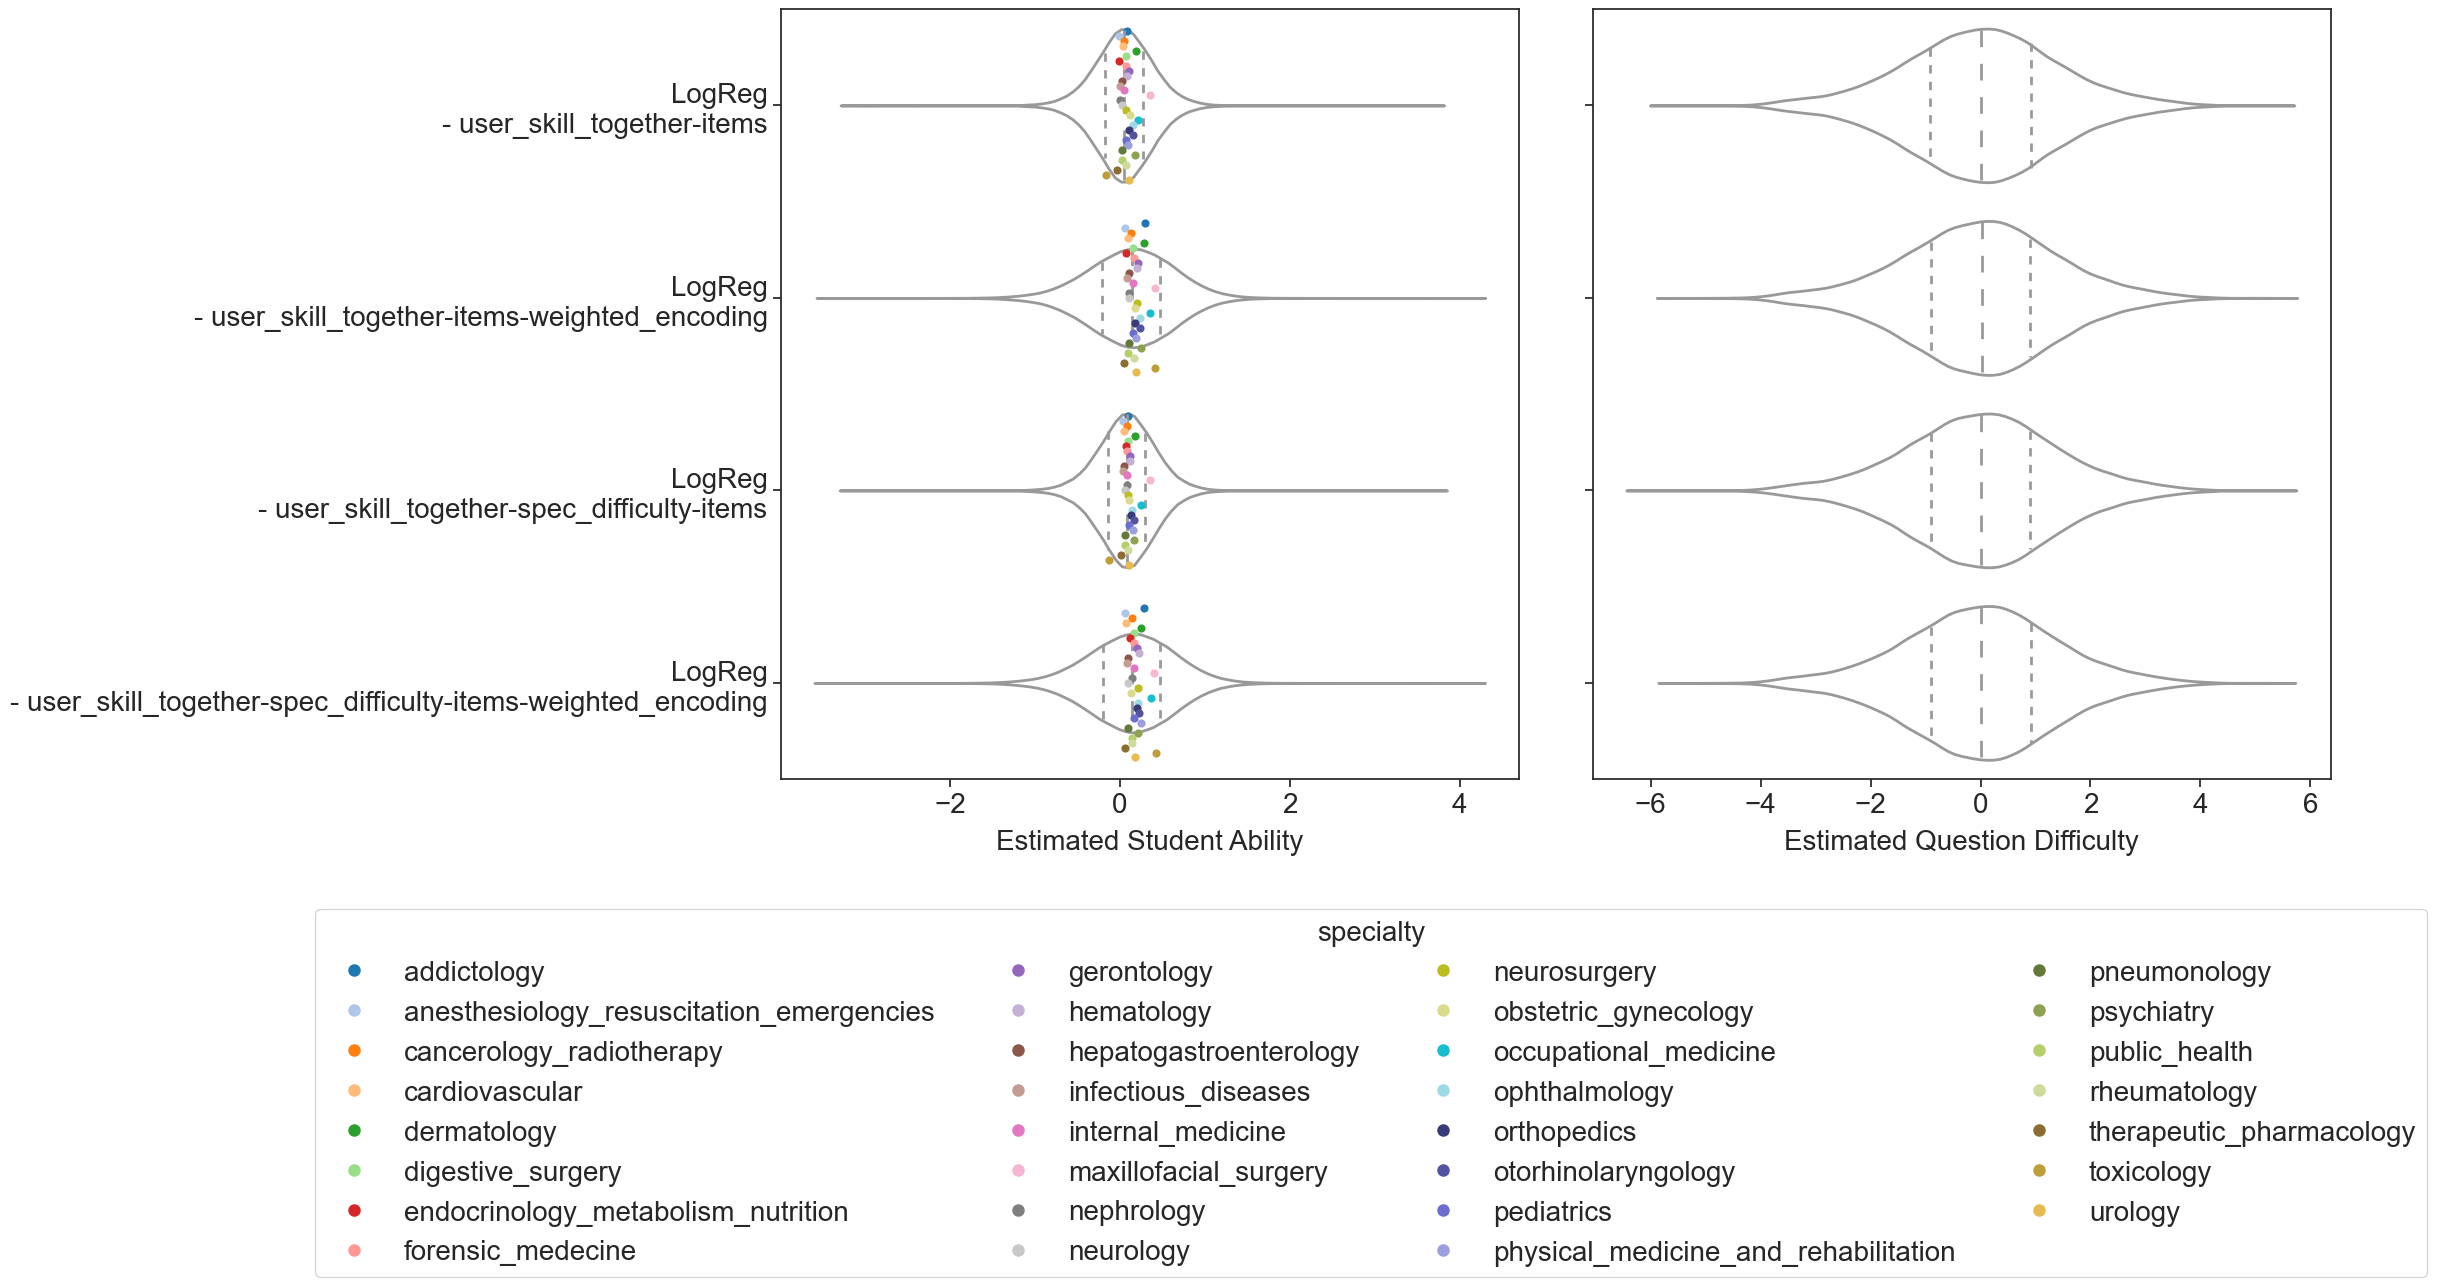

In [90]:



#  from student_ability_logreg remove rows with count<attempt_threshold_student
student_ability_logreg=student_ability_logreg[student_ability_logreg['attempt_student']>=attempt_threshold_student]
# melt
student_ability_logreg_melted = student_ability_logreg.melt(id_vars=['user_id', 'kc_id','attempt_student'], var_name='model_name', value_name='estimated_student_ability')


question_difficulty_logreg = question_difficulty_logreg[question_difficulty_logreg['count']>=attempt_threshold_question]
# melt
question_difficulty_logreg_melted = question_difficulty_logreg.melt(id_vars=['item_id', 'kc_id','count'], var_name='model_name', value_name='estimated_question_difficulty')


import matplotlib.pyplot as plt
import seaborn as sns

# Set the seaborn style and color palette
sns.set(style="ticks", palette=color_palette_31)

# Set other plot settings in a dictionary
plot_settings = {
    'font_size': 20,
    'fig_width': 10,
    'fig_height': 6,
    'linewidth': 2,
    'marker_size': 8,  # Adjust the marker size here
    'axis_label_spacing': 8,
    'font_family': 'sans-serif'
}

# Update the matplotlib rcParams using the plot_settings dictionary
plt.rcParams.update({
    'font.size': plot_settings['font_size'],
    'axes.labelsize': plot_settings['font_size'],
    'xtick.labelsize': plot_settings['font_size'],
    'ytick.labelsize': plot_settings['font_size'],
    'legend.fontsize': plot_settings['font_size'],
    'figure.titlesize': plot_settings['font_size'] + 2,
    'figure.figsize': (plot_settings['fig_width'], plot_settings['fig_height']),
    'lines.linewidth': plot_settings['linewidth'],
    'lines.markersize': plot_settings['marker_size'],
    'axes.labelpad': plot_settings['axis_label_spacing'],
    'font.family': plot_settings['font_family']
})

# Calculate the median values for each kc_id
student_ability_median = student_ability_logreg_melted.groupby(['model_name', 'kc_id'])['estimated_student_ability'].median().reset_index()

# Set the data and create the main violin plots
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# First subplot - Violin plot for Estimated Student Ability
sns.violinplot(x='estimated_student_ability', y='model_name', data=student_ability_logreg_melted, inner='quartile', ax=axes[0], color='white')
sns.pointplot(x='estimated_student_ability', y='model_name', data=student_ability_median, hue='kc_id', dodge=True, markers='o', scale=0.5, linestyles='', ax=axes[0], palette=color_palette_31, alpha=0.5)

axes[0].set_xlabel('Estimated Student Ability', fontsize=plot_settings['font_size'])
axes[0].set_ylabel('')
axes[0].set_yticklabels(['LogReg\nuser_skill_together-items',
                         'LogReg\nuser_skill_together-items-weighted_encoding',
                         'LogReg\nuser_skill_together-spec_difficulty-items',
                         'LogReg\nuser_skill_together-spec_difficulty-items-weighted_encoding'], fontsize=plot_settings['font_size'])

# Remove the legend from the first subplot
axes[0].get_legend().remove()

# Set the legend under the first subplot
legend_elements = [plt.Line2D([0], [0], marker='o', markersize=plot_settings['marker_size'], color=color_palette_31[i], label=kc_id, linestyle='') for i, kc_id in enumerate(student_ability_median['kc_id'].unique())]
legend = axes[0].legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.8, -0.15), ncol=4, title='specialty', title_fontsize=8)
legend.get_title().set_fontsize(plot_settings['font_size'])

# Second subplot - Violin plot for Estimated Question Difficulty
sns.violinplot(x='estimated_question_difficulty', y='model_name', data=question_difficulty_logreg_melted, inner='quartile', linewidth=plot_settings['linewidth'], ax=axes[1], color='white')
axes[1].set_xlabel('Estimated Question Difficulty', fontsize=plot_settings['font_size'])
axes[1].set_ylabel('')
axes[1].set_yticklabels(['',
                         '',
                         '',
                         ''])

# Distance between subplots
plt.subplots_adjust(wspace=0.1)

# Save plot
plt.savefig(figure_folder + 'violin_logreg.png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()

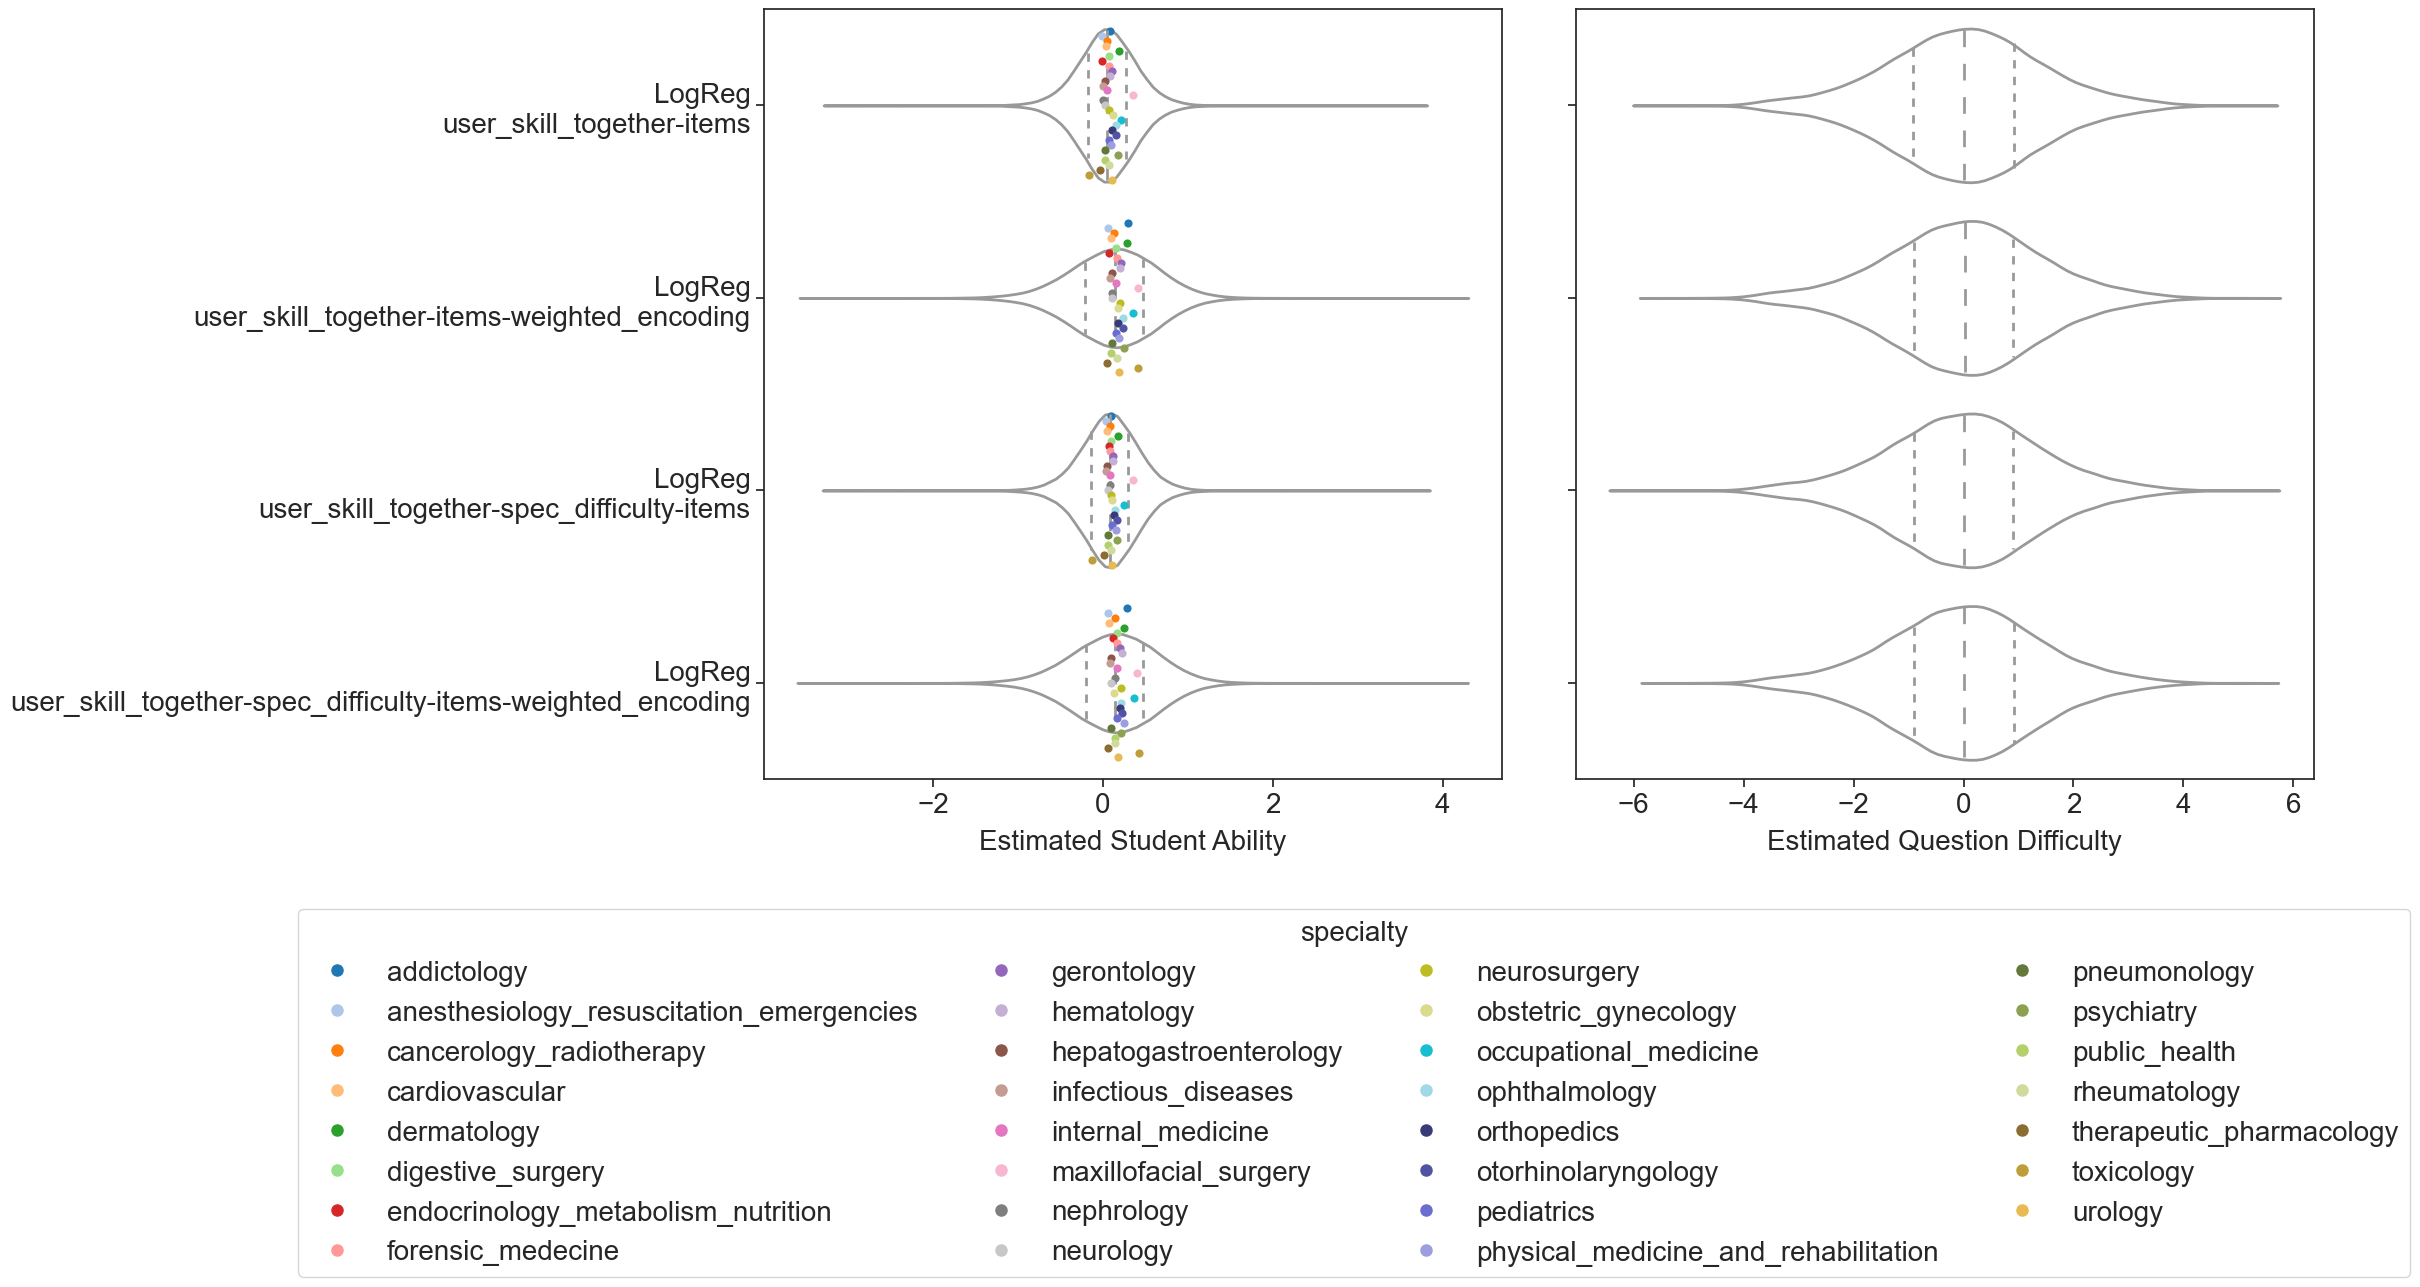

## Error Plots


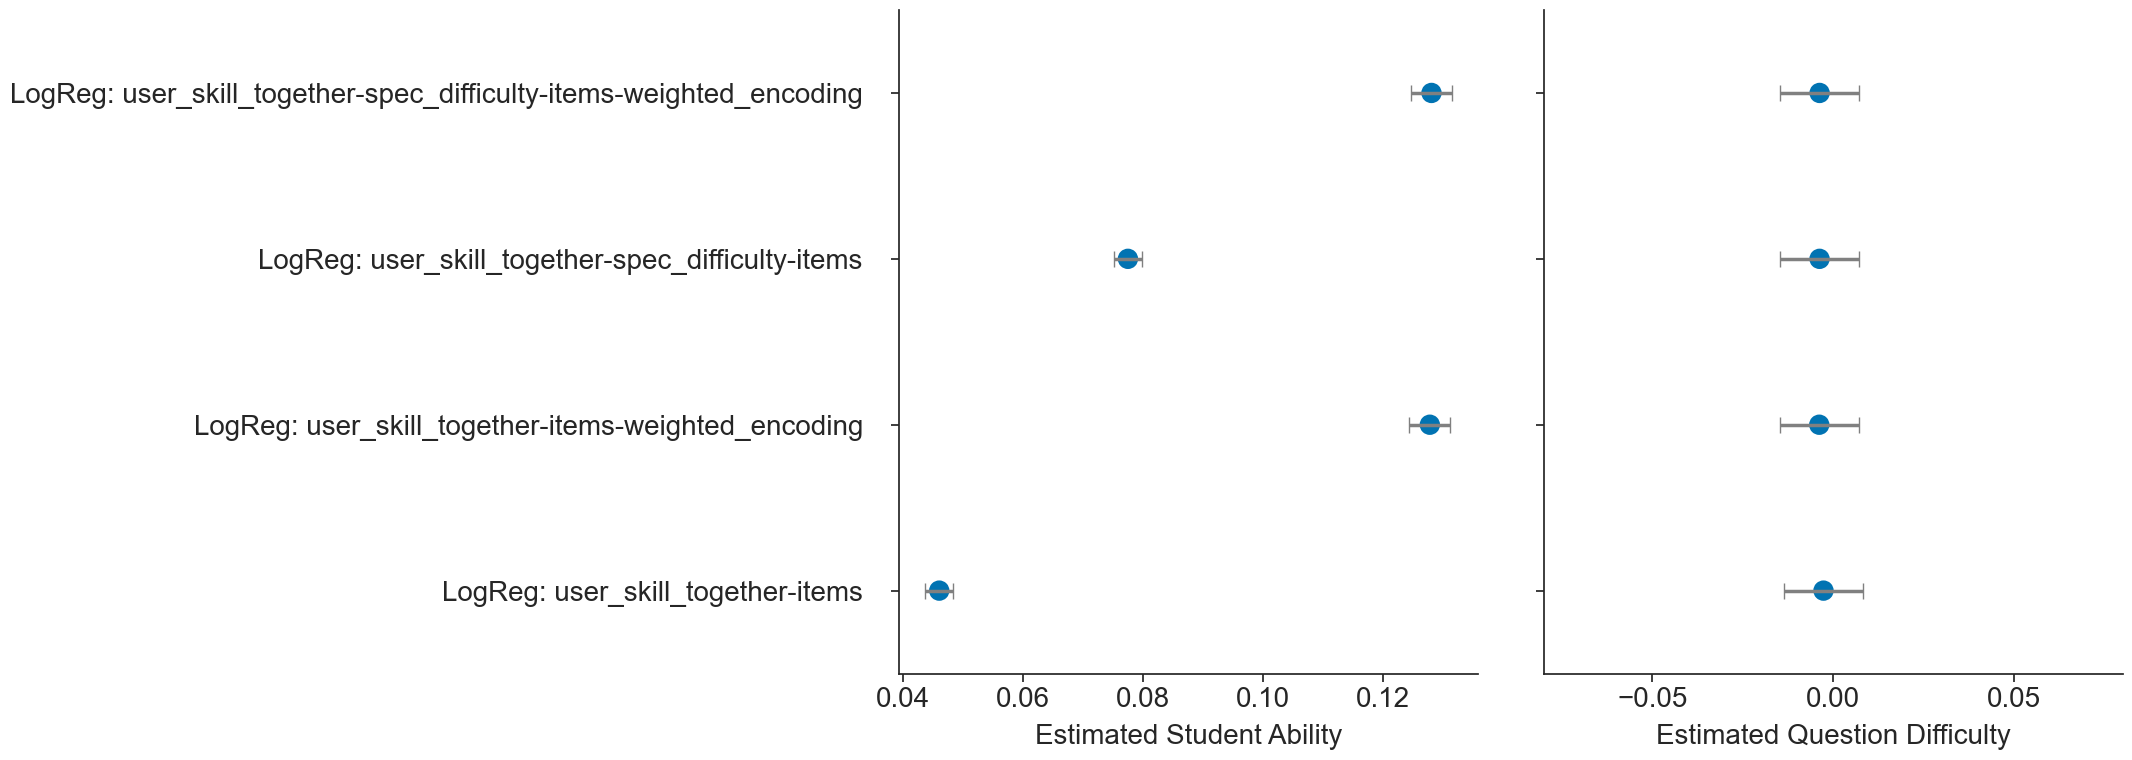

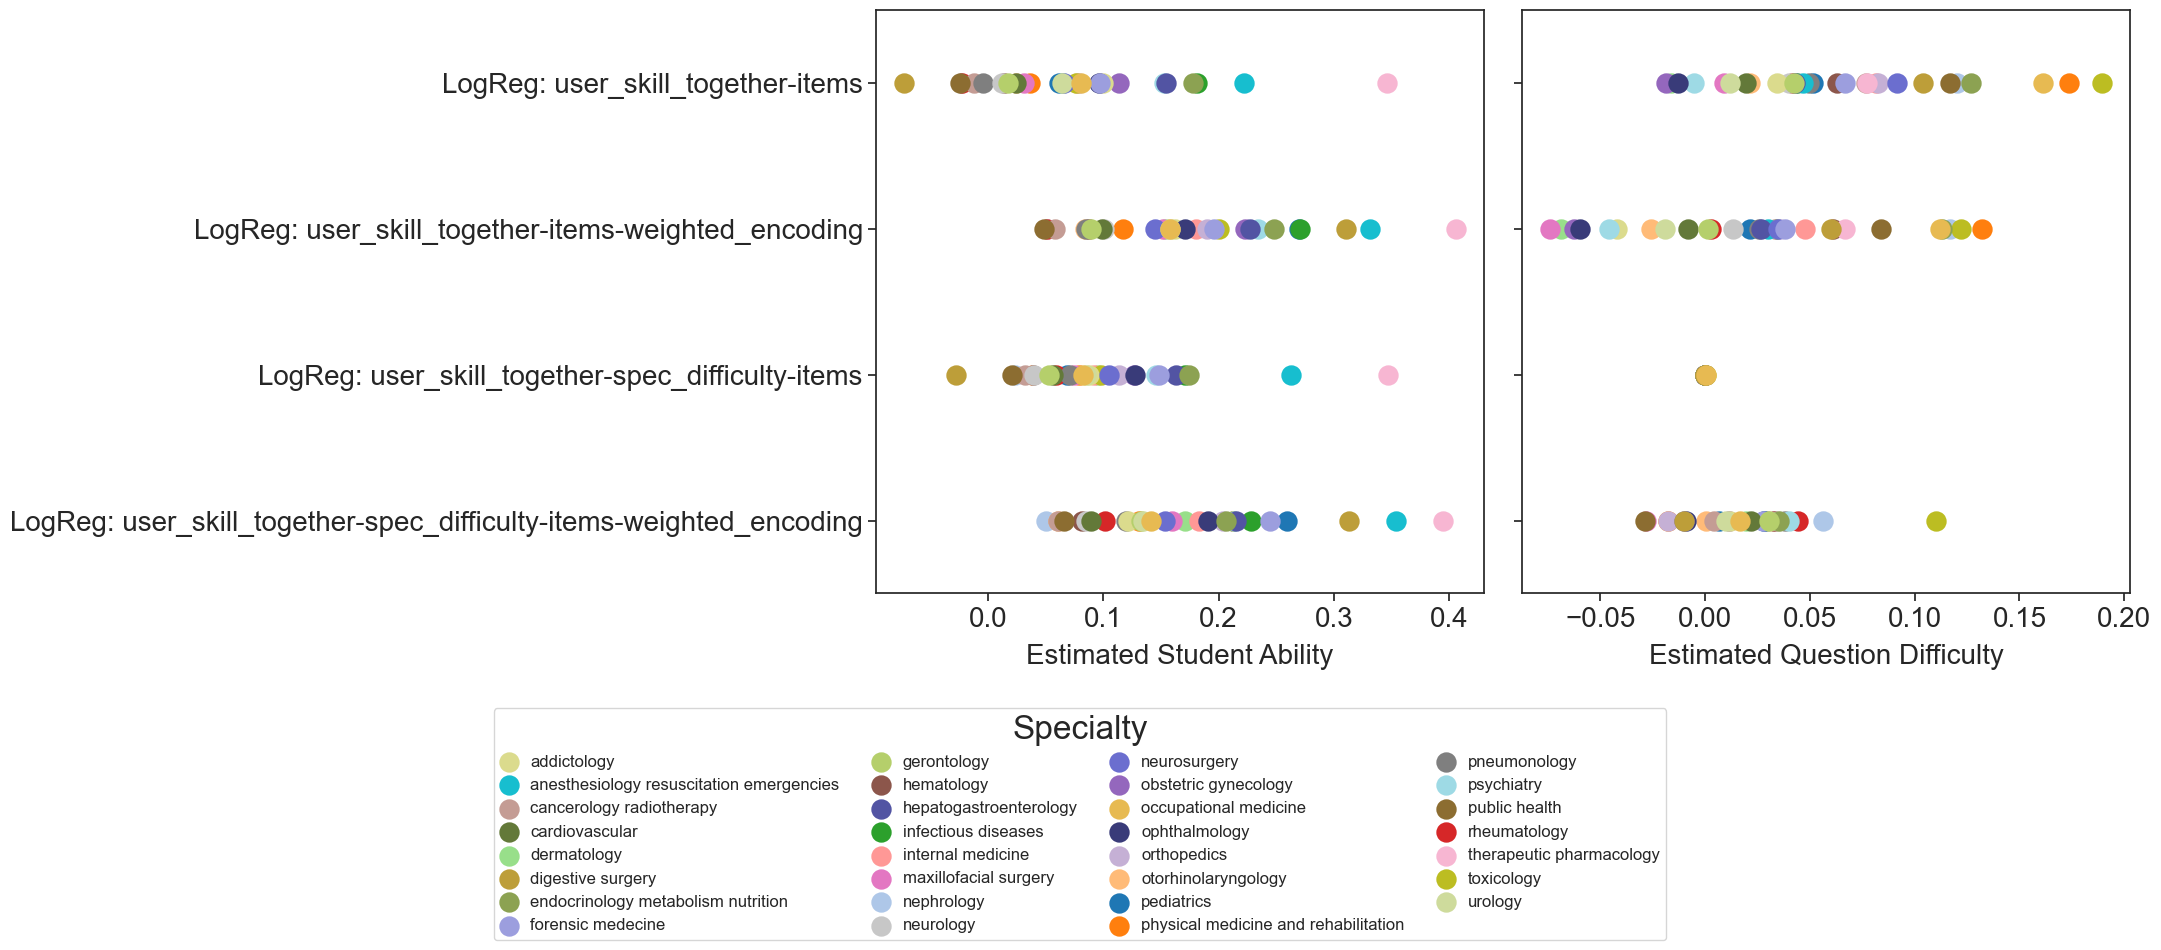

In [62]:
# remove error print
import warnings
warnings.filterwarnings('ignore')
# 1- Question Difficutly
# from question_difficulty_logreg remove rows with count<attempt_threshold_question
question_difficulty_logreg = question_difficulty_logreg[question_difficulty_logreg['count']>=attempt_threshold_question]
# open a df to save the results
question_difficulty_logreg_results = pd.DataFrame(columns=['model','mean','confidence_interval'])
# for each columns start with quest_dif find mean

# For each column starting with quest_dif, find mean and confidence interval
for col in question_difficulty_logreg.columns:
    if col.startswith('quest_dif'):
        # Calculate mean 
        mean = question_difficulty_logreg[col].mean()
        # Calculate confidence interval
        confidence_interval = question_difficulty_logreg[col].sem() * 1.96
        # Extract the model name without the prefix 'quest_dif' and remove underscores
        model_name = col[len('quest_dif_'):].replace('_', ' ')
        # Save results to question_difficulty_logreg_results
        question_difficulty_logreg_results = question_difficulty_logreg_results.append(
            {'model': model_name, 'mean': mean, 'confidence_interval': confidence_interval},
            ignore_index=True
        )

# for seperate specialties
# For each column starting with quest_dif, find mean and confidence interval
question_difficulty_logreg_results_seperate = pd.DataFrame(columns=['model','mean','confidence_interval','specialty'])

unique_spec=spec_seperated_question_difficulty_logreg['kc_id'].unique()
# For each column starting with quest_dif, find mean and confidence interval
# for each unique specialty
for specialty in unique_spec:
    for col in spec_seperated_question_difficulty_logreg.columns:
        if col.startswith('quest_dif'):
            # Calculate mean 
            mean = spec_seperated_question_difficulty_logreg[spec_seperated_question_difficulty_logreg['kc_id']==specialty][col].mean()
            # Calculate confidence interval
            confidence_interval = spec_seperated_question_difficulty_logreg[spec_seperated_question_difficulty_logreg['kc_id']==specialty][col].sem() * 1.96
            # Extract the model name without the prefix 'quest_dif' and remove underscores
            model_name = col[len('quest_dif_'):].replace('_', ' ')
            # Save results to question_difficulty_logreg_results
            question_difficulty_logreg_results_seperate = question_difficulty_logreg_results_seperate.append(
                {'model': model_name, 'mean': mean, 'confidence_interval': confidence_interval,'specialty':specialty},
                ignore_index=True
            )



# Student Ability
#  from student_ability_logreg remove rows with count<attempt_threshold_student
student_ability_logreg=student_ability_logreg[student_ability_logreg['attempt_student']>=attempt_threshold_student]

# open a df to store the results
student_ability_logreg_results=pd.DataFrame(columns=['model','mean','confidence_interval'])


# For each column starting with quest_dif, find mean and confidence interval
for col in student_ability_logreg.columns:
    if col.startswith('ability_user'):
        # Calculate mean 
        mean = student_ability_logreg[col].mean()
        # Calculate confidence interval
        confidence_interval = student_ability_logreg[col].sem() * 1.96
        # Extract the model name without the prefix 'quest_dif' and remove underscores
        model_name = col[len('ability_'):].replace('_', ' ')
        # Save results to question_difficulty_logreg_results
        student_ability_logreg_results = student_ability_logreg_results.append(
            {'model': model_name, 'mean': mean, 'confidence_interval': confidence_interval},
            ignore_index=True
        )
        


# for seperate specialties
# For each column starting with quest_dif, find mean and confidence interval
student_ability_logreg_results_seperate = pd.DataFrame(columns=['model','mean','confidence_interval','specialty'])

unique_spec=student_ability_logreg['kc_id'].unique()
# For each column starting with quest_dif, find mean and confidence interval
# for each unique specialty
for specialty in unique_spec:
    for col in student_ability_logreg.columns:
        if col.startswith('ability'):
            # Calculate mean 
            mean = student_ability_logreg[student_ability_logreg['kc_id']==specialty][col].mean()
            # Calculate confidence interval
            confidence_interval = student_ability_logreg[student_ability_logreg['kc_id']==specialty][col].sem() * 1.96
            # Extract the model name without the prefix 'quest_dif' and remove underscores
            model_name = col[len('ability_'):].replace('_', ' ')
            # Save results to question_difficulty_logreg_results
            student_ability_logreg_results_seperate = student_ability_logreg_results_seperate.append(
                {'model': model_name, 'mean': mean, 'confidence_interval': confidence_interval,'specialty':specialty},
                ignore_index=True
            )

### combined plots

# 1

import matplotlib.pyplot as plt
import seaborn as sns

# Create a new figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot the first subplot (Student Ability Estimates)
sns.pointplot(x='mean', y='model', data=student_ability_logreg_results, ci='sd', capsize=0.5,
              errwidth=1.5, markers='o', linestyles='', markersize=20, ax=axes[0])  # Increase the dot size
axes[0].errorbar(x=student_ability_logreg_results['mean'], y=student_ability_logreg_results['model'],
                 xerr=student_ability_logreg_results['confidence_interval'], fmt='none', ecolor='gray', capsize=6)  # Adjust error line length
axes[0].set_ylim(-0.5, 3.5)
axes[0].set_xlabel('Estimated Student Ability', fontsize=20)
axes[0].set_ylabel('')
sns.despine(right=True, top=True)
y_ticks_student = [0, 1, 2, 3]
y_tick_labels_student = ['LogReg\n user_skill_together-items',
                         'LogReg\n user_skill_together-items-weighted_encoding',
                         'LogReg\n user_skill_together-spec_difficulty-items',
                         'LogReg\n user_skill_together-spec_difficulty-items-weighted_encoding']
axes[0].set_yticks(y_ticks_student)
axes[0].set_yticklabels(y_tick_labels_student, fontsize=20)
axes[0].tick_params(axis='both', labelsize=20)

# Plot the second subplot (Question Difficulty Estimates)
sns.pointplot(x='mean', y='model', data=question_difficulty_logreg_results, ci='sd', capsize=0.5,
              errwidth=1.5, markers='o', linestyles='', markersize=20, ax=axes[1])  # Increase the dot size
axes[1].errorbar(x=question_difficulty_logreg_results['mean'], y=question_difficulty_logreg_results['model'],
                 xerr=question_difficulty_logreg_results['confidence_interval'], fmt='none', ecolor='gray', capsize=6)  # Adjust error line length
axes[1].set_xlim(-0.08, 0.08)
axes[1].set_xlabel('Estimated Question Difficulty', fontsize=20)
axes[1].set_ylim(-0.5, 3.5)
axes[1].set_ylabel('')
sns.despine(right=True, top=True)
axes[1].set_yticks([])
axes[1].tick_params(axis='both', labelsize=20)

# Adjust the layout and spacing
plt.tight_layout()

# Save the combined figure
plt.savefig(figure_folder + 'combined_student_ability_question_difficulty_logreg_notseperatedbyspec.png', dpi=300, bbox_inches='tight')

# Show the combined figure
plt.show()

# 2

import matplotlib.pyplot as plt
import seaborn as sns

# Create a new figure
fig = plt.figure(figsize=(18, 6))

# First subplot (Student Ability Estimates)
plt.subplot(121)
alpha_value = 0.2
sns.pointplot(x='mean', y='model', data=student_ability_logreg_results_seperate, hue='specialty', palette=color_palette_31, ci='sd', capsize=0.5,
              errwidth=1.5, markers='o', linestyles='', markersize=20, alpha=alpha_value)
plt.xlabel('Estimated Student Ability', fontsize=20)
plt.ylabel('')
plt.yticks(range(len(y_tick_labels_student)), y_tick_labels_student, fontsize=20)
plt.tick_params(axis='both', labelsize=20)

# remove legend from subplots
plt.gca().get_legend().remove()

# Second subplot (Question Difficulty Estimates)
plt.subplot(122)
alpha_value = 0.2
sns.pointplot(x='mean', y='model', data=question_difficulty_logreg_results_seperate, hue='specialty', palette=color_palette_31,
              ci='sd', capsize=0.5, errwidth=1.5, markers='o', linestyles='', markersize=15, alpha=alpha_value)
plt.xlabel('Estimated Question Difficulty', fontsize=20)
plt.ylabel('')
plt.yticks(range(len(y_tick_labels_student)), ['' for i in range(len(y_tick_labels_student))])
plt.tick_params(axis='both', labelsize=20)

# remove legend from subplots
plt.gca().get_legend().remove()

# Get the handles and labels from the last subplot (Question Difficulty Estimates)
handles, labels = plt.gca().get_legend_handles_labels()
order = sorted(range(len(labels)), key=lambda k: labels[k])
handles = [handles[i] for i in order]
labels = [labels[i].replace('_', ' ') for i in order]  # Replace underscores with spaces

# Combine the legends into a single legend outside the subplots
legend = fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0), title='Specialty', ncol=4, title_fontsize=20, handlelength=1)
legend.get_title().set_fontsize(20)

# Adjust the layout and spacing
plt.subplots_adjust(bottom=0.2, top=0.8, wspace=0.3)

# Add some distance between the plots and the legend
plt.tight_layout(rect=(0, 0, 1, 0.9))

# Save the combined figure in full resolution
plt.savefig(figure_folder + 'combined_student_ability_question_difficulty_logreg_seperatedbyspec.png', dpi=300, bbox_inches='tight')

# Show the combined figure
plt.show()


## Specialty & Proportion Correct

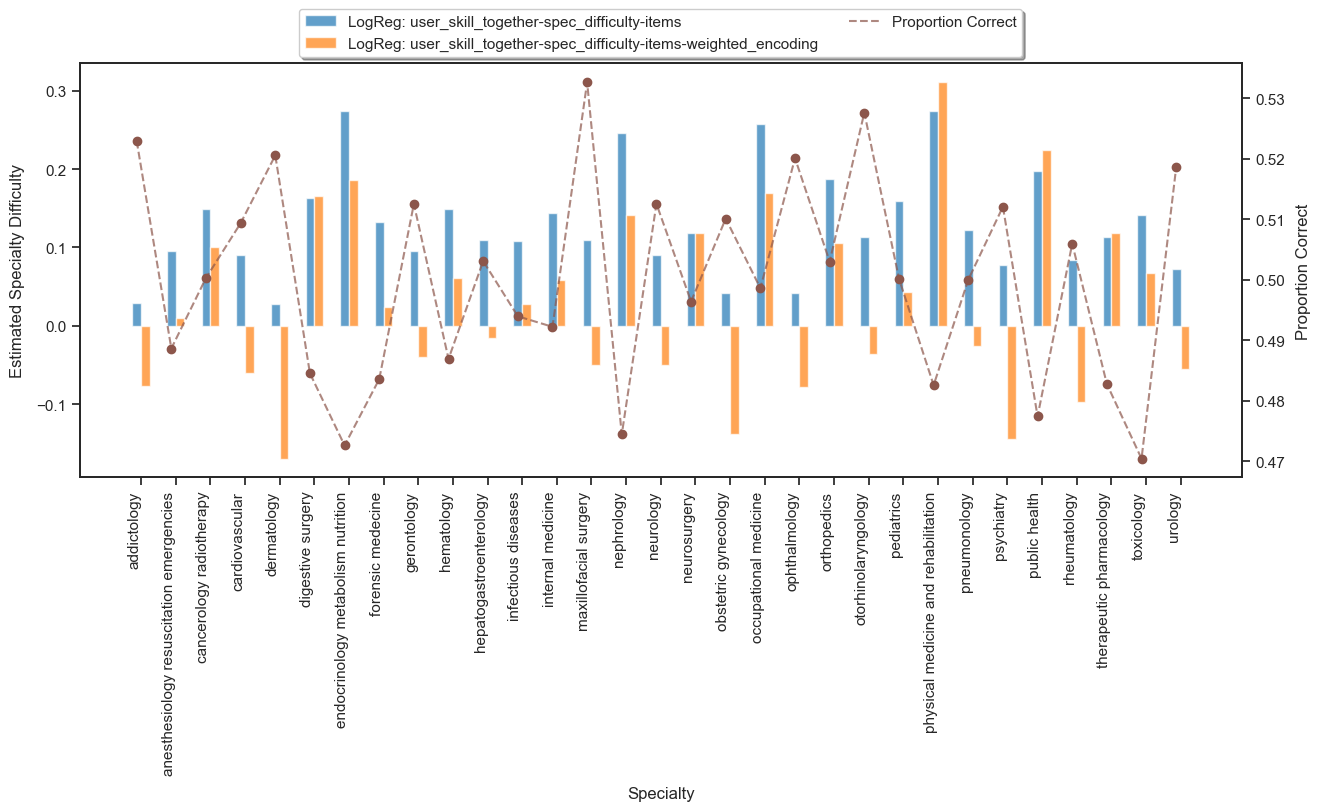

In [71]:
train_set = pd.read_csv(main_path + '/' + folder + '/'+ education_year + '/processed/train_set.csv') 
# Split rows with '+' in the kc_id column using explode
train_set['kc_id'] = train_set['kc_id'].str.split('+')
train_set = train_set.explode('kc_id')

# for each kc_id find the proportion of correct answers by the correct column wich is either 0 or 1
propotion_correct = train_set.groupby('kc_id')['correct'].mean().reset_index()
# rename the column to 'propotion_correct'
propotion_correct = propotion_correct.rename(columns={'correct': 'propotion_correct'})
# rename the kc_id to specialty
propotion_correct = propotion_correct.rename(columns={'kc_id': 'specialty'})

# merge propotion_correct and specialty_difficulty_logreg on specialty
specialty_difficulty_logreg_and_proportion_correct = pd.merge(specialty_difficulty_logreg, propotion_correct, on='specialty', how='left')

import seaborn as sns
import matplotlib.pyplot as plt

# Set the seaborn style for better-looking plots
sns.set(style="ticks", palette="colorblind")

# Plotting the data
fig, ax1 = plt.subplots(figsize=(18, 6))  # Adjust the figsize as needed

# Use color-blind-friendly colors for the bars
color_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Plotting the bar plots for difficulty on the left y-axis
bar_width = 0.3
index = range(len(specialty_difficulty_logreg_and_proportion_correct))
bars1=ax1.bar(index, specialty_difficulty_logreg_and_proportion_correct['spec_dif_user_skill_together-spec_difficulty-items'], bar_width, label='Unweighted Encoding', color=color_palette[0], alpha=0.7)
bars2=ax1.bar([pos + bar_width for pos in index], specialty_difficulty_logreg_and_proportion_correct['spec_dif_user_skill_together-spec_difficulty-items-weighted_encoding'], bar_width, label='Weighted Encoding', color=color_palette[1], alpha=0.7)

ax1.set_xlabel('Specialty', fontsize=20)
ax1.set_ylabel('Estimated Specialty Difficulty', fontsize=20)
ax1.set_xticks([pos + bar_width / 2 for pos in index])  # Adjust the xticks to center the bars
ax1.set_xticklabels([s.replace('_', ' ') for s in specialty_difficulty_logreg_and_proportion_correct['specialty']], rotation=90, ha='right', fontsize=20)

# Adding the scatter plot for proportion_correct on the right y-axis
ax2 = ax1.twinx()
scatter=ax2.scatter(index, specialty_difficulty_logreg_and_proportion_correct['propotion_correct'], color=color_palette[5], label='Proportion Correct')

# Adding a dashed line connecting the points in the scatter plot
line=ax2.plot(index, specialty_difficulty_logreg_and_proportion_correct['propotion_correct'], color=color_palette[5], linestyle='--', alpha=0.7)

ax2.set_ylabel('Proportion Correct', fontsize=20)
ax2.tick_params(axis='both', labelsize=20)

# Manually create legend handles with colors
legend_handles = [
    bars1[0], bars2[0],
    scatter, line[0]
]

# Create the legend with labels and colors
legend_labels = [
    'LogReg: user_skill_together-spec_difficulty-items',
    'LogReg: user_skill_together-spec_difficulty-items-weighted_encoding',
    'Proportion Correct'
]

# Move the legend to the upper center with horizontal layout and two columns
ax1.legend(legend_handles, legend_labels, loc='upper center', bbox_to_anchor=(0.5, 1.30), fancybox=True, shadow=True, ncol=2, fontsize=20)
# Adjust the plot layout to make room for the legend
plt.subplots_adjust(top=0.8)  # Increase the top margin

# Save to figure_folder
plt.savefig(figure_folder + '/spec_difficulty_vs_proportion_correct_logreg.png', dpi=300, bbox_inches='tight')
plt.show()  # Don't forget to add this line to actually display the plot




#### Compare Question difficutly per model statistically

In [16]:
warnings.filterwarnings('ignore')
# Columns to compare
columns_to_compare = [
    'quest_dif_user_skill_together-items',
    'quest_dif_user_skill_together-items-weighted_encoding',
    'quest_dif_user_skill_together-spec_difficulty-items',
    'quest_dif_user_skill_together-spec_difficulty-items-weighted_encoding'
]

# Performing one-way ANOVA
grouped_data = [question_difficulty_logreg[column] for column in columns_to_compare]
f_statistic, p_value = f_oneway(*grouped_data)

print("One-way ANOVA Results:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There is a statistically significant difference between at least one pair of columns.")
else:
    print("There is no statistically significant difference between the columns.")

# Perform one-way ANOVA
anova_results = pd.DataFrame(columns=['Column 1', 'Column 2', 'F-statistic', 'P-value'])

for i in range(len(columns_to_compare)):
    for j in range(i + 1, len(columns_to_compare)):
        col1 = columns_to_compare[i]
        col2 = columns_to_compare[j]
        f_statistic, p_value = f_oneway(question_difficulty_logreg[col1], question_difficulty_logreg[col2])
        anova_results = anova_results.append({'Column 1': col1, 'Column 2': col2, 'F-statistic': f_statistic, 'P-value': p_value}, ignore_index=True)

# Filter significant results
significant_results = anova_results[anova_results['P-value'] < 0.05]

# Format the table for the paper
formatted_table = tabulate(significant_results, headers='keys', tablefmt='latex_booktabs', floatfmt='.3e', showindex=False)

# Display the formatted table
print(formatted_table)


One-way ANOVA Results:
F-statistic: 0.010059753132651443
P-value: 0.9986181710524435
There is no statistically significant difference between the columns.
\begin{tabular}{}
\toprule
 Column 1   & Column 2   & F-statistic   & P-value   \\
\midrule
\bottomrule
\end{tabular}


#### compare students ability per model statistically

In [17]:
warnings.filterwarnings('ignore')
# Columns to compare
columns_to_compare = [
    'ability_user_skill_together-items',
    'ability_user_skill_together-items-weighted_encoding',
    'ability_user_skill_together-spec_difficulty-items',
    'ability_user_skill_together-spec_difficulty-items-weighted_encoding'
]

# Performing one-way ANOVA
grouped_data = [student_ability_logreg[column] for column in columns_to_compare]
f_statistic, p_value = f_oneway(*grouped_data)

print("One-way ANOVA Results:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There is a statistically significant difference between at least one pair of columns.")
else:
    print("There is no statistically significant difference between the columns.")

# Perform one-way ANOVA
anova_results = pd.DataFrame(columns=['Column 1', 'Column 2', 'F-statistic', 'P-value'])

for i in range(len(columns_to_compare)):
    for j in range(i + 1, len(columns_to_compare)):
        col1 = columns_to_compare[i]
        col2 = columns_to_compare[j]
        f_statistic, p_value = f_oneway(student_ability_logreg[col1], student_ability_logreg[col2])
        anova_results = anova_results.append({'Column 1': col1, 'Column 2': col2, 'F-statistic': f_statistic, 'P-value': p_value}, ignore_index=True)

# Filter significant results
significant_results = anova_results[anova_results['P-value'] < 0.05]

# Format the table for the paper
formatted_table = tabulate(significant_results, headers='keys', tablefmt='latex_booktabs', floatfmt='.3e', showindex=False)

# Display the formatted table
print(formatted_table)


One-way ANOVA Results:
F-statistic: 730.6688030741389
P-value: 0.0
There is a statistically significant difference between at least one pair of columns.
\begin{tabular}{llrr}
\toprule
 Column 1                                            & Column 2                                                            &   F-statistic &    P-value \\
\midrule
 ability\_user\_skill\_together-items                   & ability\_user\_skill\_together-items-weighted\_encoding                 &     1.499e+03 & 0.000e+00  \\
 ability\_user\_skill\_together-items                   & ability\_user\_skill\_together-spec\_difficulty-items                   &     3.554e+02 & 3.327e-79  \\
 ability\_user\_skill\_together-items                   & ability\_user\_skill\_together-spec\_difficulty-items-weighted\_encoding &     1.512e+03 & 0.000e+00  \\
 ability\_user\_skill\_together-items-weighted\_encoding & ability\_user\_skill\_together-spec\_difficulty-items                   &     5.700e+02 & 8.979e-126 \\
 a

#### Compare specialty diffciulty per model statistically (t-test)

In [20]:
from scipy import stats

# Perform paired t-test
t_stat, p_value = stats.ttest_rel(
    specialty_difficulty_logreg['spec_dif_user_skill_together-spec_difficulty-items'],
    specialty_difficulty_logreg['spec_dif_user_skill_together-spec_difficulty-items-weighted_encoding']
)

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 8.692349334409688
P-value: 1.0755812981316382e-09


# Elo

In [94]:
# set the path to the main_path+
os.chdir(main_path + folder + education_year)


In [95]:
# Question Diffciulty 
# firs we need to find the specialt of each question
# read the train_set.csv file form main_path + folder + education_year+ 'preprocessed_data' and give the name train_set
train_set = pd.read_csv(main_path + '/' + folder + '/'+ education_year + '/processed/train_set.csv')
spec_id_name=pd.read_csv(main_path + '/' + folder + '/'+ education_year + '/processed/skill_names_ids_map.csv') 
# have the unique user_id  in train_set (to use in student_ability_elo)
users_in_train = train_set['user_id'].unique()
# filter only the unique question and specialty pairs and have only item_id, kc_id columns
train_set = train_set.drop_duplicates(subset=['item_id', 'kc_id'])[['item_id', 'kc_id']]
# read the attempt_counter_question.csv file form main_path + folder + education_year+ 'preprocessed_data' and give the name attempt_counter_question
attempt_counter_question = pd.read_csv(main_path + '/' + folder + '/'+ education_year + '/processed/attempt_counter_question.csv')
# return the attempt_counter_question from short to long by item_id
# merge the train_set_unique and attempt_counter_question on item_id
train_set = pd.merge(train_set, attempt_counter_question, on='item_id', how='left')
# rename train_set as question_specialty
question_difficulty_elo = train_set

# Student Ability
attempt_counter_student = pd.read_csv(main_path + '/' + folder + '/'+ education_year + '/processed/attempt_counter_student_spec.csv')
# have onyl the rows where user_id is in users_in_train
attempt_counter_student = attempt_counter_student[attempt_counter_student['user_id'].isin(users_in_train)]
# to long format
student_ability_elo=pd.melt(attempt_counter_student,id_vars=['user_id'],var_name='kc_id', value_name='attempt_student')

# Specialty Difficulty
# read attempt_counter_spec.csv file form main_path + folder + education_year+ 'processed' and give the name attempt_counter_spec
specialty_difficulty_elo = pd.read_csv(main_path + '/' + folder + '/'+ education_year + '/processed/attempt_counter_spec.csv')


# read the question_difficulty.csv files from all the folders that start with 'result_logreg' in the path and give the names as quest_dif_x where x is the resting name of the folder after resulty_logreg
path= main_path + '/' + folder + '/'+ education_year
# Get a list of all directories in the path that start with 'results_elo'
dirs = [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d)) and d.startswith('result_elo')]
#dirs = [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d)) and d.startswith('result_elo') and '2nd' in d]

# Process each directory and read the 'question_difficulty.csv' file into a DataFrame with a custom name
for folder_name in dirs:
    #custom_name = f'quest_dif_{folder_name[len(prefix):]}'  # Create a custom name for the DataFrame

    custom_name = folder_name[len("result_elo") + 1:]  # Get the part of the folder_name after 'result_logreg' by adding 1 to skip the underscore

    # Split the custom_name by the dash '-' and get the part after 'result_logreg'
    # custom_name_parts = custom_name.split('-')
    # if len(custom_name_parts) > 1:
    #     custom_name = '-'.join(custom_name_parts[1:]) 
    # else:
    #     custom_name = custom_name_parts[0]
        
    # Construct the full path to the csv file
    difficulty_file_path = os.path.join(path+ '/' +folder_name+ '/training_output' + '/question_difficulty.csv')
    competency_file_path = os.path.join(path+ '/' +folder_name+ '/training_output' +  '/learner_competency.csv')
    specialty_difficulty_file_path= os.path.join(path+ '/' +folder_name+ '/training_output' + '/specialty_difficulty.csv')
    # Check if 'specialty_difficulty.csv' exists in the directory before attempting to read it
    if os.path.exists(specialty_difficulty_file_path):
        # read the csv file into a DataFrame and name the columns as item_id and difficulty
        this_specialty_difficulty = pd.read_csv(specialty_difficulty_file_path)
        this_specialty_difficulty.drop(columns=['Unnamed: 0'], inplace=True)
        this_specialty_difficulty.reset_index(inplace=True)
        # turn it to long format
        this_specialty_difficulty = pd.melt(this_specialty_difficulty, id_vars='index', var_name='specialty_id', value_name=f'spec_dif_{custom_name}')
        
        this_specialty_difficulty.drop(columns=['index'], inplace=True)

        this_specialty_difficulty['specialty_id'] = pd.to_numeric(this_specialty_difficulty['specialty_id'])
        this_specialty_difficulty = pd.merge(this_specialty_difficulty, spec_id_name, on='specialty_id', how='left')
        # remove specialty_id and index
        this_specialty_difficulty = this_specialty_difficulty.drop(['specialty_id'], axis=1)
        # merge the specialty_difficulty with the this_specialty_difficulty on item_id
        specialty_difficulty_elo = pd.merge(specialty_difficulty_elo, this_specialty_difficulty, on='specialty')
        
    else:
        # If the file does not exist, you can handle it accordingly (e.g., print a message or skip it)
        print(f"'specialty_difficulty.csv' not found in directory: {folder_name}")

    # if folder name include '2nd'
    if '2nd' in folder_name:
        # read the csv file into a DataFrame and name the columns as item_id and difficulty
        this_question_difficulty = pd.read_csv(difficulty_file_path)
        # rename the difficulty column as difficulty_x where x is the resting name of the folder after resulty_logreg
        this_question_difficulty = this_question_difficulty.rename(columns={'Unnamed: 0': 'item_id'})
        this_question_difficulty = this_question_difficulty.rename(columns={'0': f'quest_dif_{custom_name}'})
        # merge the question_difficulty with the this_question_difficulty on item_id
        question_difficulty_elo = pd.merge(question_difficulty_elo, this_question_difficulty, on='item_id', how='left')
    

    # read the csv file into a DataFrame and name the columns as user_id and competency
    this_competency = pd.read_csv(competency_file_path)
    this_competency.drop(columns=['Unnamed: 0'], inplace=True)
    this_competency.reset_index(inplace=True)
    this_competency=pd.melt(this_competency,id_vars='index',var_name='specialty_id', value_name=f'ability_{custom_name}')
    # rename index as user_id
    this_competency.rename(columns={'index':'user_id'},inplace=True)
    this_competency['specialty_id'] = pd.to_numeric(this_competency['specialty_id'])
    this_competency = pd.merge(this_competency, spec_id_name, on='specialty_id', how='left')
    this_competency = this_competency.drop(['specialty_id'], axis=1)
    # rename specialty as kc_id
    this_competency.rename(columns={'specialty':'kc_id'},inplace=True)
    
    # merge the student_ability with the this_competency on user_id and kc_id
    student_ability_elo = pd.merge(student_ability_elo, this_competency, on=['user_id', 'kc_id'], how='left')
    
question_difficulty_elo['kc_id'] = question_difficulty_elo['kc_id'].str.split('+')
spec_seperated_question_difficulty_elo = question_difficulty_elo.explode('kc_id')

'specialty_difficulty.csv' not found in directory: result_elo_q_0-skill_0
'specialty_difficulty.csv' not found in directory: result_elo_q_0-skill_0-1st-2nd


# Compare

## Compare question difficulties statistically

In [30]:
# Columns to compare
columns_to_compare = [
    'quest_dif_specdif_logreg-q_logreg-skill_logreg-1st-2nd',
    'quest_dif_specdif_logreg-q_logreg-skill_logreg-1st-2nd_attemptcounted',
    'quest_dif_q_0-skill_0-1st-2nd',
    'quest_dif_specdif_0-q_0-skill_0-1st-2nd'
]

# Performing one-way ANOVA
grouped_data = [question_difficulty_elo[column] for column in columns_to_compare]
f_statistic, p_value = f_oneway(*grouped_data)

print("One-way ANOVA Results:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There is a statistically significant difference between at least one pair of columns.")
else:
    print("There is no statistically significant difference between the columns.")

# Perform one-way ANOVA
anova_results = pd.DataFrame(columns=['Column 1', 'Column 2', 'F-statistic', 'P-value'])

for i in range(len(columns_to_compare)):
    for j in range(i + 1, len(columns_to_compare)):
        col1 = columns_to_compare[i]
        col2 = columns_to_compare[j]
        f_statistic, p_value = f_oneway(question_difficulty_elo[col1], question_difficulty_elo[col2])
        anova_results = anova_results.append({'Column 1': col1, 'Column 2': col2, 'F-statistic': f_statistic, 'P-value': p_value}, ignore_index=True)

# Filter significant results
significant_results = anova_results[anova_results['P-value'] < 0.05]

# Format the table for the paper
formatted_table = tabulate(significant_results, headers='keys', tablefmt='latex_booktabs', floatfmt='.3e', showindex=False)

# Display the formatted table
print(formatted_table)

One-way ANOVA Results:
F-statistic: 164.97851578988875
P-value: 7.371092365692085e-107
There is a statistically significant difference between at least one pair of columns.
\begin{tabular}{llrr}
\toprule
 Column 1                                                              & Column 2                                                              &   F-statistic &   P-value \\
\midrule
 quest\_dif\_specdif\_logreg-q\_logreg-skill\_logreg-1st-2nd                & quest\_dif\_specdif\_logreg-q\_logreg-skill\_logreg-1st-2nd\_attemptcounted &     3.728e+02 & 5.793e-83 \\
 quest\_dif\_specdif\_logreg-q\_logreg-skill\_logreg-1st-2nd                & quest\_dif\_q\_0-skill\_0-1st-2nd                                         &     3.220e+02 & 6.279e-72 \\
 quest\_dif\_specdif\_logreg-q\_logreg-skill\_logreg-1st-2nd                & quest\_dif\_specdif\_0-q\_0-skill\_0-1st-2nd                               &     7.000e+01 & 5.992e-17 \\
 quest\_dif\_specdif\_logreg-q\_logreg-skill\_logreg-1st-2nd\

## Compare Student ability statistically

In [31]:
# Columns to compare
columns_to_compare = [
    'ability_q_0-skill_0',
    'ability_q_0-skill_0-1st-2nd',
    'ability_specdif_0-q_0-skill_0',
    'ability_specdif_0-q_0-skill_0-1st-2nd',
    'ability_specdif_logreg-q_logreg-skill_logreg-1st-2nd',
    'ability_specdif_logreg-q_logreg-skill_logreg-1st-2nd_attemptcounted'
]

# Performing one-way ANOVA
grouped_data = [student_ability_elo[column] for column in columns_to_compare]
f_statistic, p_value = f_oneway(*grouped_data)

print("One-way ANOVA Results:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There is a statistically significant difference between at least one pair of columns.")
else:
    print("There is no statistically significant difference between the columns.")

# Perform one-way ANOVA
anova_results = pd.DataFrame(columns=['Column 1', 'Column 2', 'F-statistic', 'P-value'])

for i in range(len(columns_to_compare)):
    for j in range(i + 1, len(columns_to_compare)):
        col1 = columns_to_compare[i]
        col2 = columns_to_compare[j]
        f_statistic, p_value = f_oneway(student_ability_elo[col1], student_ability_elo[col2])
        anova_results = anova_results.append({'Column 1': col1, 'Column 2': col2, 'F-statistic': f_statistic, 'P-value': p_value}, ignore_index=True)

# Filter significant results
significant_results = anova_results[anova_results['P-value'] < 0.05]

# Format the table for the paper
formatted_table = tabulate(significant_results, headers='keys', tablefmt='latex_booktabs', floatfmt='.3e', showindex=False)

# Display the formatted table
print(formatted_table)

One-way ANOVA Results:
F-statistic: 90.4380888514029
P-value: 1.7080223579921284e-95
There is a statistically significant difference between at least one pair of columns.
\begin{tabular}{llrr}
\toprule
 Column 1                                             & Column 2                                                            &   F-statistic &   P-value \\
\midrule
 ability\_q\_0-skill\_0                                  & ability\_q\_0-skill\_0-1st-2nd                                         &     3.357e+01 & 6.878e-09 \\
 ability\_q\_0-skill\_0                                  & ability\_specdif\_0-q\_0-skill\_0                                       &     3.189e+01 & 1.634e-08 \\
 ability\_q\_0-skill\_0                                  & ability\_specdif\_0-q\_0-skill\_0-1st-2nd                               &     3.960e+01 & 3.127e-10 \\
 ability\_q\_0-skill\_0                                  & ability\_specdif\_logreg-q\_logreg-skill\_logreg-1st-2nd                &     7.491e+01 & 

# Elo Plots

## Error Plots

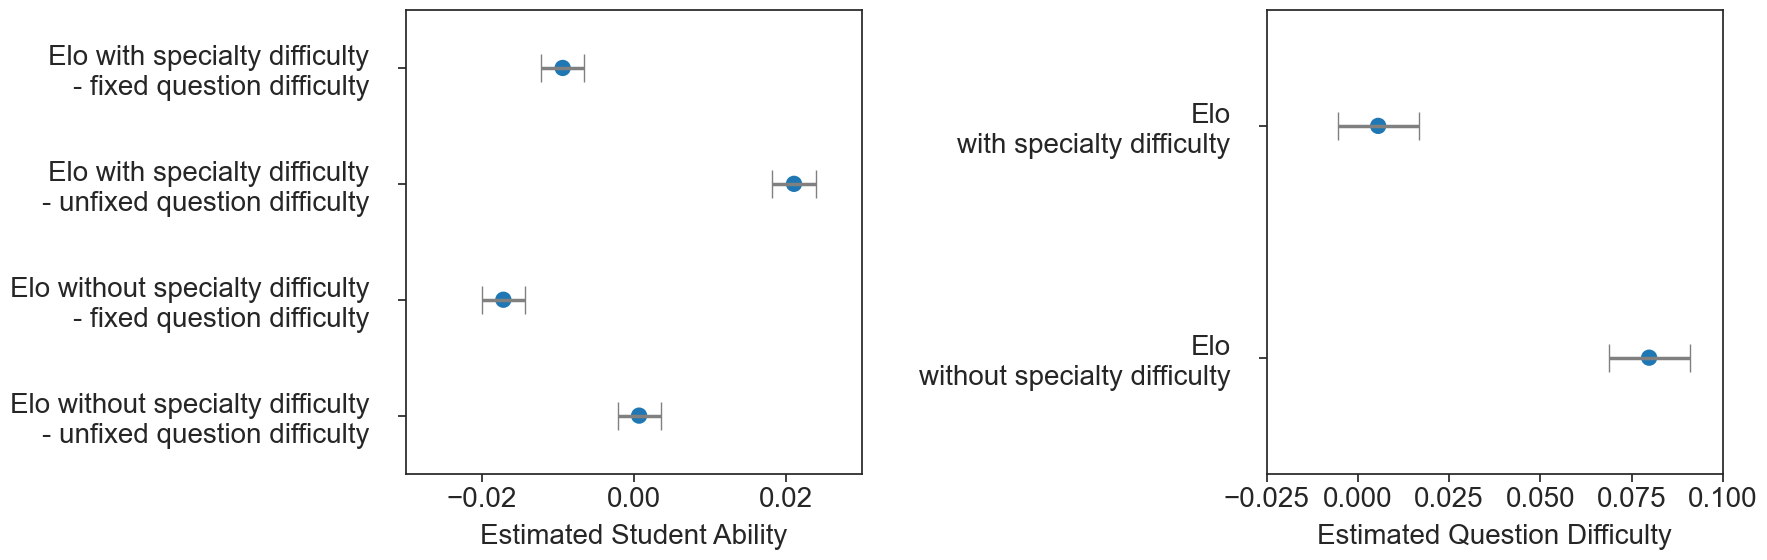

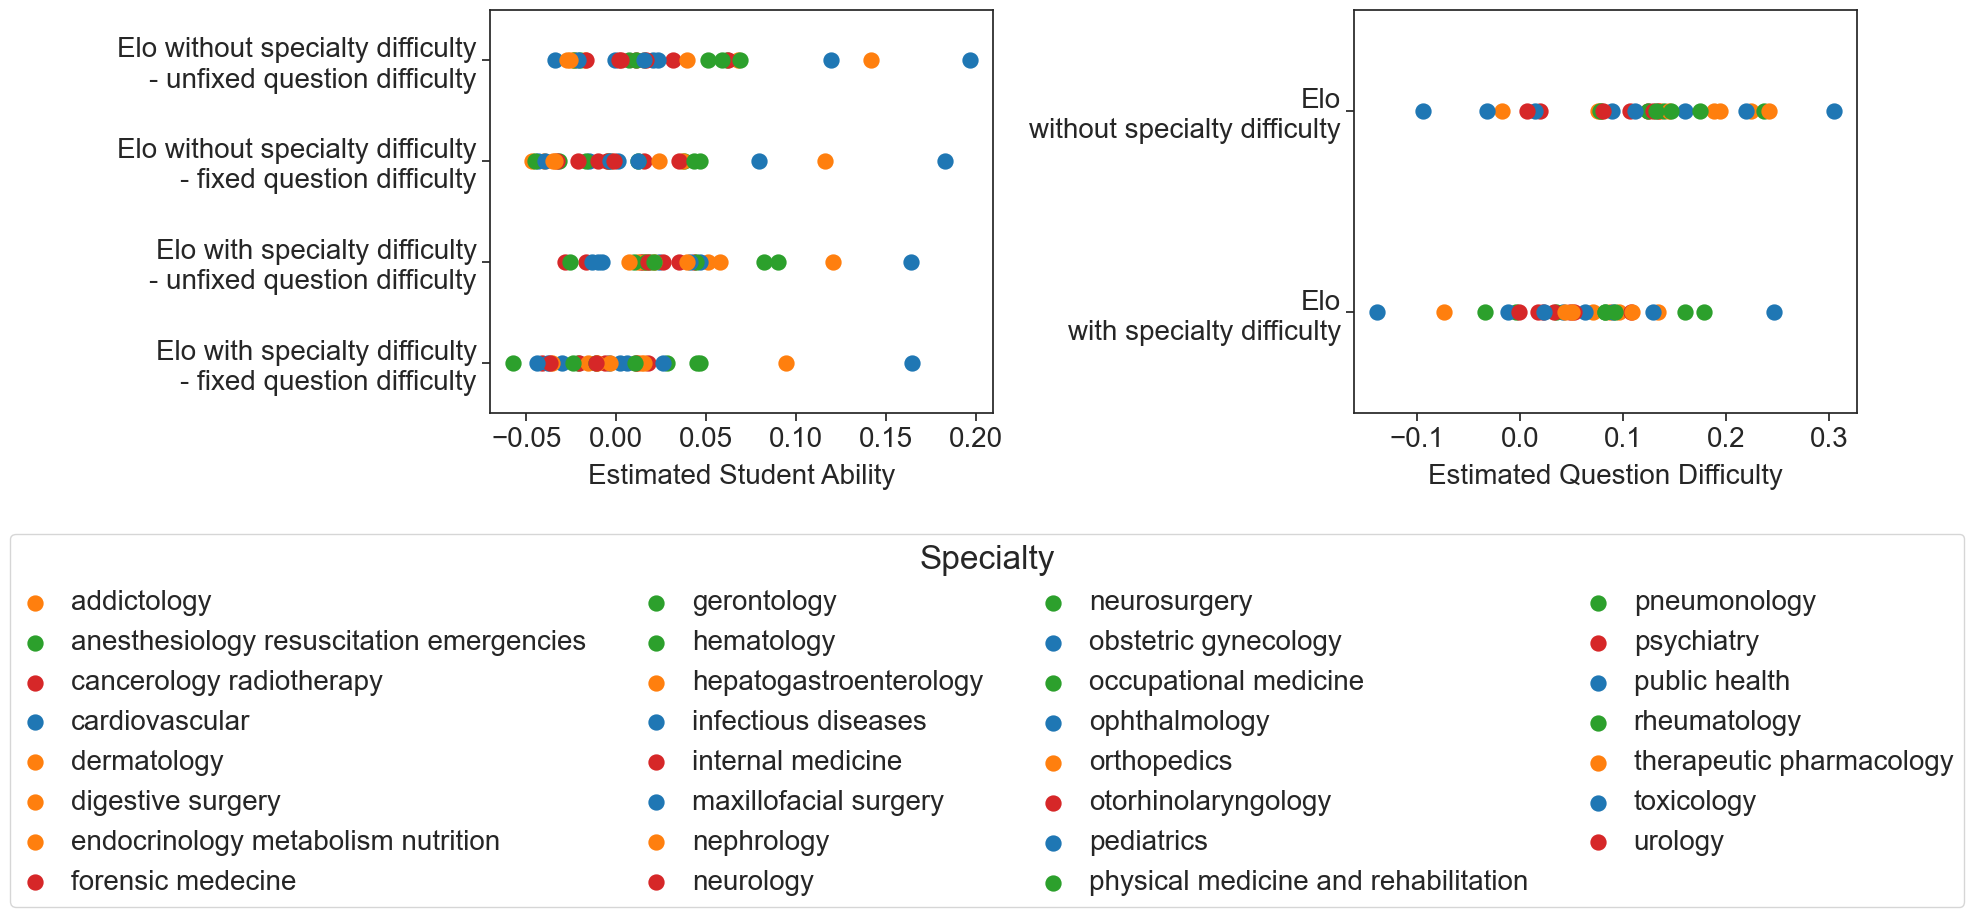

In [96]:
# remove the last 2 columns from question_difficulty_elo
question_difficulty_elo = question_difficulty_elo.iloc[:, :-2]
# 1- Question Difficutly
# from question_difficulty_logreg remove rows with count<attempt_threshold_question
question_difficulty_elo = question_difficulty_elo[question_difficulty_elo['count']>=attempt_threshold_question]
# open a df to save the results
question_difficulty_elo_results = pd.DataFrame(columns=['model','mean','confidence_interval'])
# for each columns start with quest_dif find mean

# For each column starting with quest_dif, find mean and confidence interval
for col in question_difficulty_elo.columns:
    if col.startswith('quest_dif'):
        # Calculate mean 
        mean = question_difficulty_elo[col].mean()
        # Calculate confidence interval
        confidence_interval = question_difficulty_elo[col].sem() * 1.96
        # Extract the model name without the prefix 'quest_dif' and remove underscores
        model_name = col[len('quest_dif_'):].replace('_', ' ')
        # Save results to question_difficulty_logreg_results
        question_difficulty_elo_results = question_difficulty_elo_results.append(
            {'model': model_name, 'mean': mean, 'confidence_interval': confidence_interval},
            ignore_index=True
        )
        

# for seperate specialties
# For each column starting with quest_dif, find mean and confidence interval
question_difficulty_elo_results_seperate = pd.DataFrame(columns=['model','mean','confidence_interval','specialty'])

# remove the last 2 columns from spec_seperated_question_difficulty_elo
spec_seperated_question_difficulty_elo = spec_seperated_question_difficulty_elo.iloc[:, :-2]
unique_spec=spec_seperated_question_difficulty_elo['kc_id'].unique()
# For each column starting with quest_dif, find mean and confidence interval
# for each unique specialty
for specialty in unique_spec:
    for col in spec_seperated_question_difficulty_elo.columns:
        if col.startswith('quest_dif'):
            # Calculate mean 
            mean = spec_seperated_question_difficulty_elo[spec_seperated_question_difficulty_elo['kc_id']==specialty][col].mean()
            # Calculate confidence interval
            confidence_interval = spec_seperated_question_difficulty_elo[spec_seperated_question_difficulty_elo['kc_id']==specialty][col].sem() * 1.96
            # Extract the model name without the prefix 'quest_dif' and remove underscores
            model_name = col[len('quest_dif_'):].replace('_', ' ')
            # Save results to question_difficulty_logreg_results
            question_difficulty_elo_results_seperate = question_difficulty_elo_results_seperate.append(
                {'model': model_name, 'mean': mean, 'confidence_interval': confidence_interval,'specialty':specialty},
                ignore_index=True
            )
            




# Student Ability
# remove the last 2 columns from student_ability_elo
student_ability_elo = student_ability_elo.iloc[:, :-2]
#  from student_ability_logreg remove rows with count<attempt_threshold_student
student_ability_elo=student_ability_elo[student_ability_elo['attempt_student']>=attempt_threshold_student]

# open a df to store the results
student_ability_elo_results=pd.DataFrame(columns=['model','mean','confidence_interval'])


# For each column starting with quest_dif, find mean and confidence interval
for col in student_ability_elo.columns:
    if col.startswith('ability'):
        # Calculate mean 
        mean = student_ability_elo[col].mean()
        # Calculate confidence interval
        confidence_interval = student_ability_elo[col].sem() * 1.96
        # Extract the model name without the prefix 'quest_dif' and remove underscores
        model_name = col[len('ability_'):].replace('_', ' ')
        # Save results to question_difficulty_logreg_results
        student_ability_elo_results = student_ability_elo_results.append(
            {'model': model_name, 'mean': mean, 'confidence_interval': confidence_interval},
            ignore_index=True
        )
        




# for seperate specialties
# For each column starting with quest_dif, find mean and confidence interval
student_ability_elo_results_seperate = pd.DataFrame(columns=['model','mean','confidence_interval','specialty'])

unique_spec=student_ability_elo['kc_id'].unique()
# For each column starting with quest_dif, find mean and confidence interval
# for each unique specialty
for specialty in unique_spec:
    for col in student_ability_elo.columns:
        if col.startswith('ability'):
            # Calculate mean 
            mean = student_ability_elo[student_ability_elo['kc_id']==specialty][col].mean()
            # Calculate confidence interval
            confidence_interval = student_ability_elo[student_ability_elo['kc_id']==specialty][col].sem() * 1.96
            # Extract the model name without the prefix 'quest_dif' and remove underscores
            model_name = col[len('ability_'):].replace('_', ' ')
            # Save results to question_difficulty_logreg_results
            student_ability_elo_results_seperate = student_ability_elo_results_seperate.append(
                {'model': model_name, 'mean': mean, 'confidence_interval': confidence_interval,'specialty':specialty},
                ignore_index=True
            )
            

# Get the order of specialties in the first dataframe
specialty_order = question_difficulty_elo_results_seperate['specialty'].unique()

# Reorder the 'specialty' column in the second dataframe based on the order in the first dataframe
student_ability_elo_results_seperate['specialty'] = pd.Categorical(student_ability_elo_results_seperate['specialty'], categories=specialty_order, ordered=True)



### combined plots

# 1

import matplotlib.pyplot as plt
import seaborn as sns

# Set font size
plt.rcParams.update({'font.size': 20})

# Define color palette
color_palette_31 = sns.color_palette('tab10', n_colors=4)

# Create a new figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot the first subplot (Student Ability Estimates)
sns.pointplot(x='mean', y='model', data=student_ability_elo_results, ci='sd', capsize=0.5,
              errwidth=2.5, markers='o', linestyles='', markersize=25, ax=axes[0])  # Increase the dot size and error bar width
axes[0].errorbar(x=student_ability_elo_results['mean'], y=student_ability_elo_results['model'],
                 xerr=student_ability_elo_results['confidence_interval'], fmt='none', ecolor='gray', capsize=10, elinewidth=2.5)  # Adjust error line length and width
axes[0].set_xlim(-0.03, 0.03)
axes[0].set_ylim(-0.5, 3.5)
axes[0].set_xlabel('Estimated Student Ability', fontsize=20)
axes[0].set_ylabel('', fontsize=20)
axes[0].tick_params(axis='both', labelsize=20)  # Adjust tick label font size
y_ticks_student = [0, 1, 2, 3]
y_tick_labels_student = ['Elo without specialty difficulty\n- unfixed question difficulty',
                         'Elo without specialty difficulty\n- fixed question difficulty',
                         'Elo with specialty difficulty\n- unfixed question difficulty',
                         'Elo with specialty difficulty\n- fixed question difficulty']
axes[0].set_yticks(y_ticks_student)
axes[0].set_yticklabels(y_tick_labels_student, fontsize=20)
#axes[0].set_title('Student Ability Estimates', fontsize=20)
axes[0].tick_params(axis='y', pad=20)  # Increase the distance between y-tick labels and ticks

# Plot the second subplot (Question Difficulty Estimates)
sns.pointplot(x='mean', y='model', data=question_difficulty_elo_results, ci='sd', capsize=0.5,
              errwidth=2.5, markers='o', linestyles='', markersize=25, ax=axes[1])  # Increase the dot size and error bar width
axes[1].errorbar(x=question_difficulty_elo_results['mean'], y=question_difficulty_elo_results['model'],
                 xerr=question_difficulty_elo_results['confidence_interval'], fmt='none', ecolor='gray', capsize=10, elinewidth=2.5)  # Adjust error line length and width
axes[1].set_xlim(-0.025, 0.1)
axes[1].set_ylim(-0.5, 1.5)
axes[1].set_xlabel('Estimated Question Difficulty', fontsize=20)
axes[1].set_ylabel('', fontsize=20)
axes[1].tick_params(axis='both', labelsize=20)  # Adjust tick label font size
axes[1].set_yticks(plt.yticks()[0])
axes[1].set_yticklabels(['Elo\nwithout specialty difficulty', 'Elo\nwith specialty difficulty'], fontsize=20)
#axes[1].set_title('Question Difficulty Estimates', fontsize=20)
axes[1].tick_params(axis='y', pad=20)  # Increase the distance between y-tick labels and ticks

# Adjust the layout and spacing
plt.tight_layout()

# Save the combined figure
plt.savefig(figure_folder + 'combined_student_ability_question_difficulty_elo_notseperatedbyspec.png', dpi=300, bbox_inches='tight')

# Show the combined figure
plt.show()

# 2

import matplotlib.pyplot as plt
import seaborn as sns

# Set font size
plt.rcParams.update({'font.size': 20})

# Create a new figure
fig = plt.figure(figsize=(18, 6))

# First subplot (Student Ability Estimates)
plt.subplot(121)
alpha_value = 0.2
sns.pointplot(x='mean', y='model', data=student_ability_elo_results_seperate, hue='specialty', palette=color_palette_31, ci='sd', capsize=0.5,
              errwidth=1.5, markers='o', linestyles='', markersize=20, alpha=alpha_value)
plt.xlabel('Estimated Student Ability', fontsize=20)
plt.ylabel('', fontsize=20)
plt.tick_params(axis='both', labelsize=20)  # Adjust tick label font size
y_tick_labels_student = ['Elo without specialty difficulty\n- unfixed question difficulty',
                         'Elo without specialty difficulty\n- fixed question difficulty',
                         'Elo with specialty difficulty\n- unfixed question difficulty',
                         'Elo with specialty difficulty\n- fixed question difficulty']
plt.yticks(range(len(y_tick_labels_student)), y_tick_labels_student, fontsize=20)

# remove legend from subplots
plt.gca().get_legend().remove()

# Second subplot (Question Difficulty Estimates)
plt.subplot(122)
alpha_value = 0.2
sns.pointplot(x='mean', y='model', data=question_difficulty_elo_results_seperate, hue='specialty', palette=color_palette_31,
              ci='sd', capsize=0.5, errwidth=1.5, markers='o', linestyles='', markersize=15, alpha=alpha_value)
plt.xlabel('Estimated Question Difficulty', fontsize=20)
y_tick_labels_question = ['Elo\nwithout specialty difficulty', 'Elo\nwith specialty difficulty']
plt.yticks([0, 1], y_tick_labels_question, fontsize=20)
plt.ylabel('', fontsize=20)
plt.tick_params(axis='both', labelsize=20)  # Adjust tick label font size

# remove legend from subplots
plt.gca().get_legend().remove()

# Get the handles and labels from the last subplot (Question Difficulty Estimates)
handles, labels = plt.gca().get_legend_handles_labels()
order = sorted(range(len(labels)), key=lambda k: labels[k])
handles = [handles[i] for i in order]
labels = [labels[i].replace('_', ' ') for i in order]  # Replace underscores with spaces

# Combine the legends into a single legend outside the subplots
legend = fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0), title='Specialty', ncol=4, title_fontsize='large', handlelength=1)

# Adjust the layout and spacing
plt.subplots_adjust(bottom=0.2, top=0.8, wspace=0.3)

# Add some distance between the plots and the legend
plt.tight_layout(rect=(0, 0, 1, 0.9))

# Save the combined figure
plt.savefig(figure_folder + 'combined_student_ability_question_difficulty_elo_seperatedbyspec.png', dpi=300, bbox_inches='tight')

# Show the combined figure
plt.show()


        

## Violin plots

IndexError: list index out of range

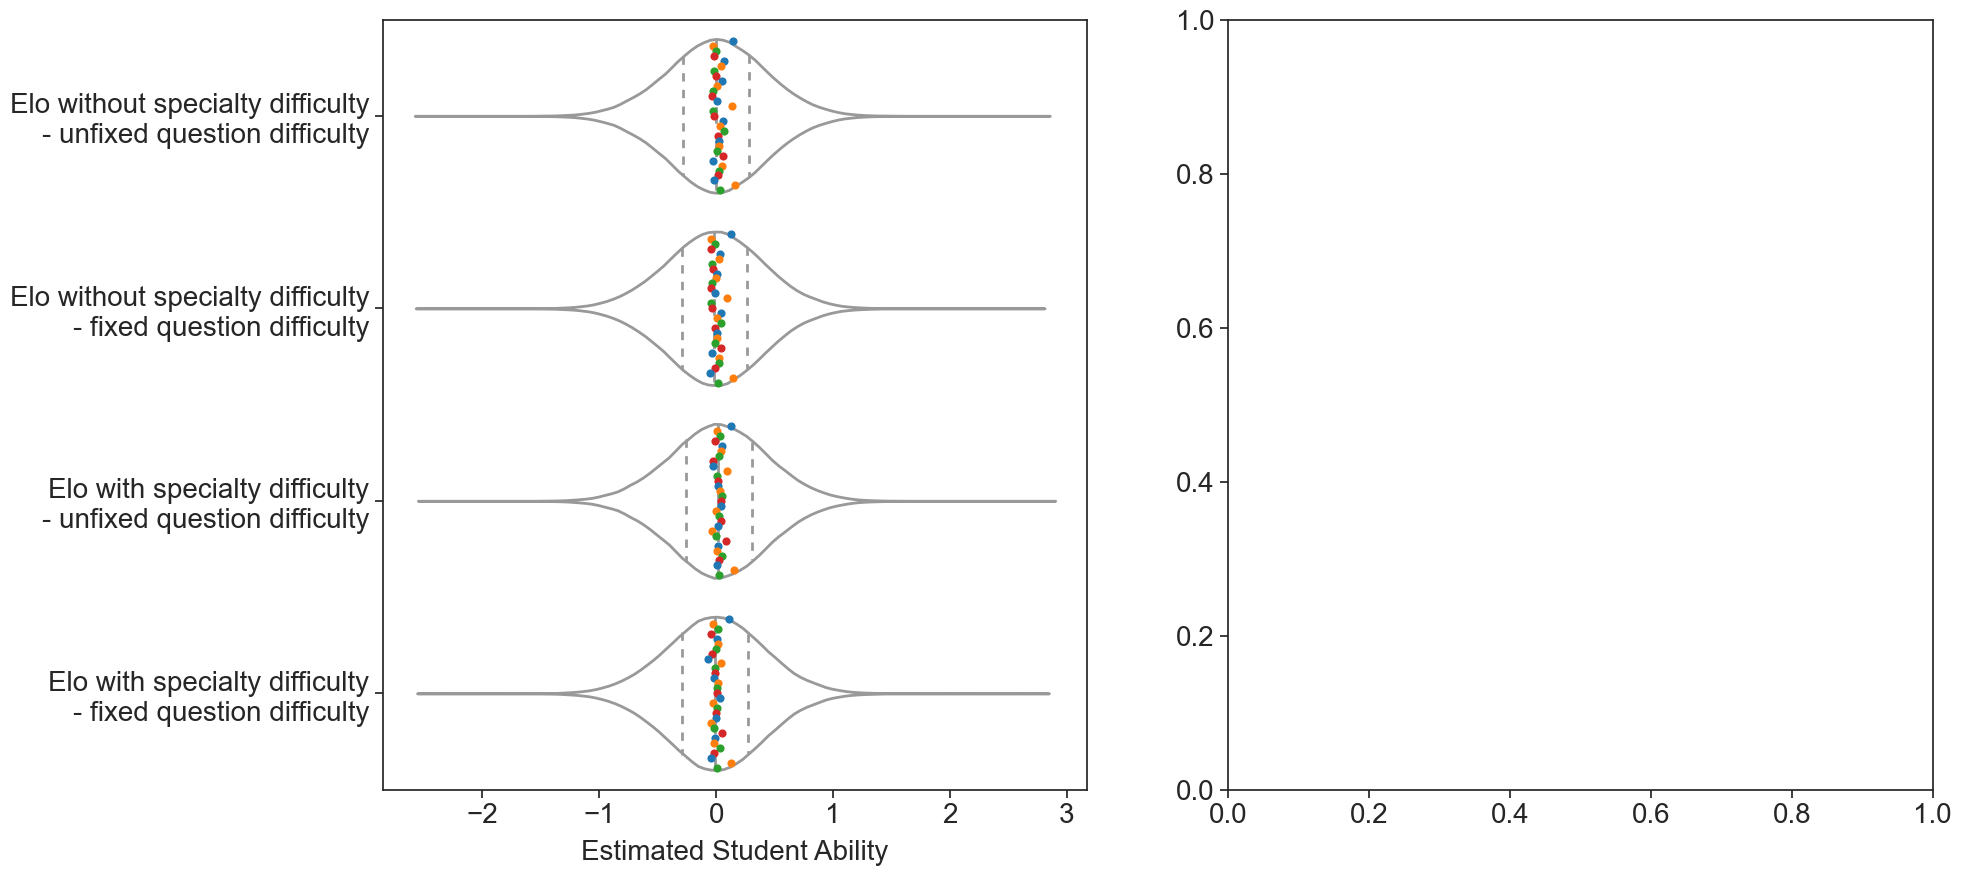

In [98]:
#  from student_ability_logreg remove rows with count<attempt_threshold_student
student_ability_elo=student_ability_elo[student_ability_elo['attempt_student']>=attempt_threshold_student]
# remove the last 2 columns from student_ability_elo
#student_ability_elo = student_ability_elo.iloc[:, :-2]
# melt
student_ability_elo_melted = student_ability_elo.melt(id_vars=['user_id', 'kc_id','attempt_student'], var_name='model_name', value_name='estimated_student_ability')


question_difficulty_elo = question_difficulty_elo[question_difficulty_elo['count']>=attempt_threshold_question]
# remove the last 2 columns
#question_difficulty_elo = question_difficulty_elo.iloc[:, :-2]
# melt
question_difficulty_elo_melted = question_difficulty_elo.melt(id_vars=['item_id', 'kc_id','count'], var_name='model_name', value_name='estimated_question_difficulty')


import matplotlib.pyplot as plt
import seaborn as sns

# Set the seaborn style and color palette
sns.set(style="ticks", palette=color_palette_31)

# Set other plot settings in a dictionary
plot_settings = {
    'font_size': 20,
    'fig_width': 10,
    'fig_height': 6,
    'linewidth': 2,
    'marker_size': 8,  # Adjust the marker size here
    'axis_label_spacing': 8,
    'font_family': 'sans-serif'
}

# Update the matplotlib rcParams using the plot_settings dictionary
plt.rcParams.update({
    'font.size': plot_settings['font_size'],
    'axes.labelsize': plot_settings['font_size'],
    'xtick.labelsize': plot_settings['font_size'],
    'ytick.labelsize': plot_settings['font_size'],
    'legend.fontsize': plot_settings['font_size'],
    'figure.titlesize': plot_settings['font_size'] + 2,
    'figure.figsize': (plot_settings['fig_width'], plot_settings['fig_height']),
    'lines.linewidth': plot_settings['linewidth'],
    'lines.markersize': plot_settings['marker_size'],
    'axes.labelpad': plot_settings['axis_label_spacing'],
    'font.family': plot_settings['font_family']
})

# Calculate the median values for each kc_id
student_ability_median = student_ability_elo_melted.groupby(['model_name', 'kc_id'])['estimated_student_ability'].median().reset_index()

# Set the data and create the main violin plots
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# First subplot - Violin plot for Estimated Student Ability
sns.violinplot(x='estimated_student_ability', y='model_name', data=student_ability_elo_melted, inner='quartile', ax=axes[0], color='white')
sns.pointplot(x='estimated_student_ability', y='model_name', data=student_ability_median, hue='kc_id', dodge=True, markers='o', scale=0.5, linestyles='', ax=axes[0], palette=color_palette_31, alpha=0.5)


axes[0].set_xlabel('Estimated Student Ability')
axes[0].set_ylabel('')
axes[0].set_yticklabels(['Elo without specialty difficulty\n- unfixed question difficulty',
                         'Elo without specialty difficulty\n- fixed question difficulty',
                         'Elo with specialty difficulty\n- unfixed question difficulty',
                         'Elo with specialty difficulty\n- fixed question difficulty'])

# Remove the legend from the first subplot
axes[0].get_legend().remove()

# Set the legend under the first subplot
legend_elements = [plt.Line2D([0], [0], marker='o', markersize=plot_settings['marker_size'], color=color_palette_31[i], label=kc_id, linestyle='') for i, kc_id in enumerate(student_ability_median['kc_id'].unique())]
legend = axes[0].legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.8, -0.15), ncol=4, title='specialty', title_fontsize=8)
legend.get_title().set_fontsize(plot_settings['font_size'])

# Second subplot - Violin plot for Estimated Question Difficulty
sns.violinplot(x='estimated_question_difficulty', y='model_name', data=question_difficulty_elo_melted, inner='quartile', linewidth=plot_settings['linewidth'], ax=axes[1], color='white')
axes[1].set_xlabel('Estimated Question Difficulty')
axes[1].set_ylabel('')
axes[1].set_yticklabels(['Elo without specialty difficulty', 'Elo with specialty difficulty'])

# Distance between subplots
plt.subplots_adjust(wspace=0.7)

# save plot
plt.savefig(figure_folder+'violin_elo.png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()


## Specialty Difficutyl

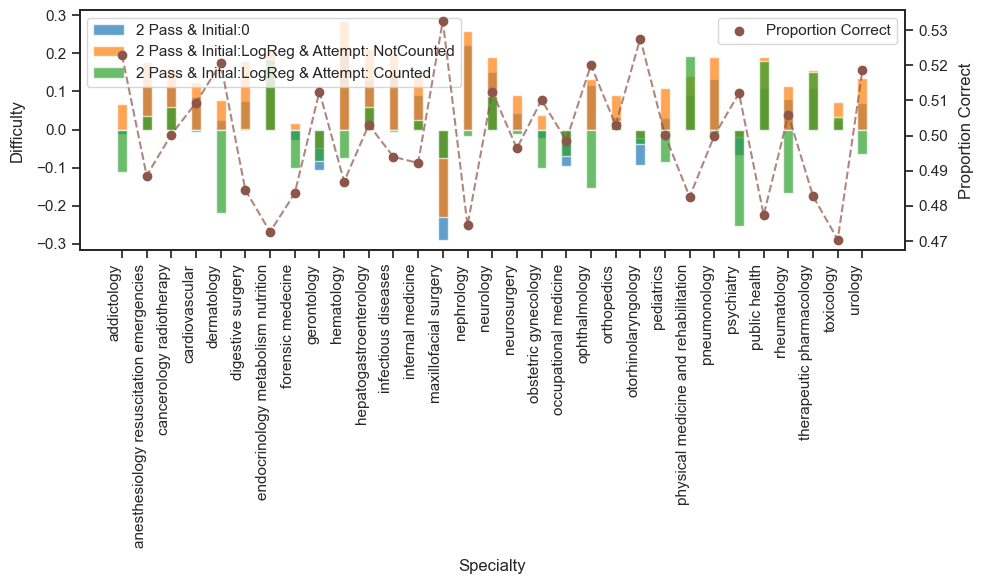

In [77]:
train_set = pd.read_csv(main_path + '/' + folder + '/'+ education_year + '/processed/train_set.csv') 
# Split rows with '+' in the kc_id column using explode
train_set['kc_id'] = train_set['kc_id'].str.split('+')
train_set = train_set.explode('kc_id')

# for each kc_id find the proportion of correct answers by the correct column wich is either 0 or 1
propotion_correct = train_set.groupby('kc_id')['correct'].mean().reset_index()
# rename the column to 'propotion_correct'
propotion_correct = propotion_correct.rename(columns={'correct': 'propotion_correct'})
# rename the kc_id to specialty
propotion_correct = propotion_correct.rename(columns={'kc_id': 'specialty'})

# merge propotion_correct and specialty_difficulty_logreg on specialty
specialty_difficulty_elo_and_proportion_correct = pd.merge(specialty_difficulty_elo, propotion_correct, on='specialty', how='left')

# Set the seaborn style for better-looking plots
sns.set(style="ticks", palette="colorblind")

# Plotting the data
fig, ax1 = plt.subplots()

# Use color-blind-friendly colors for the bars
color_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Plotting the bar plots for difficulty on the left y-axis
bar_width = 0.4
index = range(len(specialty_difficulty_elo_and_proportion_correct))
#ax1.bar(index, specialty_difficulty_elo_and_proportion_correct['spec_dif_specdif_0-q_0-skill_0'], bar_width, label='1 Pass & Initial:0', color=color_palette[3], alpha=0.7)
ax1.bar(index, specialty_difficulty_elo_and_proportion_correct['spec_dif_specdif_0-q_0-skill_0-1st-2nd'], bar_width, label='2 Pass & Initial:0', color=color_palette[0], alpha=0.7)
ax1.bar(index, specialty_difficulty_elo_and_proportion_correct['spec_dif_specdif_logreg-q_logreg-skill_logreg-1st-2nd'], bar_width, label='2 Pass & Initial:LogReg & Attempt: NotCounted', color=color_palette[1], alpha=0.7)
ax1.bar(index, specialty_difficulty_elo_and_proportion_correct['spec_dif_specdif_logreg-q_logreg-skill_logreg-1st-2nd_attemptcounted'], bar_width, label='2 Pass & Initial:LogReg & Attempt: Counted', color=color_palette[2], alpha=0.7)

ax1.set_xlabel('Specialty')
ax1.set_ylabel('Difficulty')
ax1.set_xticks(index)
ax1.set_xticklabels([s.replace('_', ' ') for s in specialty_difficulty_elo_and_proportion_correct['specialty']], rotation=90, ha='right')
ax1.legend(loc='upper left')

# Adding the scatter plot for proportion_correct on the right y-axis
ax2 = ax1.twinx()
ax2.scatter(index, specialty_difficulty_elo_and_proportion_correct['propotion_correct'], color=color_palette[5], label='Proportion Correct')

# Adding a dashed line connecting the points in the scatter plot
ax2.plot(index, specialty_difficulty_elo_and_proportion_correct['propotion_correct'], color=color_palette[5], linestyle='--', alpha=0.7)

ax2.set_ylabel('Proportion Correct')
ax2.legend(loc='upper right')

plt.tight_layout()
# save to figure_folder
plt.savefig(figure_folder + '/spec_difficulty_vs_proportion_correct_elo.png', dpi=300)
plt.show()

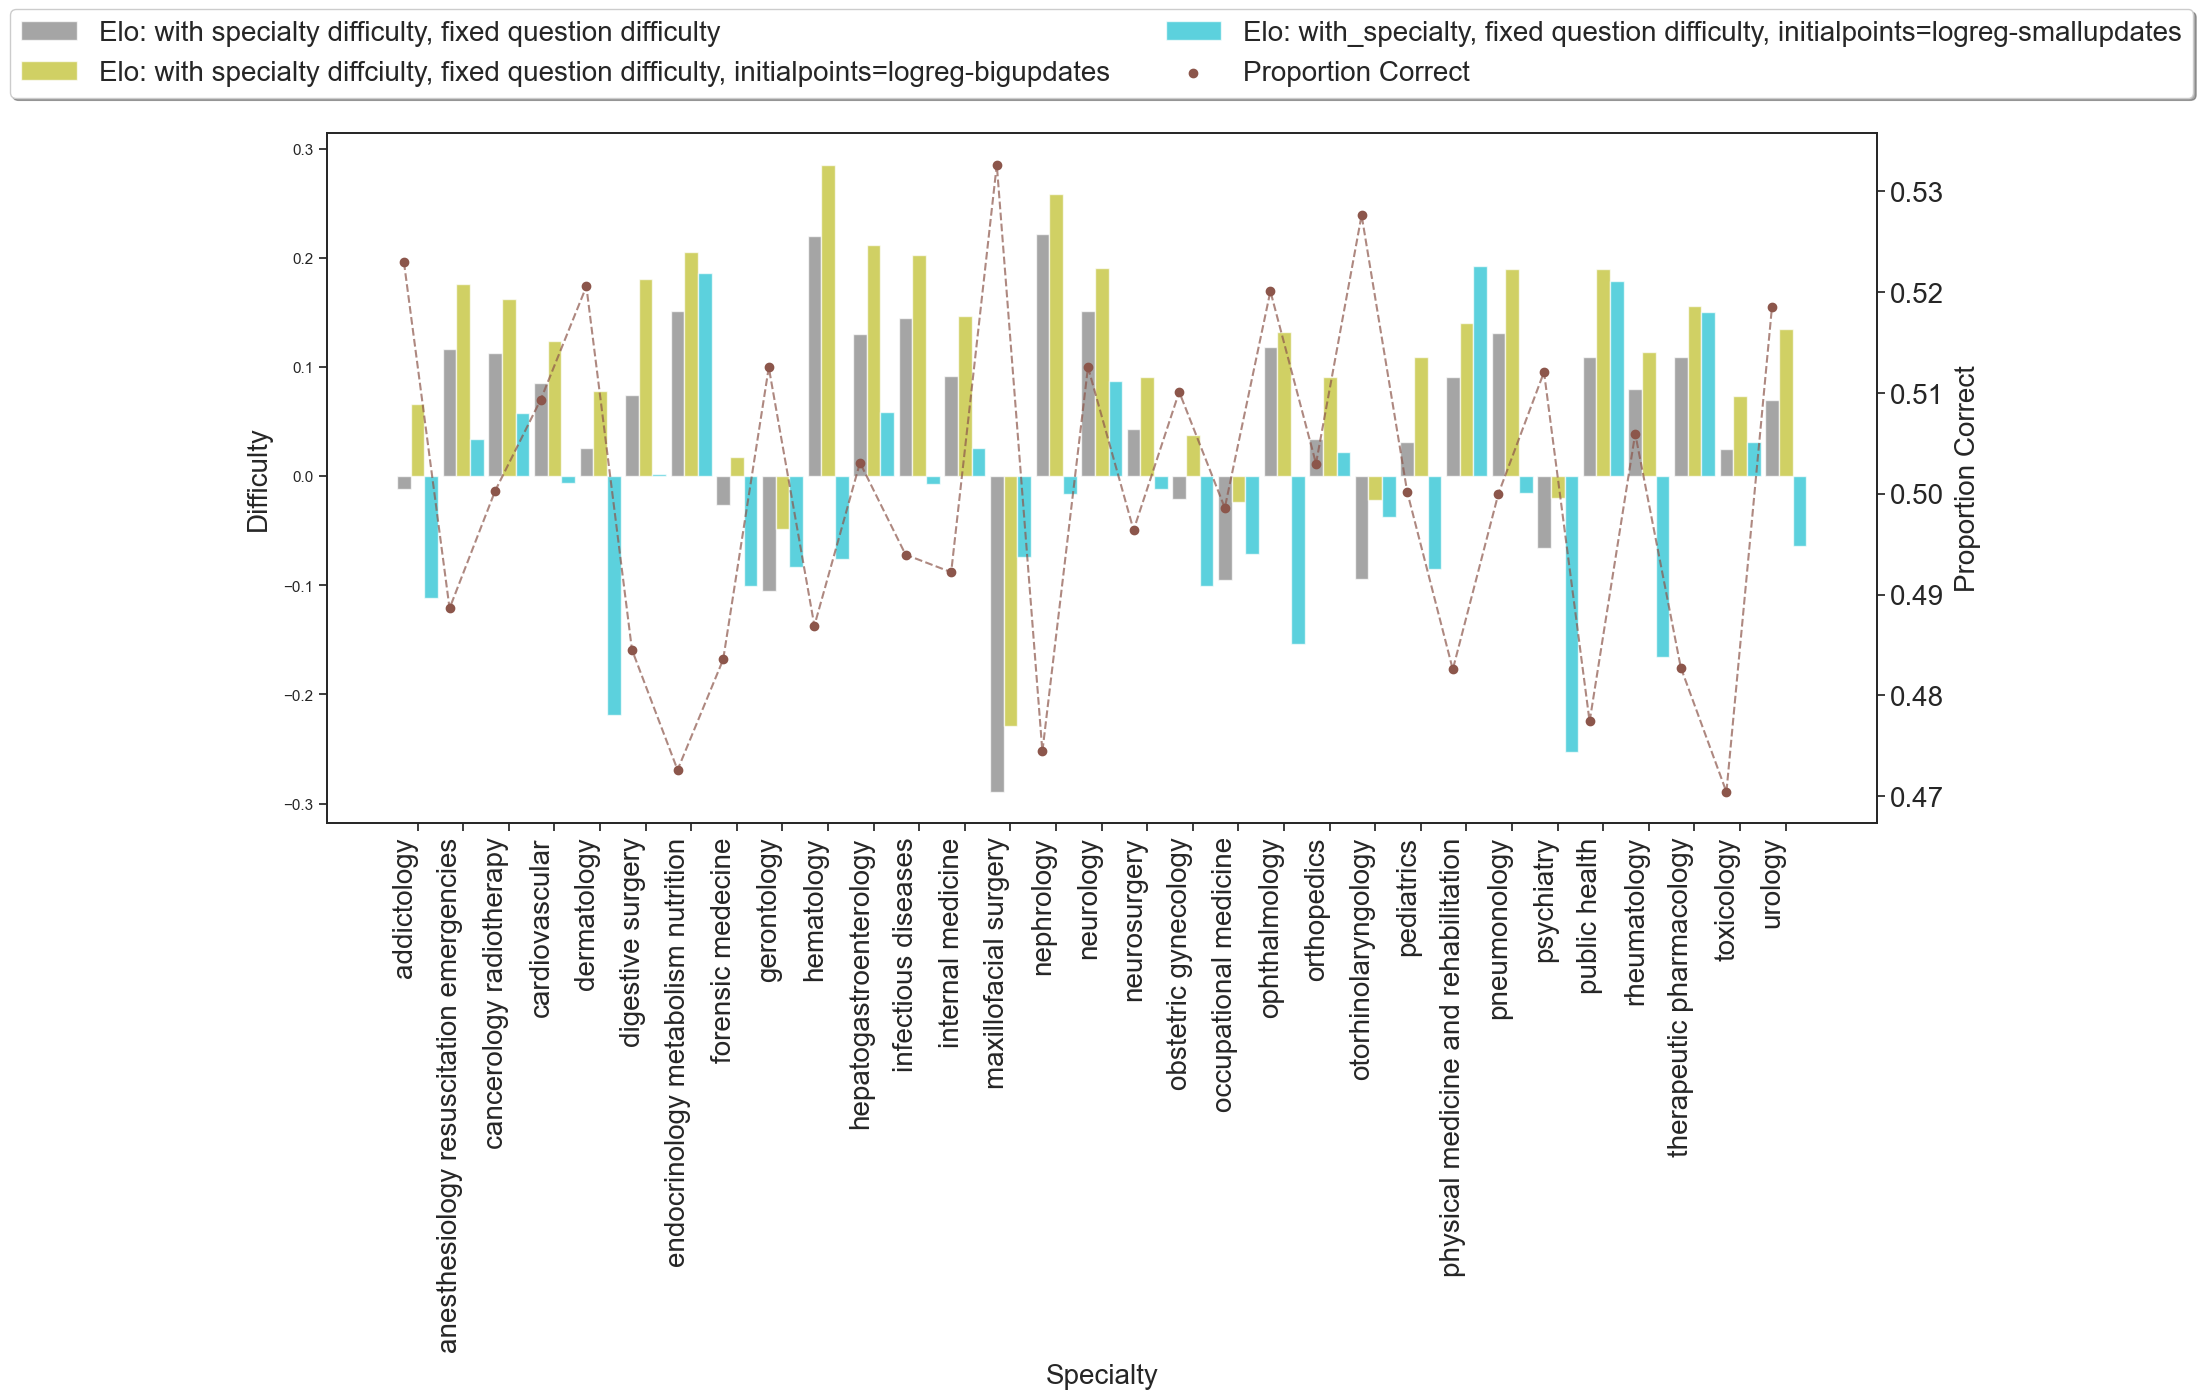

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the seaborn style for better-looking plots
sns.set(style="ticks", palette="colorblind")

# Plotting the data
fig, ax1 = plt.subplots(figsize=(20, 10))  # Adjust the figsize as needed

# Use color-blind-friendly colors for the bars
color_palette = ['#7f7f7f', '#bcbd22', '#17becf', '#8c564b']

# Plotting the bar plots for difficulty on the left y-axis
bar_width = 0.3
index = range(len(specialty_difficulty_elo_and_proportion_correct))

bars1 = ax1.bar(index, specialty_difficulty_elo_and_proportion_correct['spec_dif_specdif_0-q_0-skill_0-1st-2nd'], bar_width, color=color_palette[0], alpha=0.7)
bars2 = ax1.bar([pos + bar_width for pos in index], specialty_difficulty_elo_and_proportion_correct['spec_dif_specdif_logreg-q_logreg-skill_logreg-1st-2nd'], bar_width, color=color_palette[1], alpha=0.7)
bars3 = ax1.bar([pos + 2 * bar_width for pos in index], specialty_difficulty_elo_and_proportion_correct['spec_dif_specdif_logreg-q_logreg-skill_logreg-1st-2nd_attemptcounted'], bar_width, color=color_palette[2], alpha=0.7)

ax1.set_xlabel('Specialty', fontsize=20)
ax1.set_ylabel('Difficulty', fontsize=20)
ax1.set_xticks([pos + bar_width for pos in index])  # Adjust the xticks to center the group of bars
ax1.set_xticklabels([s.replace('_', ' ') for s in specialty_difficulty_elo_and_proportion_correct['specialty']], rotation=90, ha='right', fontsize=20)

# Adding the scatter plot for proportion_correct on the right y-axis
ax2 = ax1.twinx()
scatter = ax2.scatter(index, specialty_difficulty_elo_and_proportion_correct['propotion_correct'], color=color_palette[3], label='Proportion Correct')

# Adding a dashed line connecting the points in the scatter plot
line = ax2.plot(index, specialty_difficulty_elo_and_proportion_correct['propotion_correct'], color=color_palette[3], linestyle='--', alpha=0.7)

ax2.set_ylabel('Proportion Correct', fontsize=20)
ax2.tick_params(axis='both', labelsize=20)

# Manually create legend handles with colors
legend_handles = [
    bars1[0], bars2[0], bars3[0],
    scatter, line[0]
]

# Create the legend with labels and colors
legend_labels = [
    'Elo: with specialty difficulty, fixed question difficulty',
    'Elo: with specialty diffciulty, fixed question difficulty, initialpoints=logreg-bigupdates',
    'Elo: with_specialty, fixed question difficulty, initialpoints=logreg-smallupdates',
    'Proportion Correct'
]

# Move the legend to the upper center with horizontal layout and two columns
ax1.legend(legend_handles, legend_labels, loc='upper center', bbox_to_anchor=(0.5, 1.2), fancybox=True, shadow=True, ncol=2, fontsize=20)
# Adjust the plot layout to make room for the legend
plt.subplots_adjust(top=0.8)  # Increase the top margin

# Save to figure_folder in full resolution
plt.savefig(figure_folder + '/spec_difficulty_vs_proportion_correct_elo.png', dpi=300 ,bbox_inches='tight')
plt.show()  # Don't forget to add this line to actually display the plot


# Compare All LogReg and Elo Together

#### Question Difficulty All

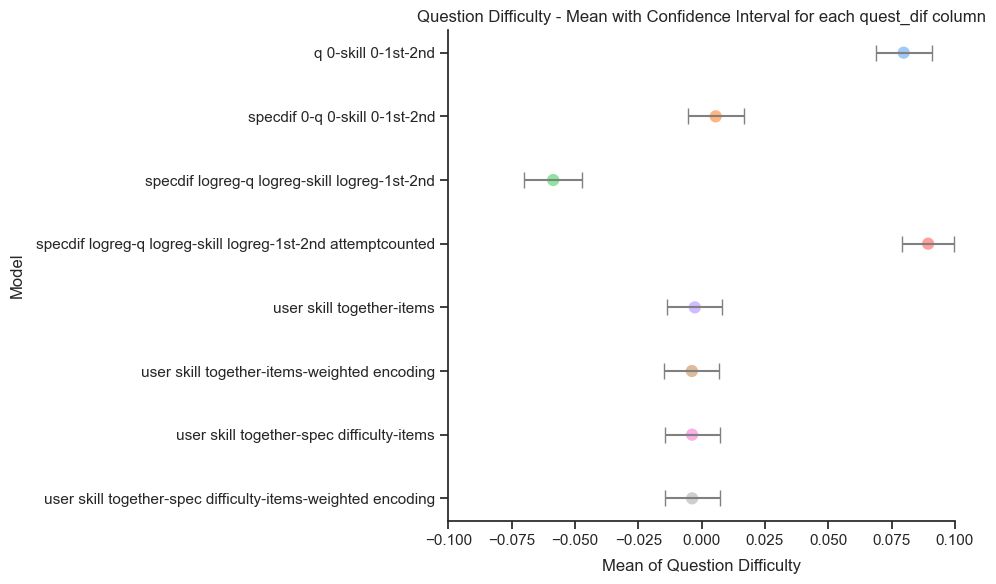

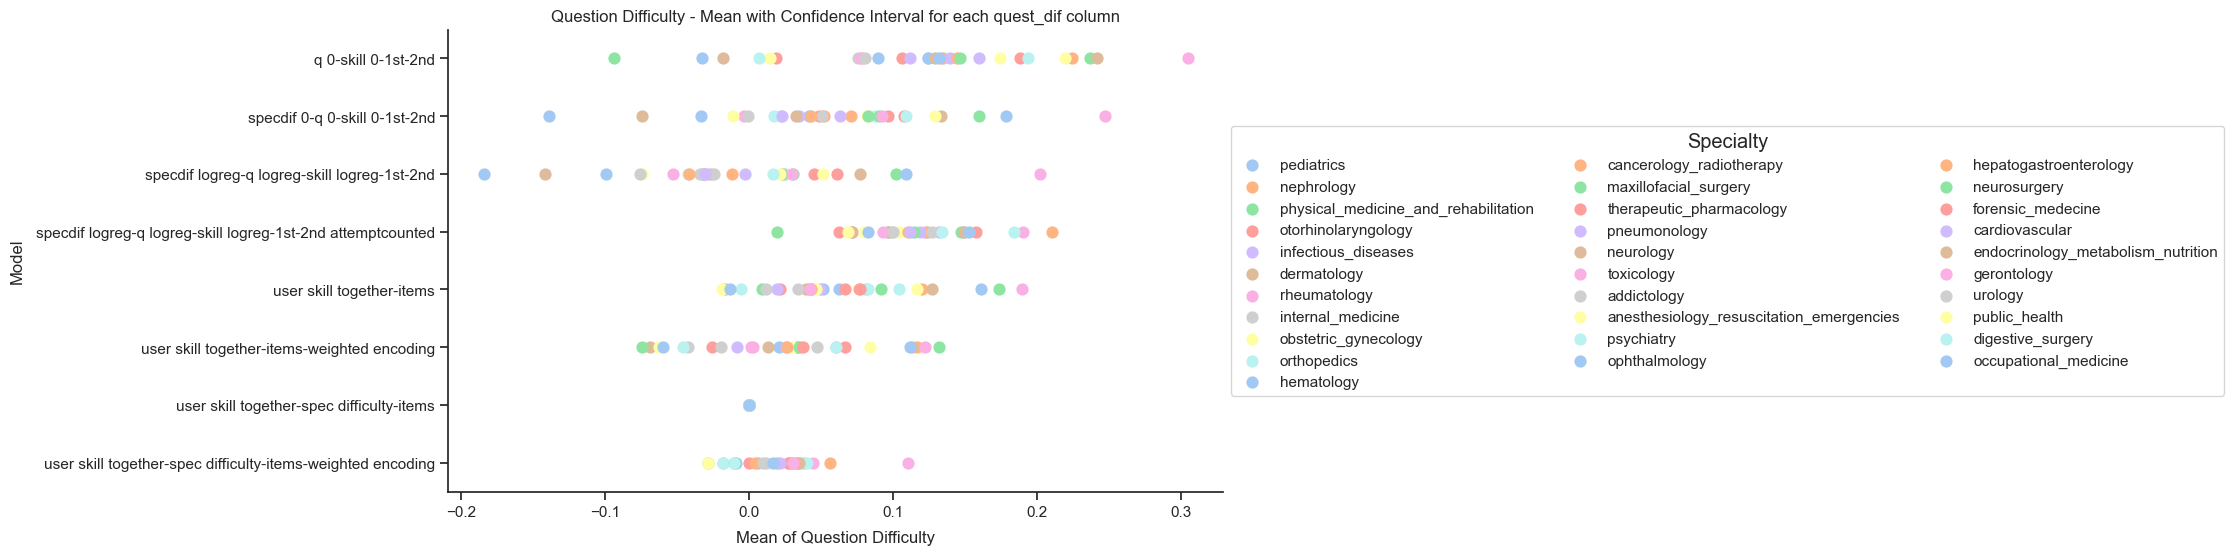

In [32]:
# Convert the 'kc_id' column from lists to tuples
question_difficulty_elo['kc_id'] = question_difficulty_elo['kc_id'].apply(tuple)
question_difficulty_logreg['kc_id'] = question_difficulty_logreg['kc_id'].apply(tuple)

all_question_difficulty= pd.merge(question_difficulty_elo, question_difficulty_logreg, on=['item_id', 'kc_id','count'], how='inner')


# 1- Question Difficutly
# from question_difficulty_logreg remove rows with count<attempt_threshold_question
all_question_difficulty = all_question_difficulty[all_question_difficulty['count']>=attempt_threshold_question]
# open a df to save the results
question_difficulty_elo_results = pd.DataFrame(columns=['model','mean','confidence_interval'])
# for each columns start with quest_dif find mean

# For each column starting with quest_dif, find mean and confidence interval
for col in all_question_difficulty.columns:
    if col.startswith('quest_dif'):
        # Calculate mean 
        mean = all_question_difficulty[col].mean()
        # Calculate confidence interval
        confidence_interval = all_question_difficulty[col].sem() * 1.96
        # Extract the model name without the prefix 'quest_dif' and remove underscores
        model_name = col[len('quest_dif_'):].replace('_', ' ')
        # Save results to question_difficulty_logreg_results
        question_difficulty_elo_results = question_difficulty_elo_results.append(
            {'model': model_name, 'mean': mean, 'confidence_interval': confidence_interval},
            ignore_index=True
        )
# Plot the results using a dot plot with error bars and caps
plt.figure(figsize=(10, 6))
sns.set(style="ticks")  # Setting style to 'ticks' to remove grid lines
palette = sns.color_palette("pastel")  # Define a color palette
sns.pointplot(x='mean', y='model', data=question_difficulty_elo_results, palette=palette, ci='sd', capsize=0.5,
              errwidth=1.5, markers='o', linestyles='', markersize=20)  # Increase the dot size
plt.errorbar(x=question_difficulty_elo_results['mean'], y=question_difficulty_elo_results['model'],
             xerr=question_difficulty_elo_results['confidence_interval'], fmt='none', ecolor='gray', capsize=6)  # Adjust error line length

# Set the x-axis limits from -0.1 to 0.1
plt.xlim(-0.1, 0.1)
# Custom tick locations for the y-axis to decrease distance between ticks
y_ticks = plt.yticks()[0]
plt.xlabel('Mean of Question Difficulty')
plt.ylabel('Model')
plt.title('Question Difficulty - Mean with Confidence Interval for each quest_dif column')
# Remove the top and right spines
sns.despine(right=True, top=True)
plt.tight_layout()  # Adjust the layout for better visualization
# save to figure_folder
plt.savefig(figure_folder+'question_difficulty_elo_results.png',dpi=300)
plt.show()

# for seperate specialties
# For each column starting with quest_dif, find mean and confidence interval
question_difficulty_elo_results_seperate = pd.DataFrame(columns=['model','mean','confidence_interval','specialty'])



all_spec_seperated_question_difficulty= pd.merge(spec_seperated_question_difficulty_elo, spec_seperated_question_difficulty_logreg, on=['item_id', 'kc_id','count'], how='inner')
unique_spec=all_spec_seperated_question_difficulty['kc_id'].unique()
# For each column starting with quest_dif, find mean and confidence interval
# for each unique specialty
for specialty in unique_spec:
    for col in all_spec_seperated_question_difficulty.columns:
        if col.startswith('quest_dif'):
            # Calculate mean 
            mean = all_spec_seperated_question_difficulty[all_spec_seperated_question_difficulty['kc_id']==specialty][col].mean()
            # Calculate confidence interval
            confidence_interval = all_spec_seperated_question_difficulty[all_spec_seperated_question_difficulty['kc_id']==specialty][col].sem() * 1.96
            # Extract the model name without the prefix 'quest_dif' and remove underscores
            model_name = col[len('quest_dif_'):].replace('_', ' ')
            # Save results to question_difficulty_logreg_results
            question_difficulty_elo_results_seperate = question_difficulty_elo_results_seperate.append(
                {'model': model_name, 'mean': mean, 'confidence_interval': confidence_interval,'specialty':specialty},
                ignore_index=True
            )
            
# Plot the results using a dot plot with error bars and caps for each specialty
plt.figure(figsize=(10, 6))
sns.set(style="ticks")
palette = sns.color_palette("pastel")

sns.pointplot(x='mean', y='model', data=question_difficulty_elo_results_seperate, hue='specialty', palette=palette, ci='sd', capsize=0.5,
              errwidth=1.5, markers='o', linestyles='', markersize=20)

#plt.errorbar(x=question_difficulty_logreg_results_seperate['mean'], y=question_difficulty_logreg_results_seperate['model'],
#             xerr=question_difficulty_logreg_results_seperate['confidence_interval'], fmt='none', ecolor='gray', capsize=6)

plt.xlabel('Mean of Question Difficulty')
plt.ylabel('Model')
plt.title('Question Difficulty - Mean with Confidence Interval for each quest_dif column')

sns.despine(right=True, top=True)

# Set the x-axis limits from -0.1 to 0.1
#plt.xlim(-0.1, 0.1)

# Custom tick locations for the y-axis to decrease distance between ticks
y_ticks = plt.yticks()[0]

# Move the legend outside and make it horizontal
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Specialty', ncol=3, title_fontsize='large')

plt.tight_layout()
plt.savefig(figure_folder+'question_difficulty_elo_results_seperatespec.png',dpi=300)
plt.show()

#### Student Ability All

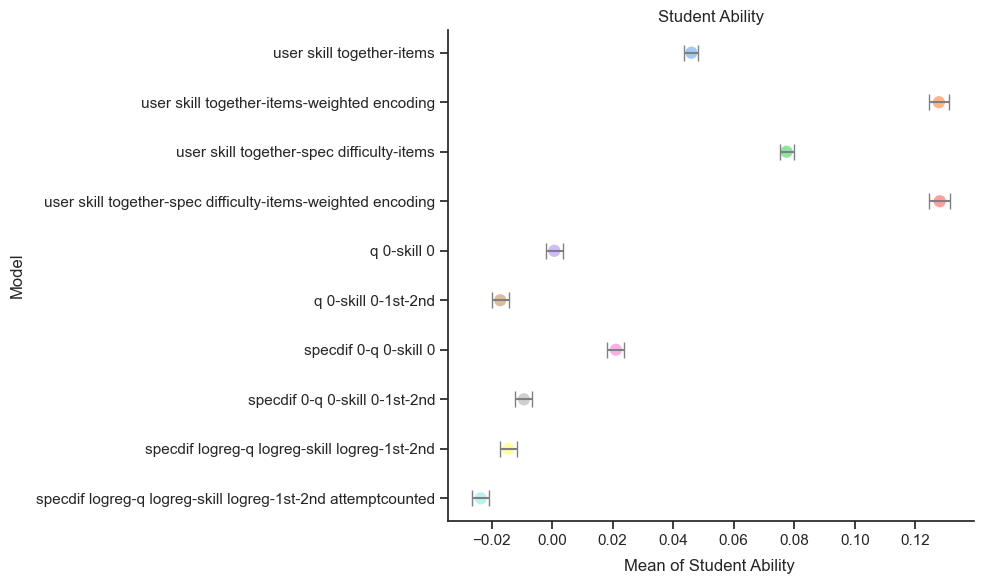

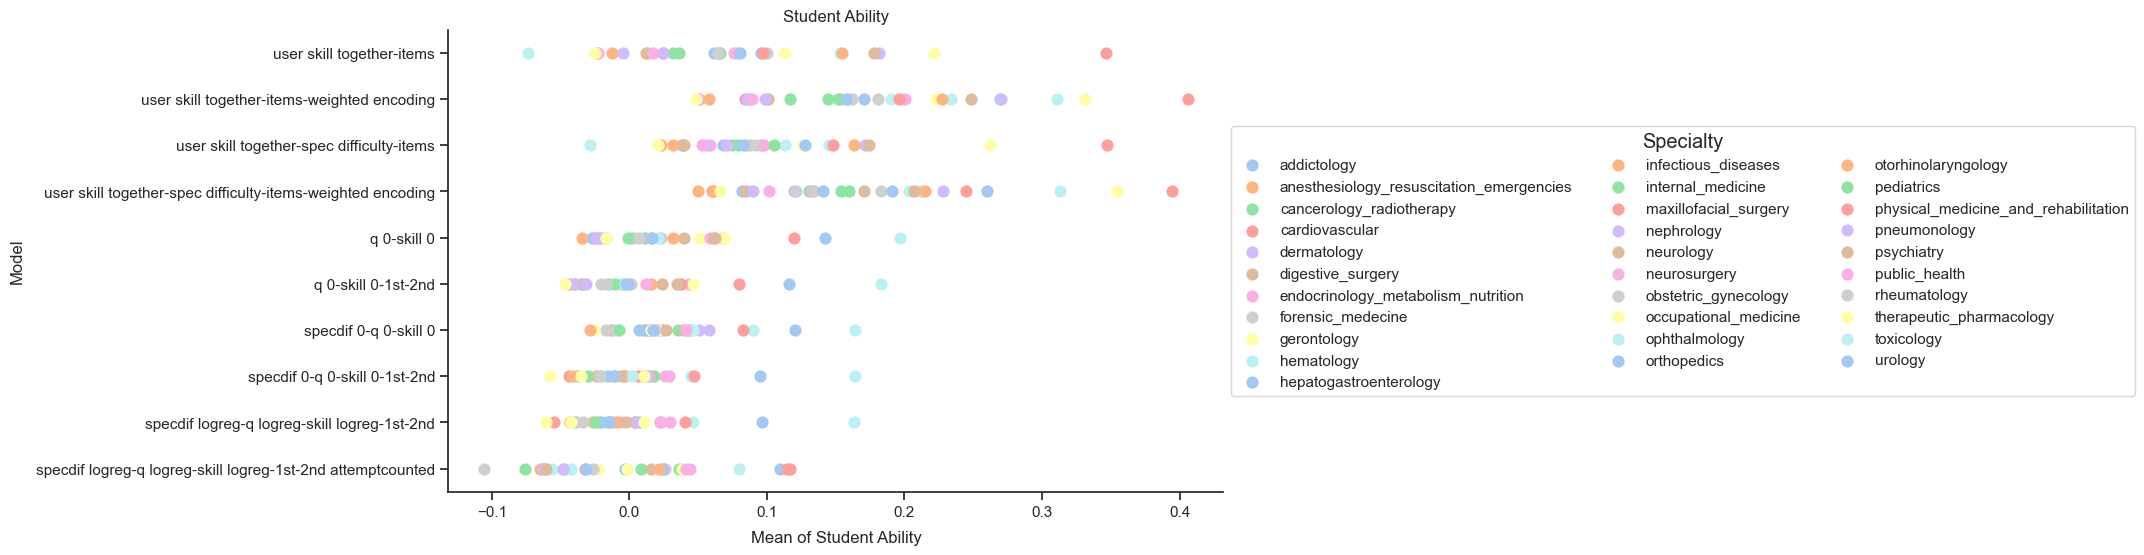

In [53]:
# merge student_ability_logreg and student_ability_elo based on user_id and kc_id columns with all the matching rows
all_student_ability = pd.merge(student_ability_logreg, student_ability_elo, on=['user_id', 'kc_id','attempt_student'], how='inner')


# Student Ability
#  from student_ability_logreg remove rows with count<attempt_threshold_student
all_student_ability=all_student_ability[all_student_ability['attempt_student']>=attempt_threshold_student]

# open a df to store the results
student_ability_elo_results=pd.DataFrame(columns=['model','mean','confidence_interval'])


# For each column starting with quest_dif, find mean and confidence interval
for col in all_student_ability.columns:
    if col.startswith('ability'):
        # Calculate mean 
        mean = all_student_ability[col].mean()
        # Calculate confidence interval
        confidence_interval = all_student_ability[col].sem() * 1.96
        # Extract the model name without the prefix 'quest_dif' and remove underscores
        model_name = col[len('ability_'):].replace('_', ' ')
        # Save results to question_difficulty_logreg_results
        student_ability_elo_results = student_ability_elo_results.append(
            {'model': model_name, 'mean': mean, 'confidence_interval': confidence_interval},
            ignore_index=True
        )
        

# Plot the results using a dot plot with error bars and caps
plt.figure(figsize=(10, 6))
sns.set(style="ticks")  # Setting style to 'ticks' to remove grid lines
palette = sns.color_palette("pastel")  # Define a color palette
sns.pointplot(x='mean', y='model', data=student_ability_elo_results, palette=palette, ci='sd', capsize=0.5,
              errwidth=1.5, markers='o', linestyles='', markersize=20)  # Increase the dot size
plt.errorbar(x=student_ability_elo_results['mean'], y=student_ability_elo_results['model'],
             xerr=student_ability_elo_results['confidence_interval'], fmt='none', ecolor='gray', capsize=6)  # Adjust error line length

# Set the x-axis limits from -0.1 to 0.1
#plt.xlim(-0.1, 0.1)
# Custom tick locations for the y-axis to decrease distance between ticks
y_ticks = plt.yticks()[0]
plt.xlabel('Mean of Student Ability ')
plt.ylabel('Model')
plt.title('Student Ability')
# Remove the top and right spines
sns.despine(right=True, top=True)
plt.tight_layout()  # Adjust the layout for better visualization
# save to figure_folder
plt.savefig(figure_folder+'student_ability_elo.png',dpi=300)
plt.show()


# for seperate specialties
# For each column starting with quest_dif, find mean and confidence interval
student_ability_elo_results_seperate = pd.DataFrame(columns=['model','mean','confidence_interval','specialty'])

unique_spec=all_student_ability['kc_id'].unique()
# For each column starting with quest_dif, find mean and confidence interval
# for each unique specialty
for specialty in unique_spec:
    for col in all_student_ability.columns:
        if col.startswith('ability'):
            # Calculate mean 
            mean = all_student_ability[all_student_ability['kc_id']==specialty][col].mean()
            # Calculate confidence interval
            confidence_interval = all_student_ability[all_student_ability['kc_id']==specialty][col].sem() * 1.96
            # Extract the model name without the prefix 'quest_dif' and remove underscores
            model_name = col[len('ability_'):].replace('_', ' ')
            # Save results to question_difficulty_logreg_results
            student_ability_elo_results_seperate = student_ability_elo_results_seperate.append(
                {'model': model_name, 'mean': mean, 'confidence_interval': confidence_interval,'specialty':specialty},
                ignore_index=True
            )
            
            

    
            
# Plot the results using a dot plot with error bars and caps for each specialty
plt.figure(figsize=(10, 6))
sns.set(style="ticks")
palette = sns.color_palette("pastel")

sns.pointplot(x='mean', y='model', data=student_ability_elo_results_seperate, hue='specialty', palette=palette, ci='sd', capsize=0.5,
              errwidth=1.5, markers='o', linestyles='', markersize=20)

#plt.errorbar(x=question_difficulty_logreg_results_seperate['mean'], y=question_difficulty_logreg_results_seperate['model'],
#             xerr=question_difficulty_logreg_results_seperate['confidence_interval'], fmt='none', ecolor='gray', capsize=6)

plt.xlabel('Mean of Student Ability')
plt.ylabel('Model')
plt.title('Student Ability')

sns.despine(right=True, top=True)

# Set the x-axis limits from -0.1 to 0.1
#plt.xlim(-0.1, 0.1)

# Custom tick locations for the y-axis to decrease distance between ticks
y_ticks = plt.yticks()[0]

# Move the legend outside and make it horizontal
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Specialty', ncol=3, title_fontsize='large')
plt.tight_layout()
plt.savefig(figure_folder+'student_ability_elo_seperatespec.png',dpi=300)
plt.show()

## COMPARISON ELO & LogReg

### Proportion of question and student in the previous year data

In [33]:

prev_year_old_new_item_ids = pd.read_csv(main_path + folder + logreg_education_year + '/processed/' + 'old_new_item_ids.csv')
# unique question in prev_year_new_item_ids
unique_item_id_prev_year_new_item_ids = prev_year_old_new_item_ids['question'].unique()

# read old_new_item_ids.css
this_year_old_new_item_ids = pd.read_csv(main_path + folder + education_year + '/processed/' + 'old_new_item_ids.csv')
# unique question in this_year_old_new_item_ids
unique_item_id_this_year_old_new_item_ids = this_year_old_new_item_ids['question'].unique()

# overlap between unique_item_id_prev_year_new_item_ids and unique_item_id_this_year_old_new_item_ids
overlap_item_id = np.intersect1d(unique_item_id_prev_year_new_item_ids, unique_item_id_this_year_old_new_item_ids)
print('n unique_item_id 2019-2020 data: ', unique_item_id_prev_year_new_item_ids.shape)
print('n unique_item_id 2020-2021 data: ', unique_item_id_this_year_old_new_item_ids.shape)
print('overlap_item_id: ', overlap_item_id.shape)

prev_year_old_new_user_ids = pd.read_csv(main_path + folder + logreg_education_year + '/processed/' + 'old_new_user_ids.csv')
# unique user in prev_year_old_new_user_ids
unique_user_id_prev_year_old_new_user_ids = prev_year_old_new_user_ids['student'].unique()

# read old_new_user_ids.css
this_year_old_new_user_ids = pd.read_csv(main_path + folder + education_year + '/processed/' + 'old_new_user_ids.csv')
# unique user in this_year_old_new_user_ids
unique_user_id_this_year_old_new_user_ids = this_year_old_new_user_ids['student'].unique()

# overlap between unique_user_id_prev_year_old_new_user_ids and unique_user_id_this_year_old_new_user_ids
overlap_user_id = np.intersect1d(unique_user_id_prev_year_old_new_user_ids, unique_user_id_this_year_old_new_user_ids)
print('n unique_user_id 2019-2020 data: ', unique_user_id_prev_year_old_new_user_ids.shape)
print('n unique_user_id 2020-2021 data: ', unique_user_id_this_year_old_new_user_ids.shape)
print('overlap_user_id: ', overlap_user_id.shape)




n unique_item_id 2019-2020 data:  (97647,)
n unique_item_id 2020-2021 data:  (74703,)
overlap_item_id:  (42481,)
n unique_user_id 2019-2020 data:  (24757,)
n unique_user_id 2020-2021 data:  (8590,)
overlap_user_id:  (270,)


## comparison of estimates of 2019 and 2020

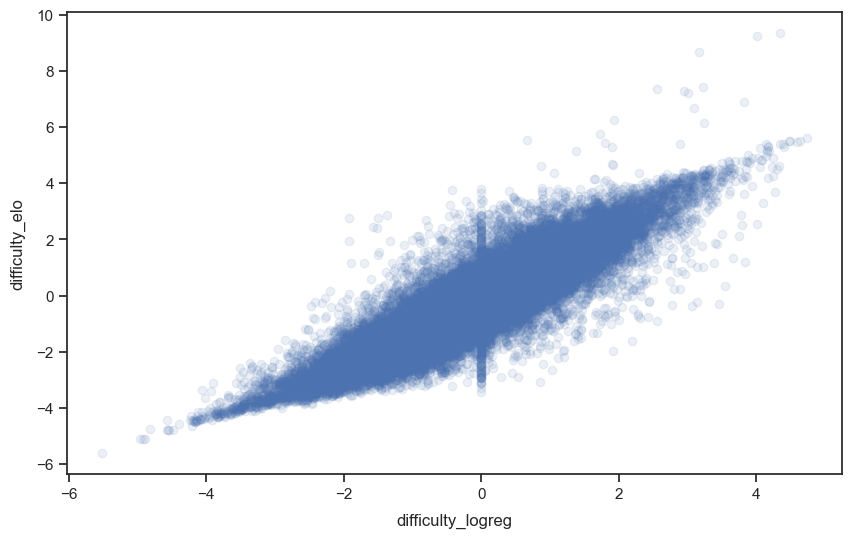

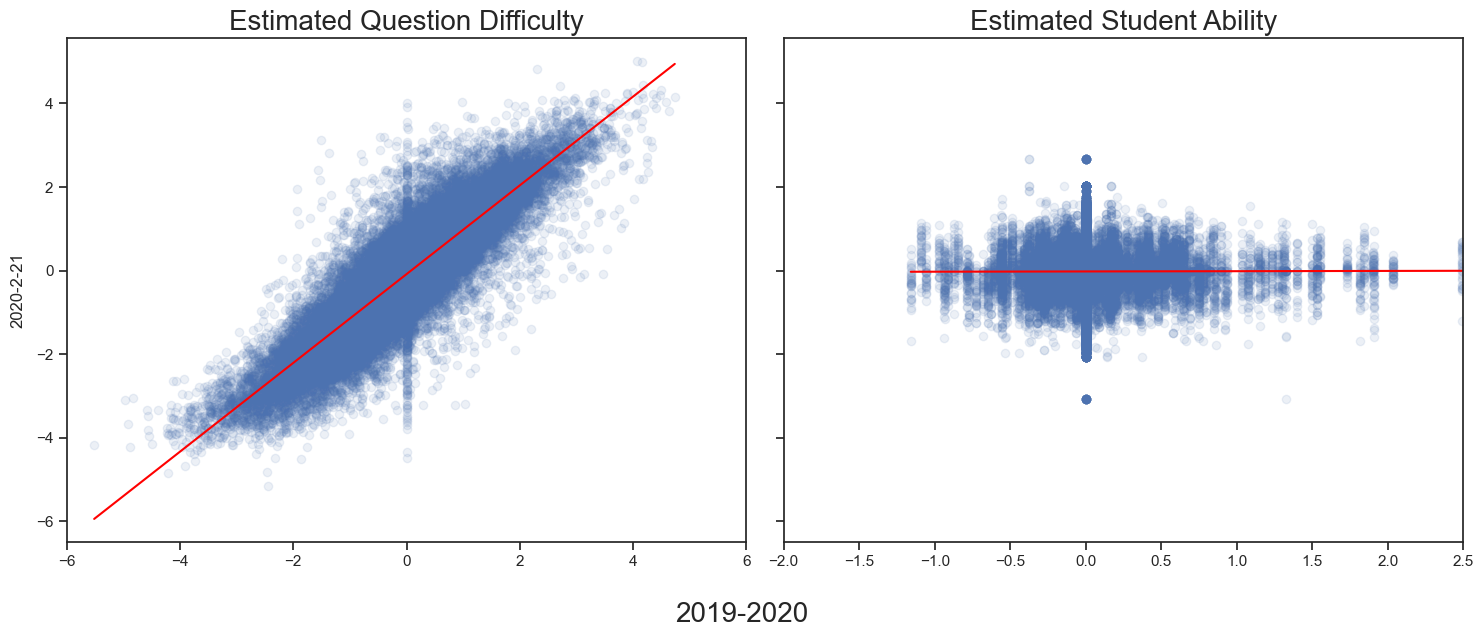

In [36]:
# old_data_logreg
prev_year_question_difficulty = pd.read_csv(main_path + folder + logreg_education_year + '/result_logreg_user_skill_together-spec_difficulty-items-weighted_encoding/' + 'question_difficulty.csv')
prev_year_old_new_item_ids = pd.read_csv(main_path + folder + logreg_education_year + '/processed/' + 'old_new_item_ids.csv')
# merge them based on item_id
prev_year_question_difficulty = pd.merge(prev_year_question_difficulty, prev_year_old_new_item_ids, on='item_id', how='left')
# remove item_id
prev_year_question_difficulty = prev_year_question_difficulty.drop(columns=['item_id'])
# only the questions==overlap_user_id
prev_year_question_difficulty = prev_year_question_difficulty[prev_year_question_difficulty['question'].isin(overlap_item_id)]
# multiply the difficulty_irt by -1
prev_year_question_difficulty['difficulty_irt'] = prev_year_question_difficulty['difficulty_irt'] * -1


# new_data_elo
new_year_question_difficulty = pd.read_csv(main_path + folder + education_year  + '/result_elo_specdif_logreg-q_logreg-skill_logreg-1st-2nd/' + '/training_output/' 'question_difficulty.csv')
# name the columns as item_id and difficulty_elo
new_year_question_difficulty.columns = ['item_id', 'difficulty_elo']
new_year_old_new_item_ids = pd.read_csv(main_path + folder + education_year + '/processed/' + 'old_new_item_ids.csv')
# merge them based on item_id
new_year_question_difficulty = pd.merge(new_year_question_difficulty, new_year_old_new_item_ids, on='item_id', how='left')
# remove item_id
new_year_question_difficulty = new_year_question_difficulty.drop(columns=['item_id'])
# only the questions==overlap_user_id
new_year_question_difficulty = new_year_question_difficulty[new_year_question_difficulty['question'].isin(overlap_item_id)]

# merge them based on question 
question_difficulty = pd.merge(new_year_question_difficulty,prev_year_question_difficulty, on='question', how='left')

# plot the scatter plot by difficulty_irt and difficulty_elo
plt.scatter(question_difficulty['difficulty_irt'], question_difficulty['difficulty_elo'],alpha=0.1)
plt.xlabel('difficulty_logreg')
plt.ylabel('difficulty_elo')
# make dots transparent
plt.show()


# new_data_logreg
new_year_question_difficulty = pd.read_csv(main_path + folder + education_year  + '/result_logreg_user_skill_together-spec_difficulty-items-weighted_encoding/' + 'question_difficulty.csv')
# name the columns as item_id and difficulty_elo
new_year_question_difficulty.columns = ['item_id', 'difficulty_2020-2021']
new_year_old_new_item_ids = pd.read_csv(main_path + folder + education_year + '/processed/' + 'old_new_item_ids.csv')
# merge them based on item_id
new_year_question_difficulty = pd.merge(new_year_question_difficulty, new_year_old_new_item_ids, on='item_id', how='left')
# remove item_id
new_year_question_difficulty = new_year_question_difficulty.drop(columns=['item_id'])
# only the questions==overlap_user_id
new_year_question_difficulty = new_year_question_difficulty[new_year_question_difficulty['question'].isin(overlap_item_id)]
new_year_question_difficulty['difficulty_2020-2021'] = new_year_question_difficulty['difficulty_2020-2021'] * -1


# merge them based on question, have only the questions that are in both years
question_difficulty = pd.merge(new_year_question_difficulty,prev_year_question_difficulty, on='question', how='left')



# ability
# old_data_logreg
prev_year_ability= pd.read_csv(main_path + folder + logreg_education_year + '/result_logreg_user_skill_together-spec_difficulty-items-weighted_encoding/' + 'learner_competency.csv')
prev_year_ability=pd.melt(prev_year_ability,id_vars=['user_id'],var_name='specialty', value_name= 'ability_2019-2020')
prev_year_old_new_user_ids = pd.read_csv(main_path + folder + logreg_education_year + '/processed/' + 'old_new_user_ids.csv')
# merge them based on item_id
prev_year_ability = pd.merge(prev_year_ability, prev_year_old_new_user_ids, on='user_id', how='left')
# remove item_id
prev_year_ability = prev_year_ability.drop(columns=['user_id'])
# only the questions==overlap_user_id
prev_year_ability = prev_year_ability[prev_year_ability['student'].isin(overlap_user_id)]

# new_data_logreg
new_year_ability = pd.read_csv(main_path + folder + education_year  + '/result_logreg_user_skill_together-spec_difficulty-items-weighted_encoding/' + 'learner_competency.csv')
# name the columns as item_id and difficulty_elo
new_year_ability=pd.melt(new_year_ability,id_vars=['user_id'],var_name='specialty', value_name= 'ability_2020-2021')
new_year_old_new_user_ids = pd.read_csv(main_path + folder + education_year + '/processed/' + 'old_new_user_ids.csv')
# merge them based on item_id
new_year_ability = pd.merge(new_year_ability, new_year_old_new_user_ids, on='user_id', how='left')
# remove item_id
new_year_ability = new_year_ability.drop(columns=['user_id'])
# only the questions==overlap_user_id
new_year_ability = new_year_ability[new_year_ability['student'].isin(overlap_user_id)]


# merge them based on question, have only the questions that are in both years
student_ability = pd.merge(new_year_ability,prev_year_ability, on='student', how='left')


import matplotlib.pyplot as plt
import numpy as np

# Create a figure and axes for subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 7), sharey=True)

# Scatter plot for Estimated Question Difficulty
axs[0].scatter(question_difficulty['difficulty_irt'], question_difficulty['difficulty_2020-2021'], alpha=0.1)
axs[0].set_xlabel('')
axs[0].set_ylabel('2020-2-21')
axs[0].set_title('Estimated Question Difficulty')
# title font size
axs[0].title.set_size(20)
axs[0].plot(np.unique(question_difficulty['difficulty_irt']), np.poly1d(np.polyfit(question_difficulty['difficulty_irt'], question_difficulty['difficulty_2020-2021'], 1))(np.unique(question_difficulty['difficulty_irt'])), color='red')
axs[0].set_xlim([-6, 6])

# Scatter plot for Estimated Student Ability
axs[1].scatter(student_ability['ability_2019-2020'], student_ability['ability_2020-2021'], alpha=0.1)
axs[1].set_xlabel('')
axs[1].set_ylabel('')
axs[1].set_title('Estimated Student Ability')
# title font size
axs[1].title.set_size(20)
axs[1].plot(np.unique(student_ability['ability_2019-2020']), np.poly1d(np.polyfit(student_ability['ability_2019-2020'], student_ability['ability_2020-2021'], 1))(np.unique(student_ability['ability_2019-2020'])), color='red')
axs[1].set_xlim([-2, 2.5])

# Create a centered x-axis label
fig.text(0.5, 0.1, '2019-2020', ha='center', fontsize=20)

# Adjust layout to prevent clipping of x-axis label
plt.tight_layout(rect=[0, 0.15, 1, 1])

# Save the figure
plt.savefig(figure_folder + 'comparison_old_new_logreg.png', dpi=300, bbox_inches='tight')

# Show the plots
plt.show()





## compare the best elo and the best logreg by scatter plot



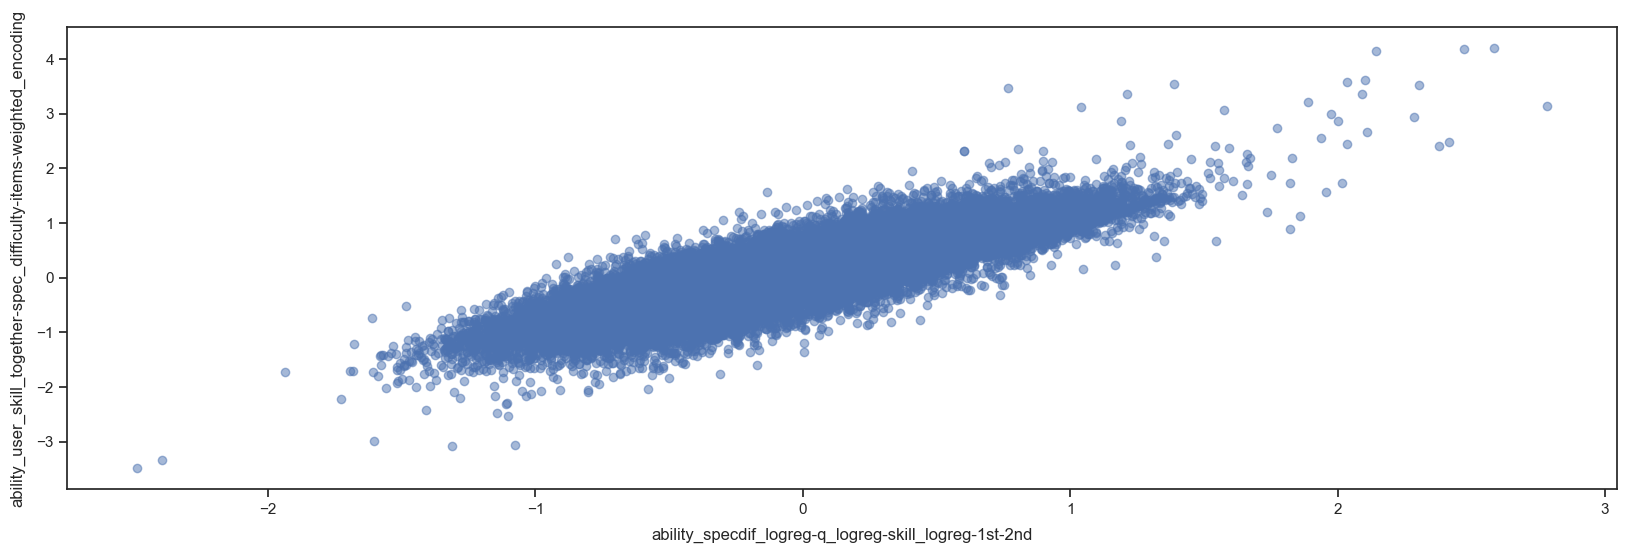

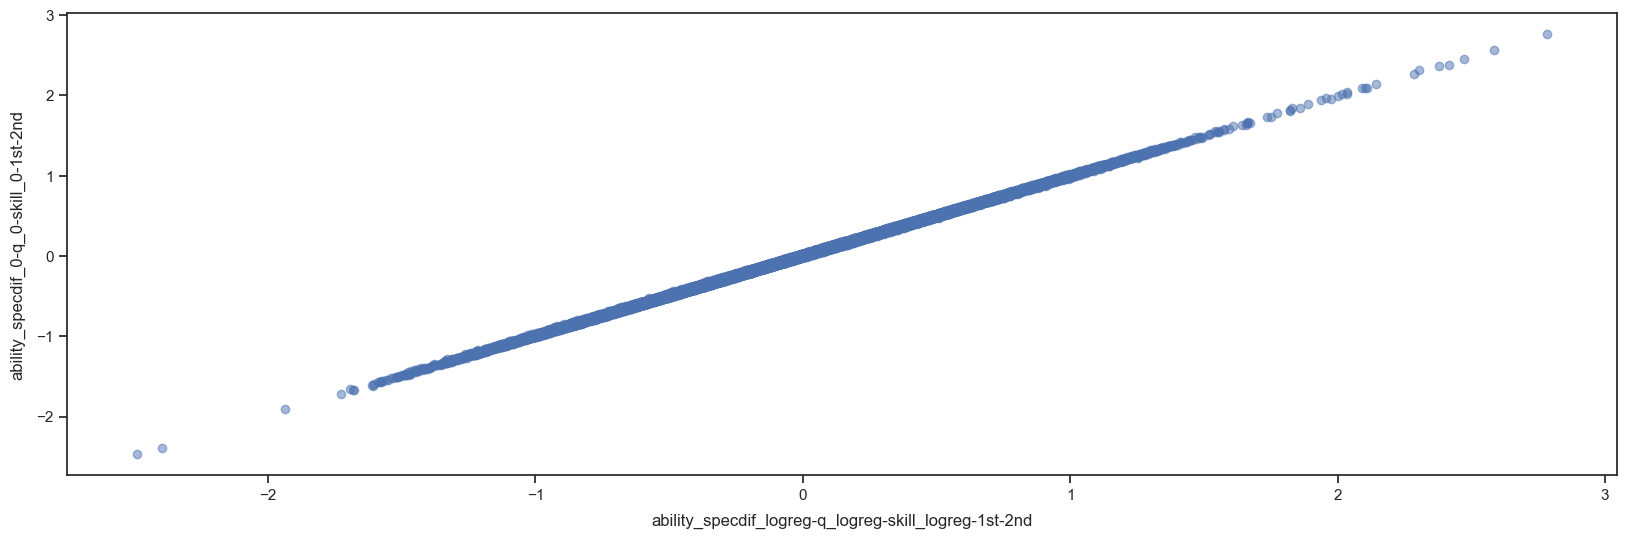

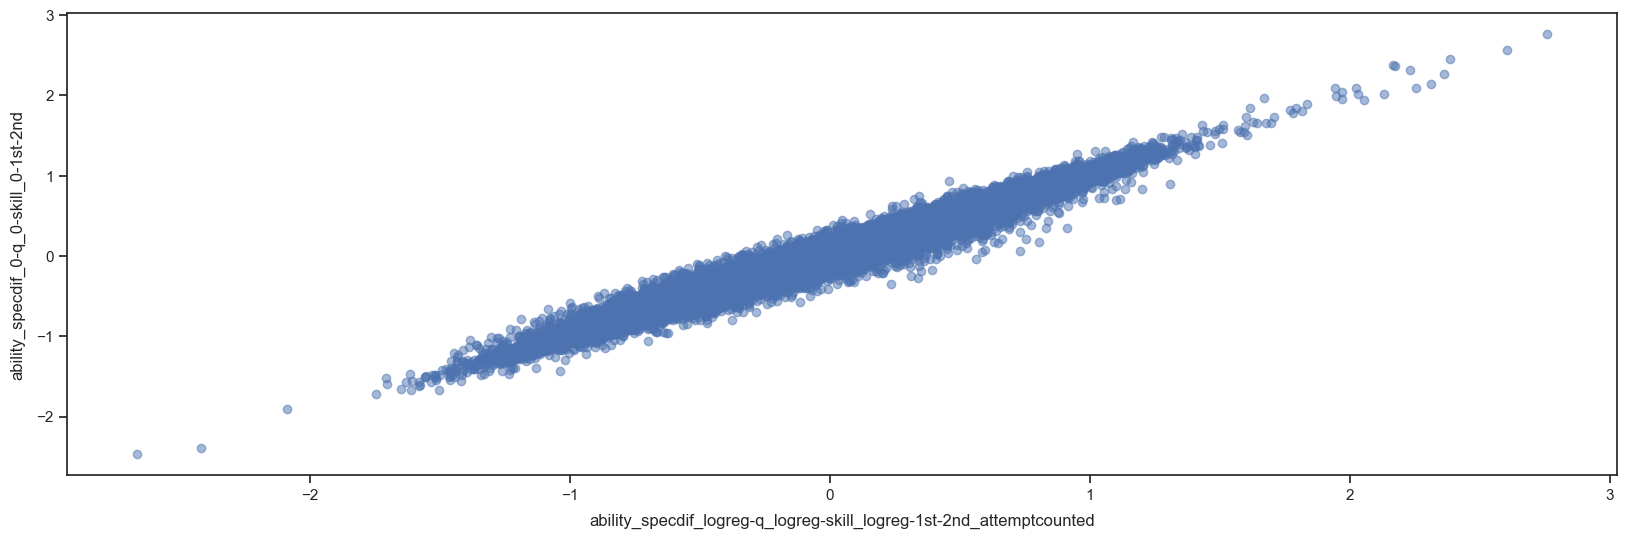

In [54]:


# plot scatter plot of the ability_specdif_logreg-q_logreg-skill_logreg-1st-2nd and ability_user_skill_together-spec_difficulty-items-weighted_encoding
plt.scatter(all_student_ability['ability_specdif_logreg-q_logreg-skill_logreg-1st-2nd'], all_student_ability['ability_user_skill_together-spec_difficulty-items-weighted_encoding'], alpha=0.5)
plt.xlabel('ability_specdif_logreg-q_logreg-skill_logreg-1st-2nd')
plt.ylabel('ability_user_skill_together-spec_difficulty-items-weighted_encoding')
plt.show()

# plot scatter plot of the ability_specdif_logreg-q_logreg-skill_logreg-1st-2nd and ability_specdif_0-q_0-skill_0-1st-2nd
plt.scatter(all_student_ability['ability_specdif_logreg-q_logreg-skill_logreg-1st-2nd'], all_student_ability['ability_specdif_0-q_0-skill_0-1st-2nd'],alpha=0.5)
plt.xlabel('ability_specdif_logreg-q_logreg-skill_logreg-1st-2nd')
plt.ylabel('ability_specdif_0-q_0-skill_0-1st-2nd')
plt.show()

# plot scatter plot of the ability_specdif_logreg-q_logreg-skill_logreg-1st-2nd and ability_specdif_0-q_0-skill_0-1st-2nd
plt.scatter(all_student_ability['ability_specdif_logreg-q_logreg-skill_logreg-1st-2nd_attemptcounted'], all_student_ability['ability_specdif_0-q_0-skill_0-1st-2nd'],alpha=0.5)
plt.xlabel('ability_specdif_logreg-q_logreg-skill_logreg-1st-2nd_attemptcounted')
plt.ylabel('ability_specdif_0-q_0-skill_0-1st-2nd')
plt.show()

## Evolution Plots

###### Select individual question and student to have the evolution plots

In [18]:

n_select= 1
question_difficulty_logreg = question_difficulty_logreg[question_difficulty_logreg['count']>=700]
student_ability_logreg=student_ability_logreg[student_ability_logreg['attempt_student']>=attempt_threshold_student]

only_from_predefined_list=True

if only_from_predefined_list:
    # question
    # read attempt_counter_question.csv from main_path + folder + logreg_education_year + '/processed/'
    logreg_attempt_counter_question = pd.read_csv(main_path + folder + logreg_education_year + '/processed/' + 'attempt_counter_question.csv')
    # read old_new_item_ids.csv
    logreg_old_new_item_ids = pd.read_csv(main_path + folder + logreg_education_year + '/processed/' + 'old_new_item_ids.csv')
    # merge logreg_attempt_counter_question and logreg_old_new_item_ids  on item_id
    logreg_attempt_counter_question = pd.merge(logreg_attempt_counter_question, logreg_old_new_item_ids, on='item_id')
    # remove item_id column
    logreg_attempt_counter_question = logreg_attempt_counter_question.drop(['item_id'], axis=1)
    # read old_new_item_ids.css
    this_year_old_new_item_ids = pd.read_csv(main_path + folder + education_year + '/processed/' + 'old_new_item_ids.csv')
    # merge logreg_attempt_counter_question and this_year_old_new_user_ids on question
    logreg_attempt_counter_question = pd.merge(logreg_attempt_counter_question, this_year_old_new_item_ids, on='question', how='left')
    # remove question column
    logreg_attempt_counter_question = logreg_attempt_counter_question.drop(['question'], axis=1)

    # get unique item_id
    unique_item_id = logreg_attempt_counter_question['item_id'].unique()
    
    #user
    logreg_attempt_counter_user = pd.read_csv(main_path + folder + logreg_education_year + '/processed/' + 'attempt_counter_student_spec.csv')
    # read old_new_user_ids.csv
    logreg_old_new_user_ids = pd.read_csv(main_path + folder + logreg_education_year + '/processed/' + 'old_new_user_ids.csv')
    # merge logreg_attempt_counter_user and logreg_old_new_user_ids  on user_id
    logreg_attempt_counter_user = pd.merge(logreg_attempt_counter_user, logreg_old_new_user_ids, on='user_id')
    # remove user_id column
    logreg_attempt_counter_user = logreg_attempt_counter_user.drop(['user_id'], axis=1)
    # read old_new_user_ids.css
    this_year_old_new_user_ids = pd.read_csv(main_path + folder + education_year + '/processed/' + 'old_new_user_ids.csv')
    # merge logreg_attempt_counter_user and this_year_old_new_user_ids on user
    logreg_attempt_counter_user = pd.merge(logreg_attempt_counter_user, this_year_old_new_user_ids, on='student', how='left')
    # remove student column
    logreg_attempt_counter_user = logreg_attempt_counter_user.drop(['student'], axis=1)
    
    
    # get unique user_id
    unique_user_id = logreg_attempt_counter_user['user_id'].unique()
    
    # randomly choose n_select item_id from question_difficulty_logreg that are in unique_item_id
    question_difficulty_logreg_filtered = question_difficulty_logreg[question_difficulty_logreg['item_id'].isin(unique_item_id)].sample(n_select)    
    
    # filter the rows with selected_user_id from student_ability_logreg
    student_ability_logreg_filtered = student_ability_logreg[student_ability_logreg['user_id'].isin(unique_user_id)].sample(n_select)
    
else:
    
    # log reg
    # randomly choose n_select item_id from question_difficulty_logreg
    question_difficulty_logreg_filtered = question_difficulty_logreg.sample(n_select)
    
    unique_user_id = student_ability_logreg['user_id'].unique()
    
    # randomly choose n_select user_id from unique_user_id
    selected_user_id = np.random.choice(unique_user_id, n_select, replace=False)
    
    
    # filter the rows with selected_user_id from student_ability_logreg
    student_ability_logreg_filtered = student_ability_logreg.sample(n_select)
    
# get the unique item_id
questions_to_compare = question_difficulty_logreg_filtered['item_id'].unique()
# get the unique user_id
students_to_compare = student_ability_logreg_filtered['user_id'].unique()


##### Process Data !!!!!! if the first time comment the del in the first row

In [19]:
#del question_difficulty_updates_elo
# read the question_difficulty.csv files from all the folders that start with 'result_logreg' in the path and give the names as quest_dif_x where x is the resting name of the folder after resulty_logreg
path= main_path + '/' + folder + '/'+ education_year
# Get a list of all directories in the path that start with 'results_elo'
dirs = [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d)) and d.startswith('result_elo')]

# only the item_id and kc_id columns are needed
#question_difficulty_updates_elo = []
competency_updates_elo = []
model_names=[]

# Process each directory and read the 'question_difficulty.csv' file into a DataFrame with a custom name
for count, folder_name in enumerate(dirs):
    #custom_name = f'quest_dif_{folder_name[len(prefix):]}'  # Create a custom name for the DataFrame

    custom_name = folder_name[len("result_elo") + 1:]  # Get the part of the folder_name after 'result_logreg' by adding 1 to skip the underscore

    # Construct the full path to the csv file
    difficulty_updates_file_path = os.path.join(path+ '/' +folder_name+ '/training_output' + '/question_difficulty_updates.csv')
    competency_update_file_path = os.path.join(path+ '/' +folder_name+ '/training_output' +  '/student_ability_updates.csv')
    
    if '2nd' in folder_name:
        this_question_difficulty_updates = pd.read_csv(difficulty_updates_file_path)
        # filter questions= questions_to_compare
        this_question_difficulty_updates = this_question_difficulty_updates[this_question_difficulty_updates['question'].isin(questions_to_compare)]
        #add a new column model_name that count
        this_question_difficulty_updates['model_name'] = count
        # rename question as item_id
        this_question_difficulty_updates = this_question_difficulty_updates.rename(columns={'question': 'item_id'})
        # add an order column that is numbers from 0 to len(this_question_difficulty_updates)
        this_question_difficulty_updates['order'] = range(len(this_question_difficulty_updates))
        
        # if  question_difficulty_updates_elo not defined
        if 'question_difficulty_updates_elo' not in locals():
            question_difficulty_updates_elo = this_question_difficulty_updates
        else:
            # concat without column names
            question_difficulty_updates_elo = pd.concat([question_difficulty_updates_elo, this_question_difficulty_updates], ignore_index=True) 
        
    
    this_competency_updates = pd.read_csv(competency_update_file_path)
    # filter user_id= users_to_compare
    this_competency_updates = this_competency_updates[this_competency_updates['student'].isin(students_to_compare)]
    #add a new column model_name that count
    this_competency_updates['model_name'] = count
    # rename student as user_id
    this_competency_updates = this_competency_updates.rename(columns={'student': 'user_id'})
    # add an order column that is numbers from 0 to len(this_competency_updates)
    this_competency_updates['order'] = this_competency_updates.groupby('specialty').cumcount()
    # add to competency_updates_elo
    if count == 0:
        competency_updates_elo = this_competency_updates
        
    else:
        # concat without column names
        competency_updates_elo = pd.concat([competency_updates_elo, this_competency_updates], ignore_index=True)
    
    # have a df with custom_name and count
    model = pd.DataFrame({'model_name': [count], 'custom_name': [custom_name]})
    if count == 0:
        model_names = model
        
    else:
        # concat without column names
        model_names = pd.concat([model_names, model], ignore_index=True)
        


#### Question Difficulty Evolution

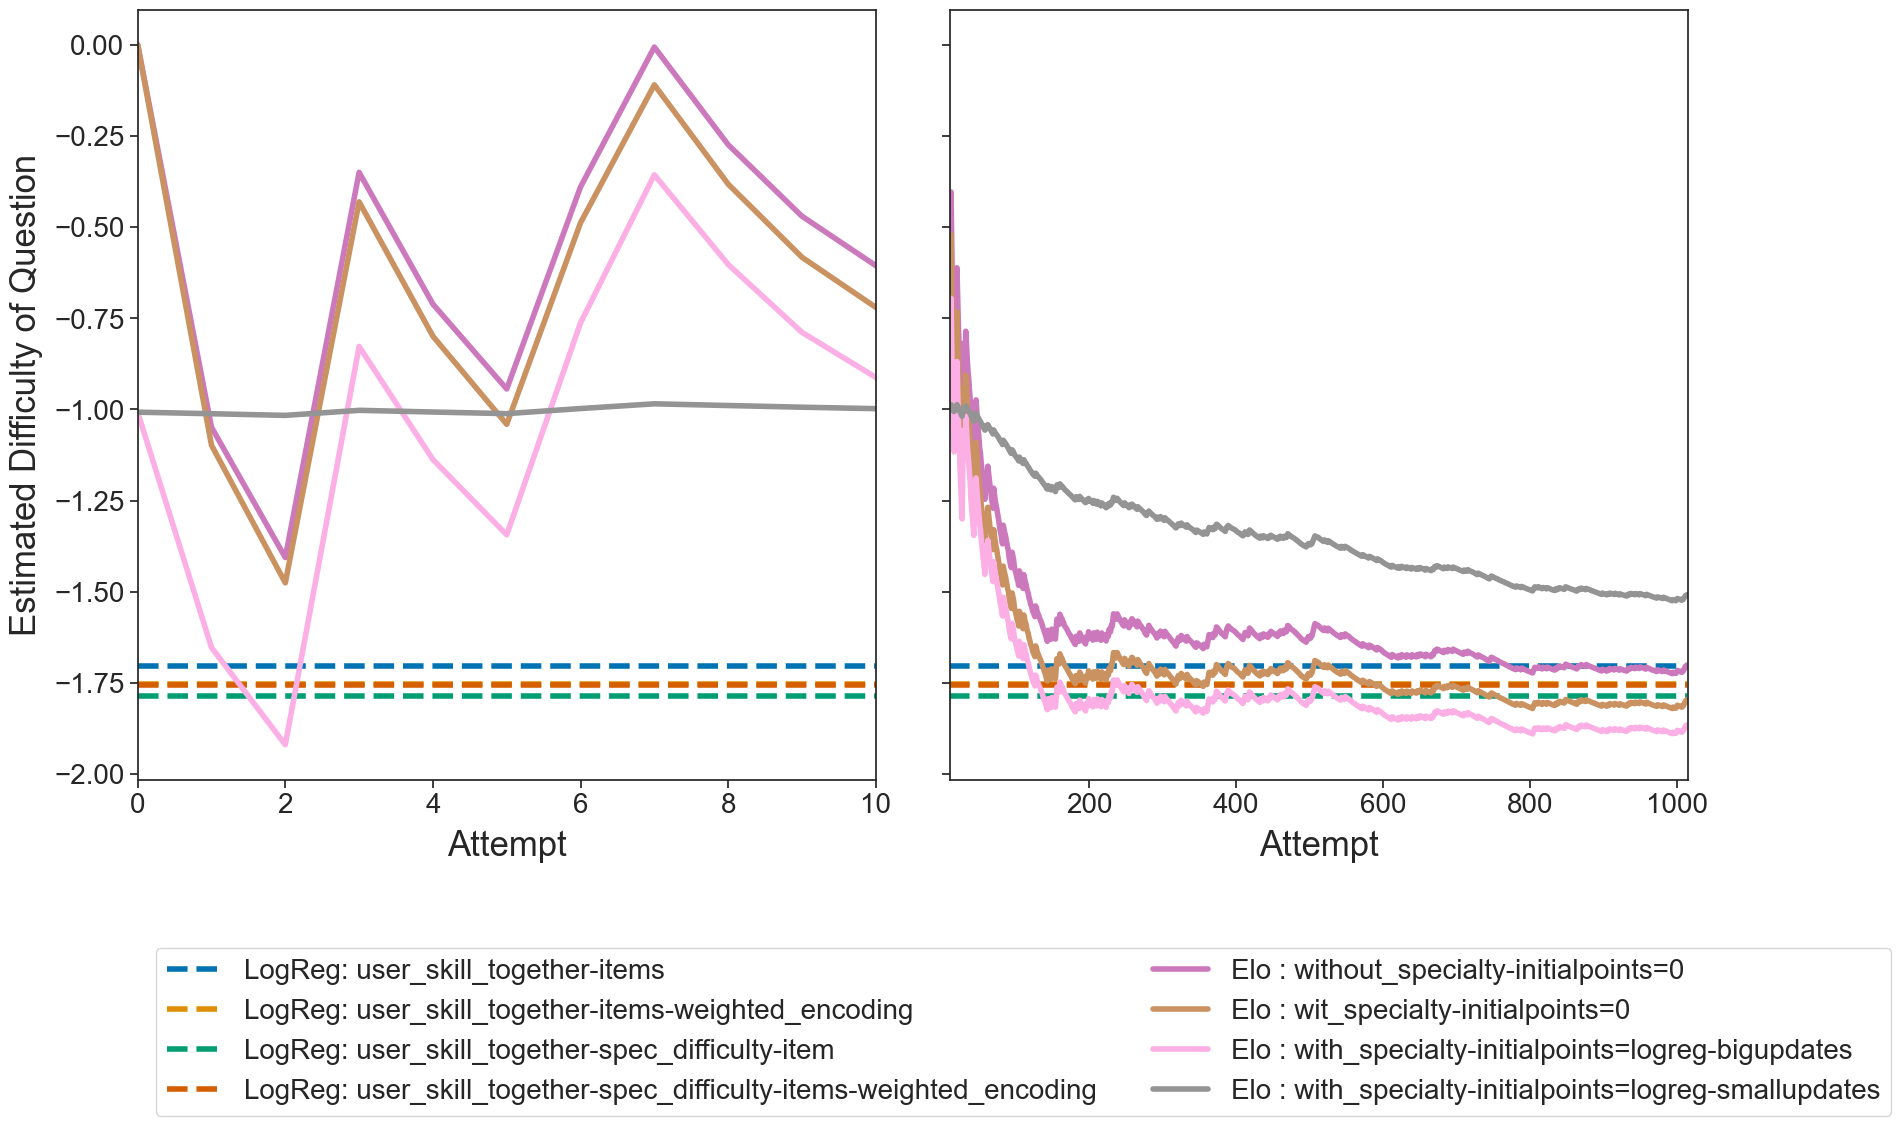

In [20]:
# merge question_difficulty_updates_elo and model_names on model_name
question_difficulty_updates_elo=pd.merge(question_difficulty_updates_elo,model_names,on='model_name',how='left')
# remove the model_name column
question_difficulty_updates_elo=question_difficulty_updates_elo.drop(columns=['model_name'])
# rename the custom_name column to model_name
question_difficulty_updates_elo=question_difficulty_updates_elo.rename(columns={'custom_name':'model_name'})
# merge question_difficulty_updates_elo and question_difficulty_logreg_filtered based on question_id

question_difficulty_logreg_filtered = question_difficulty_logreg_filtered.melt(id_vars=['item_id', 'kc_id','count'], var_name='model_name', value_name='difficulty')
question_difficulty_logreg_filtered = question_difficulty_logreg_filtered.loc[question_difficulty_logreg_filtered.index.repeat(question_difficulty_logreg_filtered['count'])].reset_index(drop=True)
# add order column that have numbers from 1 to length of question_difficulty_logreg_filtered
question_difficulty_logreg_filtered['order']=question_difficulty_logreg_filtered.groupby('model_name').cumcount()

# remove kc_id and count columns
question_difficulty_logreg_filtered=question_difficulty_logreg_filtered.drop(columns=['kc_id','count'])

# from question_difficulty_updates_elo remove unnamed: 0 column
question_difficulty_updates_elo=question_difficulty_updates_elo.drop(columns=['Unnamed: 0'])

# concat question_difficulty_logreg_filtered and question_difficulty_updates_elo
question_difficulty_updates_elo=pd.concat([question_difficulty_logreg_filtered,question_difficulty_updates_elo],ignore_index=True)

# change quest_dif_user_skill_together-items in model_name to quest_dif_user_skill_together
question_difficulty_updates_elo['model_name'] = question_difficulty_updates_elo['model_name'].replace('quest_dif_user_skill_together-items', 'LogReg: user_skill_together-items')
question_difficulty_updates_elo['model_name'] = question_difficulty_updates_elo['model_name'].replace('quest_dif_user_skill_together-items-weighted_encoding', 'LogReg: user_skill_together-items-weighted_encoding')
question_difficulty_updates_elo['model_name'] = question_difficulty_updates_elo['model_name'].replace('quest_dif_user_skill_together-spec_difficulty-items', 'LogReg: user_skill_together-spec_difficulty-item')
question_difficulty_updates_elo['model_name'] = question_difficulty_updates_elo['model_name'].replace('quest_dif_user_skill_together-spec_difficulty-items-weighted_encoding', 'LogReg: user_skill_together-spec_difficulty-items-weighted_encoding')
question_difficulty_updates_elo['model_name'] = question_difficulty_updates_elo['model_name'].replace('q_0-skill_0-1st-2nd', 'Elo : without_specialty-initialpoints=0')
question_difficulty_updates_elo['model_name'] = question_difficulty_updates_elo['model_name'].replace('specdif_0-q_0-skill_0-1st-2nd', 'Elo : wit_specialty-initialpoints=0')
question_difficulty_updates_elo['model_name'] = question_difficulty_updates_elo['model_name'].replace('specdif_logreg-q_logreg-skill_logreg-1st-2nd_attemptcounted', 'Elo : with_specialty-initialpoints=logreg-smallupdates')
question_difficulty_updates_elo['model_name'] = question_difficulty_updates_elo['model_name'].replace('specdif_logreg-q_logreg-skill_logreg-1st-2nd', 'Elo : with_specialty-initialpoints=logreg-bigupdates')

import matplotlib.pyplot as plt
import seaborn as sns

# Define a color palette for models
color_palette_for_models = sns.color_palette("colorblind", 12)  # You can change '12' to the number of models you have

# Set the seaborn style and color palette
sns.set(style="ticks", palette=color_palette_for_models)

# Set other plot settings in a dictionary
plot_settings = {
    'font_size': 20,
    'fig_width': 20,
    'fig_height': 6,
    'linewidth': 3,
    'marker_size': 8,  # Adjust the marker size here
    'axis_label_spacing': 8,
    'font_family': 'sans-serif'
}

# Update the matplotlib rcParams using the plot_settings dictionary
plt.rcParams.update({
    'font.size': plot_settings['font_size'],
    'axes.labelsize': plot_settings['font_size'],
    'xtick.labelsize': plot_settings['font_size'],
    'ytick.labelsize': plot_settings['font_size'],
    'legend.fontsize': plot_settings['font_size'],
    'figure.titlesize': plot_settings['font_size'] + 2,
    'figure.figsize': (plot_settings['fig_width'], plot_settings['fig_height']),
    'lines.linewidth': plot_settings['linewidth'],
    'lines.markersize': plot_settings['marker_size'],
    'axes.labelpad': plot_settings['axis_label_spacing'],
    'font.family': plot_settings['font_family']
})


# PLOT
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), sharey=True)

# increase font size
# Plot the first subplot with xlim from 0 to 10
ax1 = axes[0]
for model_name in question_difficulty_updates_elo['model_name'].unique():
    data_subset = question_difficulty_updates_elo[question_difficulty_updates_elo['model_name'] == model_name]
    linestyle = '--' if model_name.startswith('LogReg') else '-'
    sns.lineplot(x='order', y='difficulty', data=data_subset, ax=ax1, label=model_name, linestyle=linestyle, linewidth=4)

# increase font size
ax1.set_xlabel('Attempt')
ax1.set_ylabel('Estimated Difficulty of Question')
ax1.set_xlim(0, 10)
# increase font size of x and y labels
ax1.xaxis.label.set_size(20)
ax1.yaxis.label.set_size(20)
#ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)
# no legend 
ax1.legend().set_visible(False)


# Plot the second subplot with the full xlim
ax2 = axes[1]
for model_name in question_difficulty_updates_elo['model_name'].unique():
    data_subset = question_difficulty_updates_elo[question_difficulty_updates_elo['model_name'] == model_name]
    linestyle = '--' if model_name.startswith('LogReg') else '-'
    sns.lineplot(x='order', y='difficulty', data=data_subset, ax=ax2, label=model_name, linestyle=linestyle, linewidth=4)

# have only one xlabel for both subplots
ax2.set_xlabel('Attempt')
ax2.set_xlim(question_difficulty_updates_elo['order'].min(), question_difficulty_updates_elo['order'].max())
ax2.legend(loc='upper center', bbox_to_anchor=(0.1, -0.2), ncol=2)

# Set the font size of the x and y labels for both subplots
for ax in axes:
    ax.xaxis.label.set_size(25)
    ax.yaxis.label.set_size(25)

# xlim from 10 to end
ax2.set_xlim(10, question_difficulty_updates_elo['order'].max())


# decrease the distance between the subplots 
plt.subplots_adjust(wspace=0.1)

# save the plot
plt.savefig(figure_folder+'evolution_question_difficultyy.png',dpi=300,bbox_inches='tight')
plt.show()

#### Student Ability Evolution

Specialty:  internal_medicine


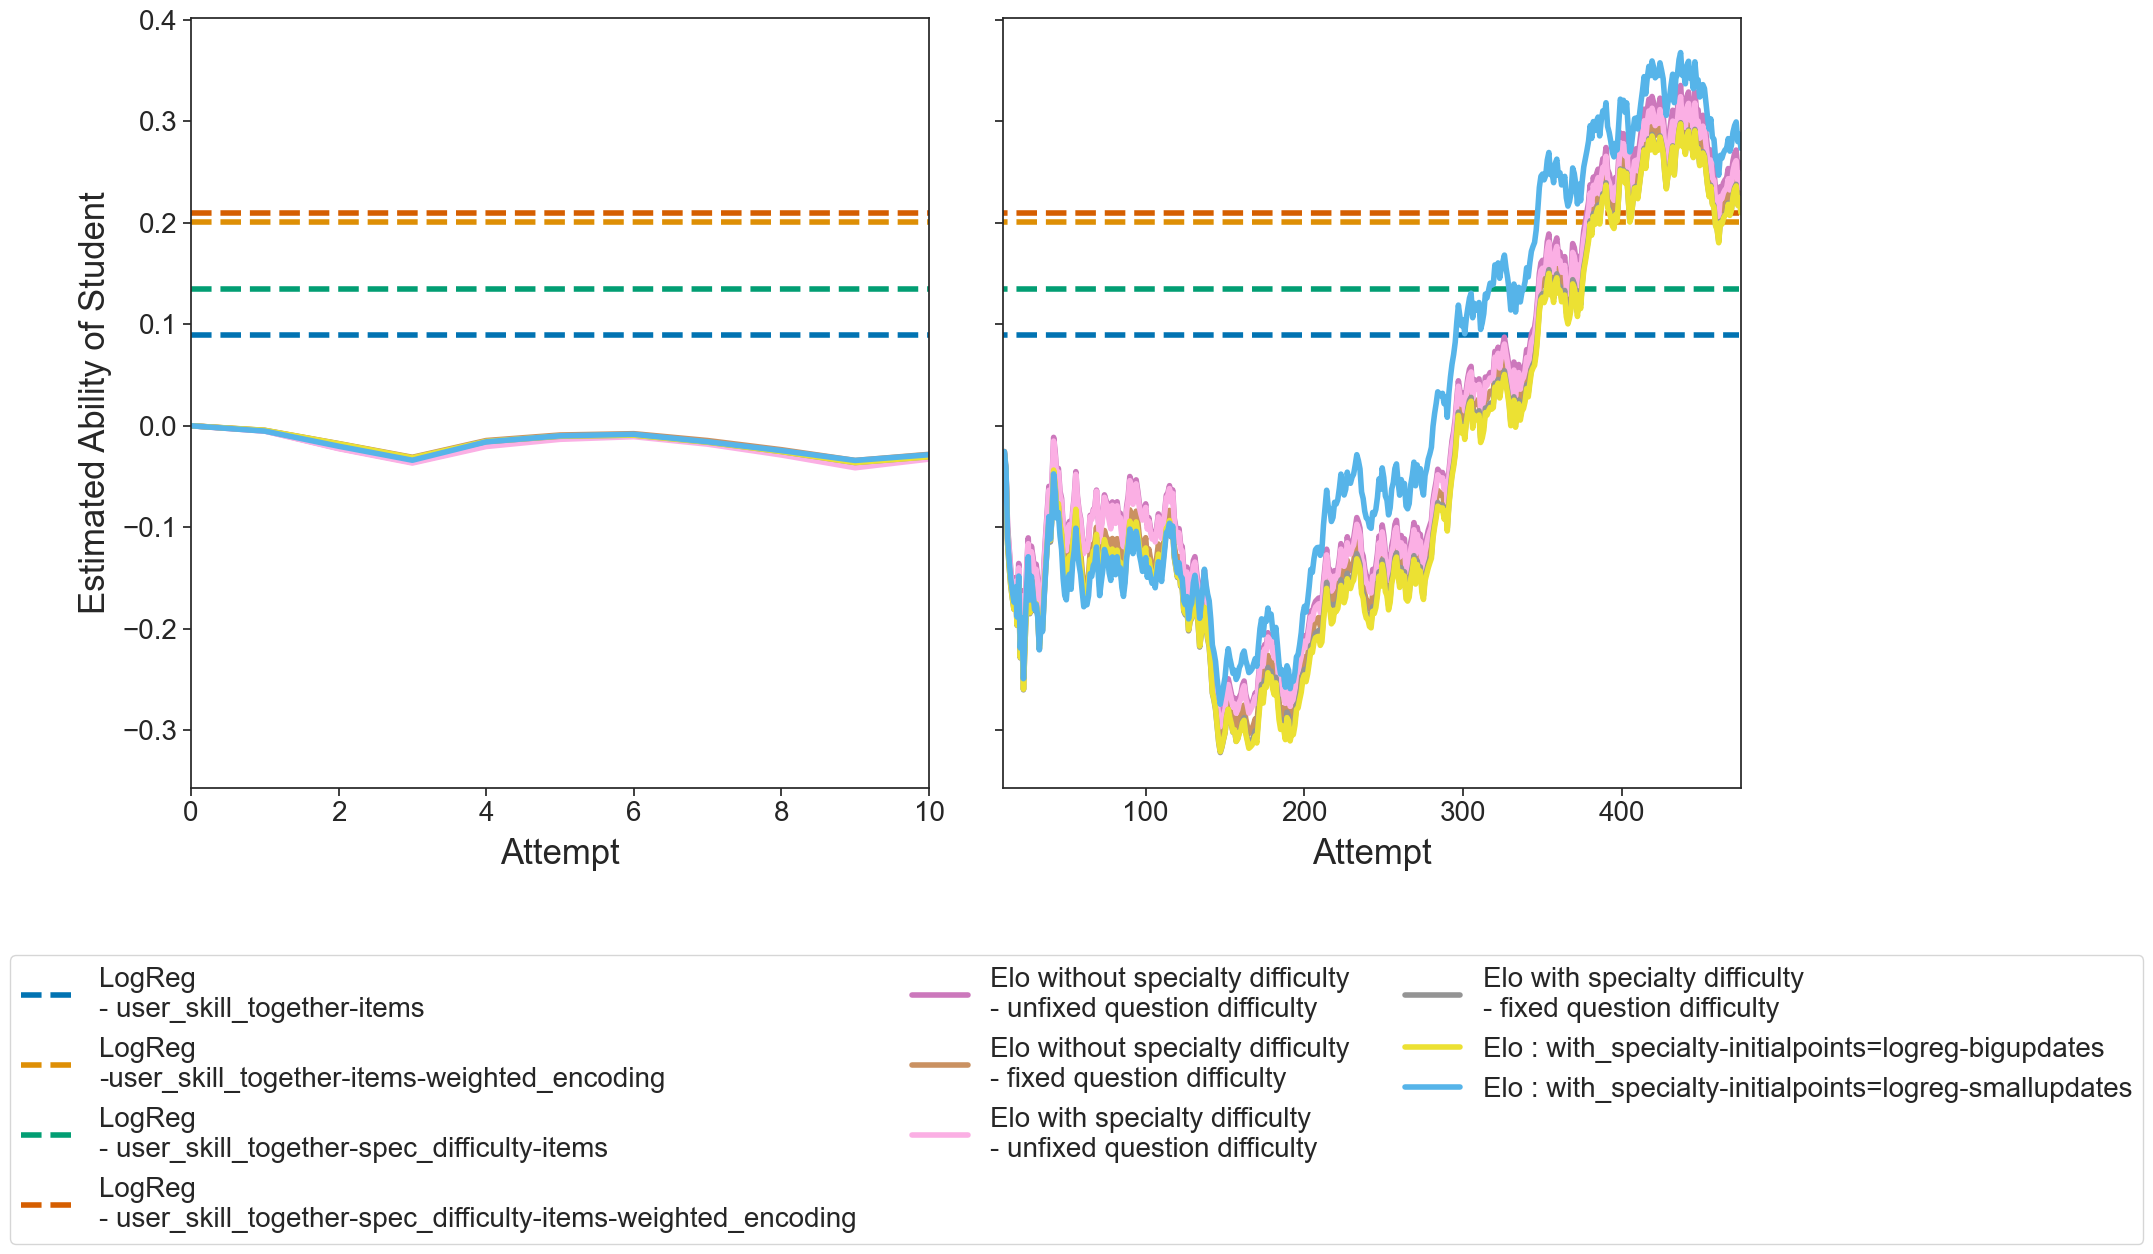

In [47]:

# merge question_difficulty_updates_elo and model_names on model_name
competency_updates_elo=pd.merge(competency_updates_elo,model_names,on='model_name',how='left')
# rename specialty as specialty_id
competency_updates_elo=competency_updates_elo.rename(columns={'specialty':'specialty_id'})
# read skill_names_ids_map
spec_id_name=pd.read_csv(main_path + '/' + folder + '/'+ education_year + '/processed/skill_names_ids_map.csv') 
# merge spec_id_name and competency_updates_elo on specialty_id
competency_updates_elo=pd.merge(competency_updates_elo,spec_id_name,on='specialty_id',how='left')
# remove specialty_id column
competency_updates_elo=competency_updates_elo.drop(columns=['specialty_id'])
# remove the model_name column
competency_updates_elo=competency_updates_elo.drop(columns=['model_name'])
# rename the custom_name column to model_name
competency_updates_elo=competency_updates_elo.rename(columns={'custom_name':'model_name'})
# merge question_difficulty_updates_elo and question_difficulty_logreg_filtered based on question_id

student_ability_logreg_filtered = student_ability_logreg_filtered.melt(id_vars=['user_id', 'kc_id','attempt_student'], var_name='model_name', value_name='ability')

# Create a new DataFrame to store the repeated rows
repeated_rows = []

# Iterate through each row in the DataFrame
for index, row in student_ability_logreg_filtered.iterrows():
    # Get the number of repetitions from the 'attempt_student' column for the current row's specialty
    num_repeats = int(row['attempt_student'])  # Convert to integer
    # Repeat the row by the number of attempts specified in 'attempt_student'
    repeated_rows.extend([row] * num_repeats)

# Concatenate the repeated rows back into a single DataFrame
student_ability_logreg_filtered = pd.DataFrame(repeated_rows).reset_index(drop=True)
# add order column that have numbers from 1 to length of question_difficulty_logreg_filtered
student_ability_logreg_filtered['order'] = student_ability_logreg_filtered.groupby(['model_name', 'kc_id']).cumcount() 
# rename kc_id to specialty
student_ability_logreg_filtered=student_ability_logreg_filtered.rename(columns={'kc_id':'specialty'})
# remove kc_id and count columns
student_ability_logreg_filtered=student_ability_logreg_filtered.drop(columns=['attempt_student'])

# from question_difficulty_updates_elo remove unnamed: 0 column
competency_updates_elo=competency_updates_elo.drop(columns=['Unnamed: 0'])

# concat question_difficulty_logreg_filtered and question_difficulty_updates_elo
user_competecy_merged=pd.concat([student_ability_logreg_filtered,competency_updates_elo],ignore_index=True)

# from user_competecy_merged select one specialty which have the most number of rows
# find the specialty which have the most number of rows
most_popular_specialty = user_competecy_merged.groupby('specialty').size().sort_values(ascending=False).index[0]
print('Specialty: ', most_popular_specialty)
user_competecy_merged=user_competecy_merged[user_competecy_merged['specialty']==most_popular_specialty]

competency_updates_elo = competency_updates_elo[competency_updates_elo['specialty'] == most_popular_specialty]

user_competecy_merged['model_name'] = user_competecy_merged['model_name'].replace('q_0-skill_0', 'Elo without specialty difficulty\n- unfixed question difficulty')
user_competecy_merged['model_name'] = user_competecy_merged['model_name'].replace('q_0-skill_0-1st-2nd', 'Elo without specialty difficulty\n- fixed question difficulty')
user_competecy_merged['model_name'] = user_competecy_merged['model_name'].replace('specdif_0-q_0-skill_0', 'Elo with specialty difficulty\n- unfixed question difficulty')
user_competecy_merged['model_name'] = user_competecy_merged['model_name'].replace('specdif_0-q_0-skill_0-1st-2nd', 'Elo with specialty difficulty\n- fixed question difficulty')
user_competecy_merged['model_name'] = user_competecy_merged['model_name'].replace('specdif_logreg-q_logreg-skill_logreg-1st-2nd', 'Elo : with_specialty-initialpoints=logreg-bigupdates')
user_competecy_merged['model_name'] = user_competecy_merged['model_name'].replace('specdif_logreg-q_logreg-skill_logreg-1st-2nd_attemptcounted', 'Elo : with_specialty-initialpoints=logreg-smallupdates')
user_competecy_merged['model_name'] = user_competecy_merged['model_name'].replace('ability_user_skill_together-items', 'LogReg\n- user_skill_together-items')
user_competecy_merged['model_name'] = user_competecy_merged['model_name'].replace('ability_user_skill_together-items-weighted_encoding', 'LogReg\n-user_skill_together-items-weighted_encoding')
user_competecy_merged['model_name'] = user_competecy_merged['model_name'].replace('ability_user_skill_together-spec_difficulty-items', 'LogReg\n- user_skill_together-spec_difficulty-items')
user_competecy_merged['model_name'] = user_competecy_merged['model_name'].replace('ability_user_skill_together-spec_difficulty-items-weighted_encoding', 'LogReg\n- user_skill_together-spec_difficulty-items-weighted_encoding')

import matplotlib.pyplot as plt
import seaborn as sns

# Define a color palette for models
color_palette_for_models = sns.color_palette("colorblind", 12)  # You can change '12' to the number of models you have

# Set the seaborn style and color palette
sns.set(style="ticks", palette=color_palette_for_models)

# Set other plot settings in a dictionary
plot_settings = {
    'font_size': 20,
    'fig_width': 20,
    'fig_height': 6,
    'linewidth': 3,
    'marker_size': 8,  # Adjust the marker size here
    'axis_label_spacing': 8,
    'font_family': 'sans-serif'
}

# Update the matplotlib rcParams using the plot_settings dictionary
plt.rcParams.update({
    'font.size': plot_settings['font_size'],
    'axes.labelsize': plot_settings['font_size'],
    'xtick.labelsize': plot_settings['font_size'],
    'ytick.labelsize': plot_settings['font_size'],
    'legend.fontsize': plot_settings['font_size'],
    'figure.titlesize': plot_settings['font_size'] + 2,
    'figure.figsize': (plot_settings['fig_width'], plot_settings['fig_height']),
    'lines.linewidth': plot_settings['linewidth'],
    'lines.markersize': plot_settings['marker_size'],
    'axes.labelpad': plot_settings['axis_label_spacing'],
    'font.family': plot_settings['font_family']
})


# PLOT
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), sharey=True)

# increase font size
# Plot the first subplot with xlim from 0 to 10
ax1 = axes[0]
for model_name in user_competecy_merged['model_name'].unique():
    data_subset = user_competecy_merged[user_competecy_merged['model_name'] == model_name]
    linestyle = '--' if model_name.startswith('LogReg') else '-'
    sns.lineplot(x='order', y='ability', data=data_subset, ax=ax1, label=model_name, linestyle=linestyle, linewidth=4)

# increase font size
ax1.set_xlabel('Attempt')
ax1.set_ylabel('Estimated Ability of Student')
ax1.set_xlim(0, 10)
# increase font size of x and y labels
ax1.xaxis.label.set_size(20)
ax1.yaxis.label.set_size(20)
#ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)
# no legend 
ax1.legend().set_visible(False)


# Plot the second subplot with the full xlim
ax2 = axes[1]
for model_name in user_competecy_merged['model_name'].unique():
    data_subset = user_competecy_merged[user_competecy_merged['model_name'] == model_name]
    linestyle = '--' if model_name.startswith('LogReg') else '-'
    sns.lineplot(x='order', y='ability', data=data_subset, ax=ax2, label=model_name, linestyle=linestyle, linewidth=4)

# have only one xlabel for both subplots
ax2.set_xlabel('Attempt')
ax2.set_xlim(competency_updates_elo['order'].min(), competency_updates_elo['order'].max())
ax2.legend(loc='upper center', bbox_to_anchor=(0.1, -0.2), ncol=3)

# Set the font size of the x and y labels for both subplots
for ax in axes:
    ax.xaxis.label.set_size(25)
    ax.yaxis.label.set_size(25)

# xlim from 10 to end
ax2.set_xlim(10, competency_updates_elo['order'].max())

# decrease the distance between the subplots 
plt.subplots_adjust(wspace=0.1)

# save the plot
plt.savefig(figure_folder+'evolution_student_ability.png',dpi=300, bbox_inches='tight')
plt.show()

# AUC and Compare All Models Together

In [44]:
# read the question_difficulty.csv files from all the folders that start with 'result_logreg' in the path and give the names as quest_dif_x where x is the resting name of the folder after resulty_logreg
path= main_path + '/' + folder + '/'+ education_year
dirs = [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d)) and d.startswith('result')]

# open a data frame with model, rmse, auc and acc columns
validation_results = pd.DataFrame(columns=['Model', 'RMSE', 'AUC', 'ACC'])
for folder_name in dirs:

    custom_name = folder_name[len("result") + 1:]  # Get the part of the folder_name after 'result_logreg' by adding 1 to skip the underscore
    validation_results_path = os.path.join(path+ '/' +folder_name + '/validation_results.txt')
    
    # Read the first three lines of the validation_results.txt file
    with open(validation_results_path) as f:
        results = [next(f) for x in range(3)]
        
        
    # Initialize dictionaries to store the extracted values
    data = {'Model': None,'RMSE': None, 'AUC': None, 'ACC': None}
    data['Model'] = custom_name
    # Loop through the results list and extract the values
    for item in results:
        if 'RMSE' in item:
            data['RMSE'] = float(item.split(': ')[1])
        elif 'AUC' in item:
            data['AUC'] = float(item.split(': ')[1])
        elif 'ACC' in item:
            data['ACC'] = float(item.split(': ')[1])
        
        
        
    # turn results into a dataframe
    df_temp = pd.DataFrame(data, index=[0])
    
    # append the dataframe to the main dataframe without column names
    validation_results = validation_results.append(df_temp, ignore_index=True)
    
# round the values to 3 decimals
validation_results = validation_results.round(3)
    

validation_results['Model'] = validation_results['Model'].replace('elo_q_0-skill_0', 'Elo without specialty difficulty- unfixed question difficulty')
validation_results['Model'] = validation_results['Model'].replace('elo_q_0-skill_0-1st-2nd', 'Elo without specialty difficulty- fixed question difficulty')
validation_results['Model'] = validation_results['Model'].replace('elo_specdif_0-q_0-skill_0', 'Elo with specialty difficulty- unfixed question difficulty')
validation_results['Model'] = validation_results['Model'].replace('elo_specdif_0-q_0-skill_0-1st-2nd', 'Elo with specialty difficulty- fixed question difficulty')
validation_results['Model'] = validation_results['Model'].replace('elo_specdif_logreg-q_logreg-skill_logreg-1st-2nd', 'Elo : with_specialty-initialpoints=logreg-bigupdates')
validation_results['Model'] = validation_results['Model'].replace('elo_specdif_logreg-q_logreg-skill_logreg-1st-2nd_attemptcounted', 'Elo : with_specialty-initialpoints=logreg-smallupdates')
validation_results['Model'] = validation_results['Model'].replace('logreg-user_skill_together-items', 'LogReg\n- user_skill_together-items')
validation_results['Model'] = validation_results['Model'].replace('logreg-items-weighted_encoding', 'LogReg\n-user_skill_together-items-weighted_encoding')
validation_results['Model'] = validation_results['Model'].replace('logreg_user_skill_together-spec_difficulty-items', 'LogReg\n- user_skill_together-spec_difficulty-items')
validation_results['Model'] = validation_results['Model'].replace('logreg_user_skill_together-spec_difficulty-items-weighted_encoding', 'LogReg\n- user_skill_together-spec_difficulty-items-weighted_encoding')

# Save the table as a string
table_str = validation_results.to_string(index=False)

# Save the table to a file
with open(figure_folder + '/validation_results_table.txt', 'w') as f:
    f.write(table_str)

# Print the table
print(table_str)

    


                                                                Model  RMSE   AUC   ACC
        Elo without specialty difficulty- unfixed question difficulty 0.422 0.808 0.730
          Elo without specialty difficulty- fixed question difficulty 0.420 0.812 0.733
           Elo with specialty difficulty- unfixed question difficulty 0.422 0.808 0.730
             Elo with specialty difficulty- fixed question difficulty 0.420 0.812 0.733
                 Elo : with_specialty-initialpoints=logreg-bigupdates 0.420 0.812 0.733
               Elo : with_specialty-initialpoints=logreg-smallupdates 0.423 0.807 0.729
                                     logreg_user_skill_together-items 0.416 0.820 0.739
                   logreg_user_skill_together-items-weighted_encoding 0.415 0.822 0.740
                  LogReg\n- user_skill_together-spec_difficulty-items 0.416 0.820 0.739
LogReg\n- user_skill_together-spec_difficulty-items-weighted_encoding 0.415 0.822 0.740
